# Importing packages

In [721]:
%matplotlib inline

import math
import numpy as np 
from scipy import stats
import pandas as pd                        # standard neccessary packages
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

import warnings                                         # To disable warnings
warnings.simplefilter('ignore')

pd.options.display.float_format = '{:,.5f}'.format

from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller 
from sklearn.metrics import mean_squared_error                       # metric for time series analysis
from statsmodels.tsa.vector_ar.vecm import coint_johansen            #Johansen Cointegration test

from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

## Data loading and Data Understanding:

In [722]:
df=pd.read_csv('train.csv')      # loading the  dataset

In [723]:
df.head()                        # First five rows of the dataset

Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5  2015-07-31   5263        555     1      1            0   
1      2          5  2015-07-31   6064        625     1      1            0   
2      3          5  2015-07-31   8314        821     1      1            0   
3      4          5  2015-07-31  13995       1498     1      1            0   
4      5          5  2015-07-31   4822        559     1      1            0   

   SchoolHoliday  
0              1  
1              1  
2              1  
3              1  
4              1

In [724]:
store=pd.read_csv('store.csv')            # loading the store dataset

In [725]:
store.head()                      # First five rows of the dataset

Store StoreType Assortment  CompetitionDistance  CompetitionOpenSinceMonth  \
0      1         c          a          1,270.00000                    9.00000   
1      2         a          a            570.00000                   11.00000   
2      3         a          a         14,130.00000                   12.00000   
3      4         c          c            620.00000                    9.00000   
4      5         a          a         29,910.00000                    4.00000   

   CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  \
0               2,008.00000       0              nan              nan   
1               2,007.00000       1         13.00000      2,010.00000   
2               2,006.00000       1         14.00000      2,011.00000   
3               2,009.00000       0              nan              nan   
4               2,015.00000       0              nan              nan   

     PromoInterval  
0              NaN  
1  Jan,Apr,Jul,Oct  
2  Jan,Apr,Jul,Oct  
3              NaN  
4              NaN

In [726]:
print(df.shape)
print(store.shape)          # Checking the shapes of datasets

(1017209, 9)
(1115, 10)


In [727]:
df.info()                  # viewing the column information (non null count,dtype) of df dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [728]:
store.info()              # viewing the column information (non null count,dtype) of store dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [729]:
df.describe()   # statistical information of all numerical columns of df.

Store       DayOfWeek           Sales       Customers  \
count 1,017,209.00000 1,017,209.00000 1,017,209.00000 1,017,209.00000   
mean        558.42973         3.99834     5,773.81897       633.14595   
std         321.90865         1.99739     3,849.92618       464.41173   
min           1.00000         1.00000         0.00000         0.00000   
25%         280.00000         2.00000     3,727.00000       405.00000   
50%         558.00000         4.00000     5,744.00000       609.00000   
75%         838.00000         6.00000     7,856.00000       837.00000   
max       1,115.00000         7.00000    41,551.00000     7,388.00000   

                 Open           Promo   SchoolHoliday  
count 1,017,209.00000 1,017,209.00000 1,017,209.00000  
mean          0.83011         0.38151         0.17865  
std           0.37554         0.48576         0.38306  
min           0.00000         0.00000         0.00000  
25%           1.00000         0.00000         0.00000  
50%           1.00000         0.00000         0.00000  
75%           1.00000         1.00000         0.00000  
max           1.00000         1.00000         1.00000

In [730]:
store.describe()    # statistical information of all numerical columns of store.

Store  CompetitionDistance  CompetitionOpenSinceMonth  \
count 1,115.00000          1,112.00000                  761.00000   
mean    558.00000          5,404.90108                    7.22470   
std     322.01708          7,663.17472                    3.21235   
min       1.00000             20.00000                    1.00000   
25%     279.50000            717.50000                    4.00000   
50%     558.00000          2,325.00000                    8.00000   
75%     836.50000          6,882.50000                   10.00000   
max   1,115.00000         75,860.00000                   12.00000   

       CompetitionOpenSinceYear      Promo2  Promo2SinceWeek  Promo2SinceYear  
count                 761.00000 1,115.00000        571.00000        571.00000  
mean                2,008.66886     0.51211         23.59545      2,011.76357  
std                     6.19598     0.50008         14.14198          1.67494  
min                 1,900.00000     0.00000          1.00000      2,009.00000  
25%                 2,006.00000     0.00000         13.00000      2,011.00000  
50%                 2,010.00000     1.00000         22.00000      2,012.00000  
75%                 2,013.00000     1.00000         37.00000      2,013.00000  
max                 2,015.00000     1.00000         50.00000      2,015.00000

In [731]:
df=pd.merge(df, store, how = 'inner', on = 'Store')     # Merging the both dataframes based on common column(Store)

In [732]:
df.head()       # first five rows of merged dataframe.

Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5  2015-07-31   5263        555     1      1            0   
1      1          4  2015-07-30   5020        546     1      1            0   
2      1          3  2015-07-29   4782        523     1      1            0   
3      1          2  2015-07-28   5011        560     1      1            0   
4      1          1  2015-07-27   6102        612     1      1            0   

   SchoolHoliday StoreType Assortment  CompetitionDistance  \
0              1         c          a          1,270.00000   
1              1         c          a          1,270.00000   
2              1         c          a          1,270.00000   
3              1         c          a          1,270.00000   
4              1         c          a          1,270.00000   

   CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                    9.00000               2,008.00000       0   
1                    9.00000               2,008.00000       0   
2                    9.00000               2,008.00000       0   
3                    9.00000               2,008.00000       0   
4                    9.00000               2,008.00000       0   

   Promo2SinceWeek  Promo2SinceYear PromoInterval  
0              nan              nan           NaN  
1              nan              nan           NaN  
2              nan              nan           NaN  
3              nan              nan           NaN  
4              nan              nan           NaN

In [733]:
df.sort_values(by='Date',inplace=True)

In [734]:
df.head()

Store  DayOfWeek        Date  Sales  Customers  Open  Promo  \
1017208   1115          2  2013-01-01      0          0     0      0   
679363     746          2  2013-01-01      0          0     0      0   
155193     171          2  2013-01-01      0          0     0      0   
632403     694          2  2013-01-01      0          0     0      0   
361623     396          2  2013-01-01      0          0     0      0   

        StateHoliday  SchoolHoliday StoreType Assortment  CompetitionDistance  \
1017208            a              1         d          c          5,350.00000   
679363             a              1         d          c          4,330.00000   
155193             a              1         a          a          2,640.00000   
632403             a              1         a          c            460.00000   
361623             a              1         a          c         23,130.00000   

         CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
1017208                        nan                       nan       1   
679363                     2.00000               2,011.00000       1   
155193                         nan                       nan       0   
632403                    11.00000               2,012.00000       1   
361623                         nan                       nan       0   

         Promo2SinceWeek  Promo2SinceYear     PromoInterval  
1017208         22.00000      2,012.00000  Mar,Jun,Sept,Dec  
679363          35.00000      2,011.00000  Mar,Jun,Sept,Dec  
155193               nan              nan               NaN  
632403          40.00000      2,014.00000   Jan,Apr,Jul,Oct  
361623               nan              nan               NaN

In [735]:
df.shape               # Shape of the merged dataframe

(1017209, 18)

In [736]:
df.info()           # Column info of merged dataframe

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 1017208 to 0
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

In [737]:
df.describe()     # Statistical info of all numerical columns of merged dataframe

Store       DayOfWeek           Sales       Customers  \
count 1,017,209.00000 1,017,209.00000 1,017,209.00000 1,017,209.00000   
mean        558.42973         3.99834     5,773.81897       633.14595   
std         321.90865         1.99739     3,849.92618       464.41173   
min           1.00000         1.00000         0.00000         0.00000   
25%         280.00000         2.00000     3,727.00000       405.00000   
50%         558.00000         4.00000     5,744.00000       609.00000   
75%         838.00000         6.00000     7,856.00000       837.00000   
max       1,115.00000         7.00000    41,551.00000     7,388.00000   

                 Open           Promo   SchoolHoliday  CompetitionDistance  \
count 1,017,209.00000 1,017,209.00000 1,017,209.00000      1,014,567.00000   
mean          0.83011         0.38151         0.17865          5,430.08565   
std           0.37554         0.48576         0.38306          7,715.32370   
min           0.00000         0.00000         0.00000             20.00000   
25%           1.00000         0.00000         0.00000            710.00000   
50%           1.00000         0.00000         0.00000          2,330.00000   
75%           1.00000         1.00000         0.00000          6,890.00000   
max           1.00000         1.00000         1.00000         75,860.00000   

       CompetitionOpenSinceMonth  CompetitionOpenSinceYear          Promo2  \
count              693,861.00000             693,861.00000 1,017,209.00000   
mean                     7.22287               2,008.69023         0.50056   
std                      3.21183                   5.99264         0.50000   
min                      1.00000               1,900.00000         0.00000   
25%                      4.00000               2,006.00000         0.00000   
50%                      8.00000               2,010.00000         1.00000   
75%                     10.00000               2,013.00000         1.00000   
max                     12.00000               2,015.00000         1.00000   

       Promo2SinceWeek  Promo2SinceYear  
count    509,178.00000    509,178.00000  
mean          23.26909      2,011.75277  
std           14.09597          1.66287  
min            1.00000      2,009.00000  
25%           13.00000      2,011.00000  
50%           22.00000      2,012.00000  
75%           37.00000      2,013.00000  
max           50.00000      2,015.00000

# Data Cleaning:

## Checking for duplicates:

In [738]:
df.head()

Store  DayOfWeek        Date  Sales  Customers  Open  Promo  \
1017208   1115          2  2013-01-01      0          0     0      0   
679363     746          2  2013-01-01      0          0     0      0   
155193     171          2  2013-01-01      0          0     0      0   
632403     694          2  2013-01-01      0          0     0      0   
361623     396          2  2013-01-01      0          0     0      0   

        StateHoliday  SchoolHoliday StoreType Assortment  CompetitionDistance  \
1017208            a              1         d          c          5,350.00000   
679363             a              1         d          c          4,330.00000   
155193             a              1         a          a          2,640.00000   
632403             a              1         a          c            460.00000   
361623             a              1         a          c         23,130.00000   

         CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
1017208                        nan                       nan       1   
679363                     2.00000               2,011.00000       1   
155193                         nan                       nan       0   
632403                    11.00000               2,012.00000       1   
361623                         nan                       nan       0   

         Promo2SinceWeek  Promo2SinceYear     PromoInterval  
1017208         22.00000      2,012.00000  Mar,Jun,Sept,Dec  
679363          35.00000      2,011.00000  Mar,Jun,Sept,Dec  
155193               nan              nan               NaN  
632403          40.00000      2,014.00000   Jan,Apr,Jul,Oct  
361623               nan              nan               NaN

In [739]:
df.shape

(1017209, 18)

In [740]:
df.duplicated(subset=['Date','Store'])[0]==True        # If both date and store values are same it can be considered duplicates.

False

In [741]:
# So no duplicates......

## Creating Index:

In [742]:
df.head()

Store  DayOfWeek        Date  Sales  Customers  Open  Promo  \
1017208   1115          2  2013-01-01      0          0     0      0   
679363     746          2  2013-01-01      0          0     0      0   
155193     171          2  2013-01-01      0          0     0      0   
632403     694          2  2013-01-01      0          0     0      0   
361623     396          2  2013-01-01      0          0     0      0   

        StateHoliday  SchoolHoliday StoreType Assortment  CompetitionDistance  \
1017208            a              1         d          c          5,350.00000   
679363             a              1         d          c          4,330.00000   
155193             a              1         a          a          2,640.00000   
632403             a              1         a          c            460.00000   
361623             a              1         a          c         23,130.00000   

         CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
1017208                        nan                       nan       1   
679363                     2.00000               2,011.00000       1   
155193                         nan                       nan       0   
632403                    11.00000               2,012.00000       1   
361623                         nan                       nan       0   

         Promo2SinceWeek  Promo2SinceYear     PromoInterval  
1017208         22.00000      2,012.00000  Mar,Jun,Sept,Dec  
679363          35.00000      2,011.00000  Mar,Jun,Sept,Dec  
155193               nan              nan               NaN  
632403          40.00000      2,014.00000   Jan,Apr,Jul,Oct  
361623               nan              nan               NaN

In [743]:
df.reset_index(drop=True,inplace=True)
df.set_index('Date',inplace=True)                    # deleting and resetting the index

In [744]:
df.head()

Store  DayOfWeek  Sales  Customers  Open  Promo StateHoliday  \
Date                                                                       
2013-01-01   1115          2      0          0     0      0            a   
2013-01-01    746          2      0          0     0      0            a   
2013-01-01    171          2      0          0     0      0            a   
2013-01-01    694          2      0          0     0      0            a   
2013-01-01    396          2      0          0     0      0            a   

            SchoolHoliday StoreType Assortment  CompetitionDistance  \
Date                                                                  
2013-01-01              1         d          c          5,350.00000   
2013-01-01              1         d          c          4,330.00000   
2013-01-01              1         a          a          2,640.00000   
2013-01-01              1         a          c            460.00000   
2013-01-01              1         a          c         23,130.00000   

            CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
Date                                                                      
2013-01-01                        nan                       nan       1   
2013-01-01                    2.00000               2,011.00000       1   
2013-01-01                        nan                       nan       0   
2013-01-01                   11.00000               2,012.00000       1   
2013-01-01                        nan                       nan       0   

            Promo2SinceWeek  Promo2SinceYear     PromoInterval  
Date                                                            
2013-01-01         22.00000      2,012.00000  Mar,Jun,Sept,Dec  
2013-01-01         35.00000      2,011.00000  Mar,Jun,Sept,Dec  
2013-01-01              nan              nan               NaN  
2013-01-01         40.00000      2,014.00000   Jan,Apr,Jul,Oct  
2013-01-01              nan              nan               NaN

## Dropping Unneccessary columns:

In [745]:
# After watching the columns i think Promo,Promo interval should be dropped as they are not much useful in modelling.

df.drop(['Promo','PromoInterval','CompetitionOpenSinceMonth'],axis=1,inplace=True)

In [746]:
df.head()

Store  DayOfWeek  Sales  Customers  Open StateHoliday  \
Date                                                                
2013-01-01   1115          2      0          0     0            a   
2013-01-01    746          2      0          0     0            a   
2013-01-01    171          2      0          0     0            a   
2013-01-01    694          2      0          0     0            a   
2013-01-01    396          2      0          0     0            a   

            SchoolHoliday StoreType Assortment  CompetitionDistance  \
Date                                                                  
2013-01-01              1         d          c          5,350.00000   
2013-01-01              1         d          c          4,330.00000   
2013-01-01              1         a          a          2,640.00000   
2013-01-01              1         a          c            460.00000   
2013-01-01              1         a          c         23,130.00000   

            CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  
Date                                                                            
2013-01-01                       nan       1         22.00000      2,012.00000  
2013-01-01               2,011.00000       1         35.00000      2,011.00000  
2013-01-01                       nan       0              nan              nan  
2013-01-01               2,012.00000       1         40.00000      2,014.00000  
2013-01-01                       nan       0              nan              nan

In [747]:
df.shape

(1017209, 14)

## Handling null values:

In [748]:
df.shape

(1017209, 14)

In [749]:
df.isnull().sum()        # Checking for null values

Store                            0
DayOfWeek                        0
Sales                            0
Customers                        0
Open                             0
StateHoliday                     0
SchoolHoliday                    0
StoreType                        0
Assortment                       0
CompetitionDistance           2642
CompetitionOpenSinceYear    323348
Promo2                           0
Promo2SinceWeek             508031
Promo2SinceYear             508031
dtype: int64

In [750]:
dict={}                        # getting null value percentage for each column.
for i in df.columns:
    dict[i]=round((df[i].isnull().sum()/df[i].shape[0])*100,2)
dict

{'Store': 0.0,
 'DayOfWeek': 0.0,
 'Sales': 0.0,
 'Customers': 0.0,
 'Open': 0.0,
 'StateHoliday': 0.0,
 'SchoolHoliday': 0.0,
 'StoreType': 0.0,
 'Assortment': 0.0,
 'CompetitionDistance': 0.26,
 'CompetitionOpenSinceYear': 31.79,
 'Promo2': 0.0,
 'Promo2SinceWeek': 49.94,
 'Promo2SinceYear': 49.94}

In [751]:
# now we need to deal with these null values
# Since Promo2SinceWeek and year has around 50% null values we can drop them
df.drop(['Promo2SinceWeek','Promo2SinceYear'],axis=1,inplace=True)

In [752]:
df.shape

(1017209, 12)

In [753]:
df.isnull().sum()

Store                            0
DayOfWeek                        0
Sales                            0
Customers                        0
Open                             0
StateHoliday                     0
SchoolHoliday                    0
StoreType                        0
Assortment                       0
CompetitionDistance           2642
CompetitionOpenSinceYear    323348
Promo2                           0
dtype: int64

In [754]:
df['CompetitionOpenSinceYear'].describe()
# Since it is a year column we can use mode for imputation.

count   693,861.00000
mean      2,008.69023
std           5.99264
min       1,900.00000
25%       2,006.00000
50%       2,010.00000
75%       2,013.00000
max       2,015.00000
Name: CompetitionOpenSinceYear, dtype: float64

In [755]:
df['CompetitionOpenSinceYear'].fillna(df['CompetitionOpenSinceYear'].mode()[0],inplace=True)

In [756]:
df.isnull().sum()

Store                          0
DayOfWeek                      0
Sales                          0
Customers                      0
Open                           0
StateHoliday                   0
SchoolHoliday                  0
StoreType                      0
Assortment                     0
CompetitionDistance         2642
CompetitionOpenSinceYear       0
Promo2                         0
dtype: int64

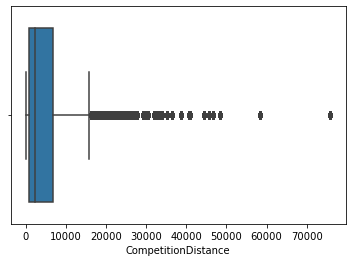

In [757]:
# Since it is a continuos variable we ca either use mean/median for imputation.

sns.boxplot(df['CompetitionDistance'])
plt.show()

In [758]:
# We can see that it is clearly effected by outliers so we use median for imputaion.
df['CompetitionDistance'].fillna(df['CompetitionDistance'].median(),inplace=True)

In [759]:
df.isnull().sum().sum()             # Null values handled

0

## Feature Engineering:

In [760]:
df.head()

Store  DayOfWeek  Sales  Customers  Open StateHoliday  \
Date                                                                
2013-01-01   1115          2      0          0     0            a   
2013-01-01    746          2      0          0     0            a   
2013-01-01    171          2      0          0     0            a   
2013-01-01    694          2      0          0     0            a   
2013-01-01    396          2      0          0     0            a   

            SchoolHoliday StoreType Assortment  CompetitionDistance  \
Date                                                                  
2013-01-01              1         d          c          5,350.00000   
2013-01-01              1         d          c          4,330.00000   
2013-01-01              1         a          a          2,640.00000   
2013-01-01              1         a          c            460.00000   
2013-01-01              1         a          c         23,130.00000   

            CompetitionOpenSinceYear  Promo2  
Date                                          
2013-01-01               2,013.00000       1  
2013-01-01               2,011.00000       1  
2013-01-01               2,013.00000       0  
2013-01-01               2,012.00000       1  
2013-01-01               2,013.00000       0

In [761]:
df['CompetitionOpenSinceYear']=df['CompetitionOpenSinceYear'].apply(lambda x: 2021-int(x))
df.rename(columns={'CompetitionOpenSinceYear':'Competition since years'},inplace=True)

In [762]:
df['CompetitionDistance']=df['CompetitionDistance'].apply(lambda x:math.ceil(int(x)/1000))
df.rename(columns={'CompetitionDistance':'CompetitionDistance_KM'},inplace=True)

In [763]:
# From the DayOfWeek model we can create is_weekend variable which can has great effect on sales column

In [764]:
df['DayOfWeek'].value_counts()

5    145845
4    145845
3    145665
2    145664
7    144730
6    144730
1    144730
Name: DayOfWeek, dtype: int64

In [765]:
df.insert(2,'is_weekend',df['DayOfWeek'].apply(lambda x:1 if (x==6 or x==7) else 0))
# We are inserting it right next to DayOf Week variable

In [766]:
df.head()

Store  DayOfWeek  is_weekend  Sales  Customers  Open StateHoliday  \
Date                                                                            
2013-01-01   1115          2           0      0          0     0            a   
2013-01-01    746          2           0      0          0     0            a   
2013-01-01    171          2           0      0          0     0            a   
2013-01-01    694          2           0      0          0     0            a   
2013-01-01    396          2           0      0          0     0            a   

            SchoolHoliday StoreType Assortment  CompetitionDistance_KM  \
Date                                                                     
2013-01-01              1         d          c                       6   
2013-01-01              1         d          c                       5   
2013-01-01              1         a          a                       3   
2013-01-01              1         a          c                       1   
2013-01-01              1         a          c                      24   

            Competition since years  Promo2  
Date                                         
2013-01-01                        8       1  
2013-01-01                       10       1  
2013-01-01                        8       0  
2013-01-01                        9       1  
2013-01-01                        8       0

## Sanity Checks:

In [767]:
df.head()

Store  DayOfWeek  is_weekend  Sales  Customers  Open StateHoliday  \
Date                                                                            
2013-01-01   1115          2           0      0          0     0            a   
2013-01-01    746          2           0      0          0     0            a   
2013-01-01    171          2           0      0          0     0            a   
2013-01-01    694          2           0      0          0     0            a   
2013-01-01    396          2           0      0          0     0            a   

            SchoolHoliday StoreType Assortment  CompetitionDistance_KM  \
Date                                                                     
2013-01-01              1         d          c                       6   
2013-01-01              1         d          c                       5   
2013-01-01              1         a          a                       3   
2013-01-01              1         a          c                       1   
2013-01-01              1         a          c                      24   

            Competition since years  Promo2  
Date                                         
2013-01-01                        8       1  
2013-01-01                       10       1  
2013-01-01                        8       0  
2013-01-01                        9       1  
2013-01-01                        8       0

In [768]:
df['Open'].value_counts()     # no wrong entries

1    844392
0    172817
Name: Open, dtype: int64

In [769]:
df['StoreType'].value_counts()        # no wrong entries

a    551627
d    312912
c    136840
b     15830
Name: StoreType, dtype: int64

In [770]:
df['Assortment'].value_counts()          # no wrong entries

a    537445
c    471470
b      8294
Name: Assortment, dtype: int64

In [771]:
# All the categorical columns are in order(no irregular entries)

## Checking for skewness

In [772]:
df.head()

Store  DayOfWeek  is_weekend  Sales  Customers  Open StateHoliday  \
Date                                                                            
2013-01-01   1115          2           0      0          0     0            a   
2013-01-01    746          2           0      0          0     0            a   
2013-01-01    171          2           0      0          0     0            a   
2013-01-01    694          2           0      0          0     0            a   
2013-01-01    396          2           0      0          0     0            a   

            SchoolHoliday StoreType Assortment  CompetitionDistance_KM  \
Date                                                                     
2013-01-01              1         d          c                       6   
2013-01-01              1         d          c                       5   
2013-01-01              1         a          a                       3   
2013-01-01              1         a          c                       1   
2013-01-01              1         a          c                      24   

            Competition since years  Promo2  
Date                                         
2013-01-01                        8       1  
2013-01-01                       10       1  
2013-01-01                        8       0  
2013-01-01                        9       1  
2013-01-01                        8       0

In [773]:
df.skew(axis = 0, skipna = True)     # Skewness of every variable

Store                     -0.00095
DayOfWeek                  0.00159
is_weekend                 0.95494
Sales                      0.64146
Customers                  1.59865
Open                      -1.75804
SchoolHoliday              1.67784
CompetitionDistance_KM     2.95391
Competition since years    7.88466
Promo2                    -0.00226
dtype: float64

In [774]:
for i in ['CompetitionDistance_KM','Competition since years']:
    df[i]=np.log10(df[i])

In [775]:
df.head()

Store  DayOfWeek  is_weekend  Sales  Customers  Open StateHoliday  \
Date                                                                            
2013-01-01   1115          2           0      0          0     0            a   
2013-01-01    746          2           0      0          0     0            a   
2013-01-01    171          2           0      0          0     0            a   
2013-01-01    694          2           0      0          0     0            a   
2013-01-01    396          2           0      0          0     0            a   

            SchoolHoliday StoreType Assortment  CompetitionDistance_KM  \
Date                                                                     
2013-01-01              1         d          c                 0.77815   
2013-01-01              1         d          c                 0.69897   
2013-01-01              1         a          a                 0.47712   
2013-01-01              1         a          c                 0.00000   
2013-01-01              1         a          c                 1.38021   

            Competition since years  Promo2  
Date                                         
2013-01-01                  0.90309       1  
2013-01-01                  1.00000       1  
2013-01-01                  0.90309       0  
2013-01-01                  0.95424       1  
2013-01-01                  0.90309       0

In [776]:
df.skew(axis = 0, skipna = True)

Store                     -0.00095
DayOfWeek                  0.00159
is_weekend                 0.95494
Sales                      0.64146
Customers                  1.59865
Open                      -1.75804
SchoolHoliday              1.67784
CompetitionDistance_KM     0.47113
Competition since years    1.04946
Promo2                    -0.00226
dtype: float64

In [777]:
# we can see that skewness for CompetitionDistance_km,Competition since year has decreased a lot.

# Exploratory Data Analysis:

## Univariate Analysis:

In [778]:
df.head()

Store  DayOfWeek  is_weekend  Sales  Customers  Open StateHoliday  \
Date                                                                            
2013-01-01   1115          2           0      0          0     0            a   
2013-01-01    746          2           0      0          0     0            a   
2013-01-01    171          2           0      0          0     0            a   
2013-01-01    694          2           0      0          0     0            a   
2013-01-01    396          2           0      0          0     0            a   

            SchoolHoliday StoreType Assortment  CompetitionDistance_KM  \
Date                                                                     
2013-01-01              1         d          c                 0.77815   
2013-01-01              1         d          c                 0.69897   
2013-01-01              1         a          a                 0.47712   
2013-01-01              1         a          c                 0.00000   
2013-01-01              1         a          c                 1.38021   

            Competition since years  Promo2  
Date                                         
2013-01-01                  0.90309       1  
2013-01-01                  1.00000       1  
2013-01-01                  0.90309       0  
2013-01-01                  0.95424       1  
2013-01-01                  0.90309       0

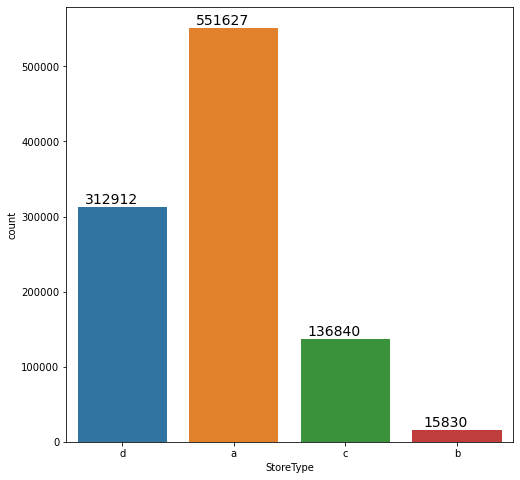

In [779]:
# count plot is used for plotting unique values of column and their counts.
plt.figure(figsize=[8,8])
g=sns.countplot(x='StoreType',data=df)
for p in g.patches:
    g.annotate('{:.0f}'.format(p.get_height()),(p.get_x()+0.3,p.get_height()),ha='center',va='bottom',color='black',fontsize=14)
plt.show()

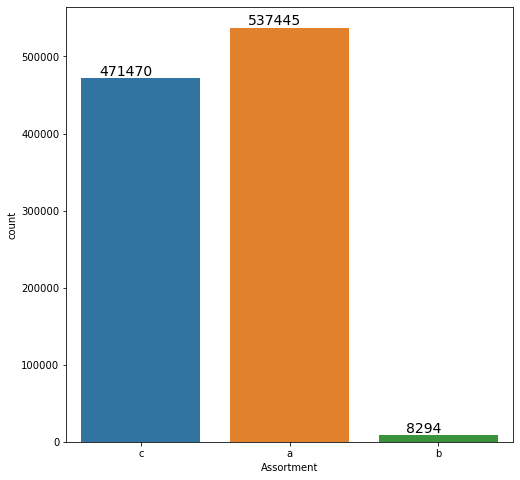

In [780]:
plt.figure(figsize=[8,8])
g=sns.countplot(x='Assortment',data=df)
for p in g.patches:
    g.annotate('{:.0f}'.format(p.get_height()),(p.get_x()+0.3,p.get_height()),ha='center',va='bottom',color='black',fontsize=14)
plt.show()

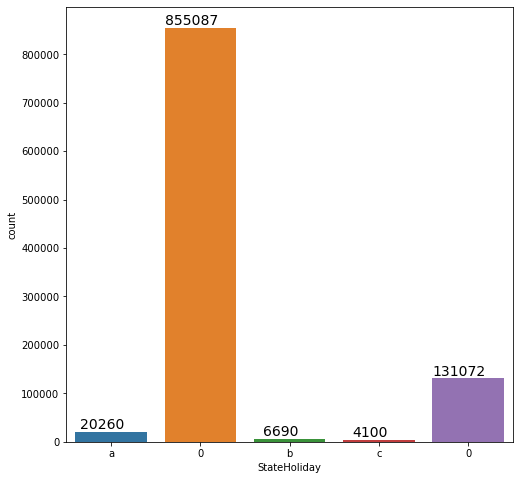

In [781]:
plt.figure(figsize=[8,8])
g=sns.countplot(x='StateHoliday',data=df)
for p in g.patches:
    g.annotate('{:.0f}'.format(p.get_height()),(p.get_x()+0.3,p.get_height()),ha='center',va='bottom',color='black',fontsize=14)
plt.show()

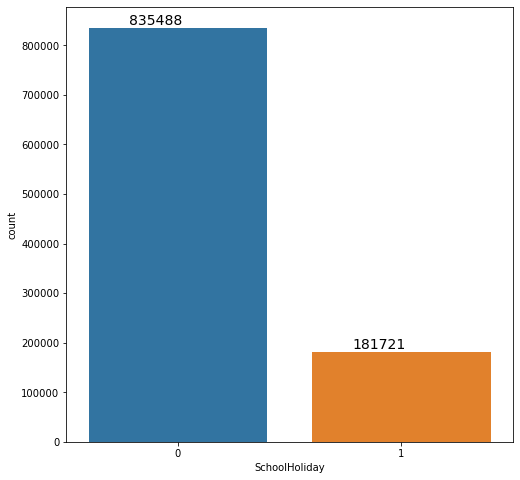

In [782]:
plt.figure(figsize=[8,8])
g=sns.countplot(x='SchoolHoliday',data=df)
for p in g.patches:
    g.annotate('{:.0f}'.format(p.get_height()),(p.get_x()+0.3,p.get_height()),ha='center',va='bottom',color='black',fontsize=14)
plt.show()

## Bivariate Analysis:

In [783]:
df.head()

Store  DayOfWeek  is_weekend  Sales  Customers  Open StateHoliday  \
Date                                                                            
2013-01-01   1115          2           0      0          0     0            a   
2013-01-01    746          2           0      0          0     0            a   
2013-01-01    171          2           0      0          0     0            a   
2013-01-01    694          2           0      0          0     0            a   
2013-01-01    396          2           0      0          0     0            a   

            SchoolHoliday StoreType Assortment  CompetitionDistance_KM  \
Date                                                                     
2013-01-01              1         d          c                 0.77815   
2013-01-01              1         d          c                 0.69897   
2013-01-01              1         a          a                 0.47712   
2013-01-01              1         a          c                 0.00000   
2013-01-01              1         a          c                 1.38021   

            Competition since years  Promo2  
Date                                         
2013-01-01                  0.90309       1  
2013-01-01                  1.00000       1  
2013-01-01                  0.90309       0  
2013-01-01                  0.95424       1  
2013-01-01                  0.90309       0

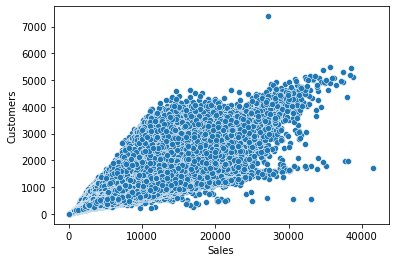

In [784]:
sns.scatterplot(df['Sales'],df['Customers'])
plt.show()

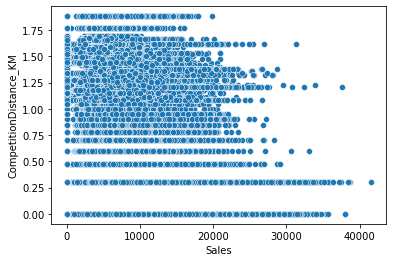

In [785]:
sns.scatterplot(df['Sales'],df['CompetitionDistance_KM'])
plt.show()

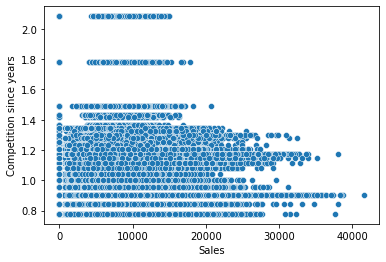

In [786]:
sns.scatterplot(df['Sales'],df['Competition since years'])
plt.show()

In [787]:
# We can see that Customers variable has good linear relationship with Sales variable.

## Correlation Analysis

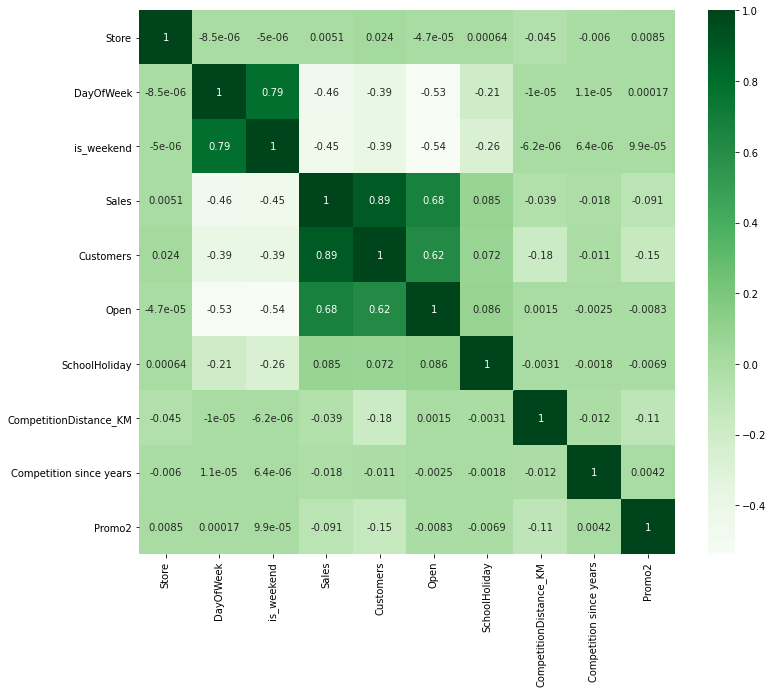

In [788]:
plt.figure(figsize=[12,10])
sns.heatmap(df.corr(),annot=True,cmap='Greens')
plt.show()

In [789]:
# We can see that Sales column has good correlation with Customers,DayOfWeek,is_weekend,Open variables.

# Store 1:

In [790]:
df_1=df[df['Store']==1]
df_1.head()

Store  DayOfWeek  is_weekend  Sales  Customers  Open StateHoliday  \
Date                                                                            
2013-01-01      1          2           0      0          0     0            a   
2013-01-02      1          3           0   5530        668     1            0   
2013-01-03      1          4           0   4327        578     1            0   
2013-01-04      1          5           0   4486        619     1            0   
2013-01-05      1          6           1   4997        635     1            0   

            SchoolHoliday StoreType Assortment  CompetitionDistance_KM  \
Date                                                                     
2013-01-01              1         c          a                 0.30103   
2013-01-02              1         c          a                 0.30103   
2013-01-03              1         c          a                 0.30103   
2013-01-04              1         c          a                 0.30103   
2013-01-05              1         c          a                 0.30103   

            Competition since years  Promo2  
Date                                         
2013-01-01                  1.11394       0  
2013-01-02                  1.11394       0  
2013-01-03                  1.11394       0  
2013-01-04                  1.11394       0  
2013-01-05                  1.11394       0

In [791]:
df_1.shape

(942, 13)

## Outlier Analysis:

In [792]:
#Here we perform outlier analysis for sales and customers variables.

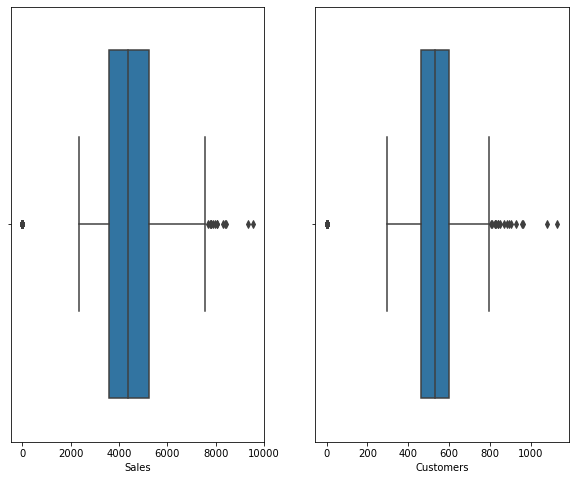

In [793]:
plt.figure(figsize=[10,8])
plt.subplot(1,2,1)
ax=sns.boxplot(df_1['Sales'])
plt.subplot(1,2,2)
ax=sns.boxplot(df_1['Customers'])

In [794]:
# We need to cap the outliers to their 99 percentile value.
df_1['Sales']=df_1['Sales'].clip(lower=df_1['Sales'].min(),upper=df_1['Sales'].quantile(0.99))
df_1['Customers']=df_1['Customers'].clip(lower=df_1['Customers'].min(),upper=df_1['Customers'].quantile(0.99))

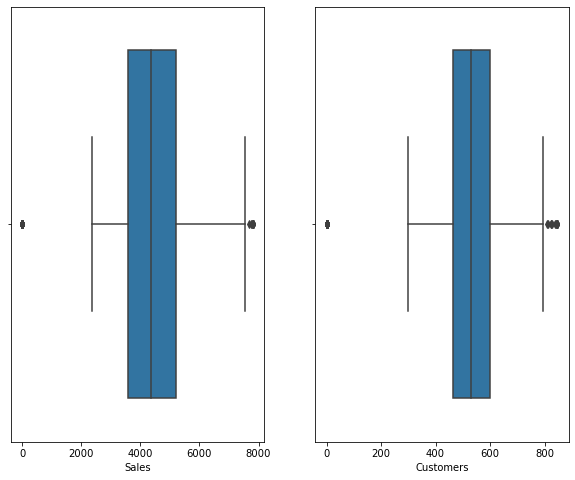

In [795]:
plt.figure(figsize=[10,8])
plt.subplot(1,2,1)
ax=sns.boxplot(df_1['Sales'])
plt.subplot(1,2,2)
ax=sns.boxplot(df_1['Customers'])

In [796]:
# We can see that outliers are minimized.

## Null value handling:

In [797]:
# If Sales/Customers value ==0 consider them as 0.
df_1['Sales']=df_1['Sales'].apply(lambda x:np.nan if x==0 else x)
df_1['Customers']=df_1['Customers'].apply(lambda x:np.nan if x==0 else x)

In [798]:
df_1[['Sales','Customers']].isnull().sum()

Sales        161
Customers    161
dtype: int64

In [799]:
# Since we have capped the outliers we can use mean for imputation.

### Mean imputation:

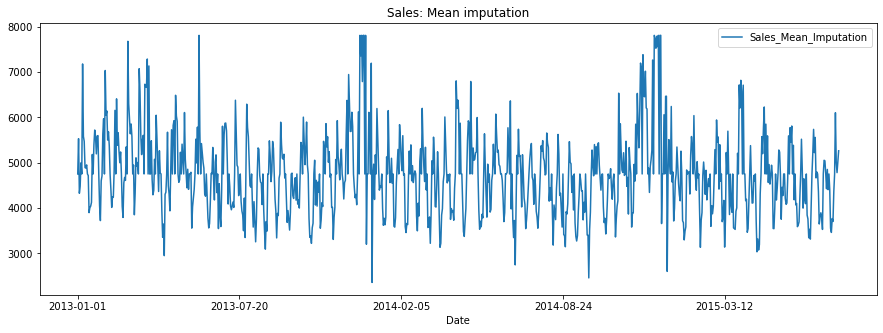

In [800]:
df_1.insert(4,'Sales_Mean_Imputation',df_1.Sales.fillna(df_1.Sales.mean()))
df_1[['Sales_Mean_Imputation']].plot(figsize=(15, 5))
plt.legend(loc='best')
plt.title('Sales: Mean imputation')
plt.show()

In [801]:
df_1.head()

Store  DayOfWeek  is_weekend       Sales  Sales_Mean_Imputation  \
Date                                                                          
2013-01-01      1          2           0         nan            4,751.87503   
2013-01-02      1          3           0 5,530.00000            5,530.00000   
2013-01-03      1          4           0 4,327.00000            4,327.00000   
2013-01-04      1          5           0 4,486.00000            4,486.00000   
2013-01-05      1          6           1 4,997.00000            4,997.00000   

            Customers  Open StateHoliday  SchoolHoliday StoreType Assortment  \
Date                                                                           
2013-01-01        nan     0            a              1         c          a   
2013-01-02  668.00000     1            0              1         c          a   
2013-01-03  578.00000     1            0              1         c          a   
2013-01-04  619.00000     1            0              1         c          a   
2013-01-05  635.00000     1            0              1         c          a   

            CompetitionDistance_KM  Competition since years  Promo2  
Date                                                                 
2013-01-01                 0.30103                  1.11394       0  
2013-01-02                 0.30103                  1.11394       0  
2013-01-03                 0.30103                  1.11394       0  
2013-01-04                 0.30103                  1.11394       0  
2013-01-05                 0.30103                  1.11394       0

In [802]:
df_1.drop(['Sales'],axis=1,inplace=True)
df_1.rename(columns={'Sales_Mean_Imputation':'Sales'},inplace=True)

In [803]:
df_1.head()

Store  DayOfWeek  is_weekend       Sales  Customers  Open  \
Date                                                                    
2013-01-01      1          2           0 4,751.87503        nan     0   
2013-01-02      1          3           0 5,530.00000  668.00000     1   
2013-01-03      1          4           0 4,327.00000  578.00000     1   
2013-01-04      1          5           0 4,486.00000  619.00000     1   
2013-01-05      1          6           1 4,997.00000  635.00000     1   

           StateHoliday  SchoolHoliday StoreType Assortment  \
Date                                                          
2013-01-01            a              1         c          a   
2013-01-02            0              1         c          a   
2013-01-03            0              1         c          a   
2013-01-04            0              1         c          a   
2013-01-05            0              1         c          a   

            CompetitionDistance_KM  Competition since years  Promo2  
Date                                                                 
2013-01-01                 0.30103                  1.11394       0  
2013-01-02                 0.30103                  1.11394       0  
2013-01-03                 0.30103                  1.11394       0  
2013-01-04                 0.30103                  1.11394       0  
2013-01-05                 0.30103                  1.11394       0

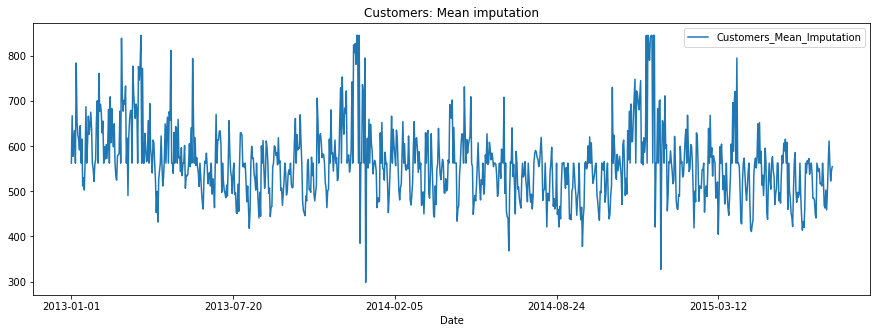

In [804]:
# Do the same mean imputation for Customers variable
df_1.insert(5,'Customers_Mean_Imputation',df_1.Customers.fillna(df_1.Customers.mean()))
df_1[['Customers_Mean_Imputation']].plot(figsize=(15, 5))
plt.legend(loc='best')
plt.title('Customers: Mean imputation')
plt.show()

In [805]:
df_1.drop(['Customers'],axis=1,inplace=True)
df_1.rename(columns={'Customers_Mean_Imputation':'Customers'},inplace=True)

In [806]:
# convert both sales and customers to int
df_1['Sales']=df_1['Sales'].astype('int64')
df_1['Customers']=df_1['Customers'].astype('int64')
df_1.head()

Store  DayOfWeek  is_weekend  Sales  Customers  Open StateHoliday  \
Date                                                                            
2013-01-01      1          2           0   4751        562     0            a   
2013-01-02      1          3           0   5530        668     1            0   
2013-01-03      1          4           0   4327        578     1            0   
2013-01-04      1          5           0   4486        619     1            0   
2013-01-05      1          6           1   4997        635     1            0   

            SchoolHoliday StoreType Assortment  CompetitionDistance_KM  \
Date                                                                     
2013-01-01              1         c          a                 0.30103   
2013-01-02              1         c          a                 0.30103   
2013-01-03              1         c          a                 0.30103   
2013-01-04              1         c          a                 0.30103   
2013-01-05              1         c          a                 0.30103   

            Competition since years  Promo2  
Date                                         
2013-01-01                  1.11394       0  
2013-01-02                  1.11394       0  
2013-01-03                  1.11394       0  
2013-01-04                  1.11394       0  
2013-01-05                  1.11394       0

## Train-Test split:

In [807]:
train_len=900

In [808]:
train=df_1[0:train_len]
test=df_1[train_len:]

In [809]:
train.shape

(900, 13)

In [810]:
test.shape

(42, 13)

## Stationarity test (ADF test):

In [811]:
for i in ['Sales','Customers']:
    print('\n\n' + i + ': ADF test results:')
    result = adfuller(train[i].dropna())
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        if key=='5%':
            print('\t%s: %.3f' % (key, value))



Sales: ADF test results:
ADF Statistic: -5.355618
p-value: 0.000004
Critical Values:
	5%: -2.865


Customers: ADF test results:
ADF Statistic: -3.808792
p-value: 0.002819
Critical Values:
	5%: -2.865


In [812]:
# since p-value for both variables is less than 0.05 they both are stationary.

## Model Building:

## SARIMAX:

In [813]:
model = SARIMAX(train['Sales'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12),exog=train['Open']) 
model_fit = model.fit()
print(model_fit.params)

Open           289.78707
ar.L1            0.58931
ma.L1           -0.99999
ar.S.L12         0.08545
ma.S.L12        -0.99910
sigma2     532,715.99903
dtype: float64


In [814]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Sales   No. Observations:                  900
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -7135.193
Date:                            Mon, 31 May 2021   AIC                          14282.386
Time:                                    20:05:33   BIC                          14311.113
Sample:                                01-01-2013   HQIC                         14293.368
                                     - 06-19-2015                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Open         289.7871     51.035      5.678      0.000     189.761     389.813
ar.L1          0.5893      0.023     25.995      0.000       0.545       0.634
ma.L1         -1.0000      0.495     -2.019      0.043      -1.971      -0.029
ar.S.L12       0.0854      0.033      2.586      0.010       0.021       0.150
ma.S.L12      -0.9991      0.503     -1.988      0.047      -1.984      -0.014
sigma2      5.327e+05      0.000   2.44e+09      0.000    5.33e+05    5.33e+05
===================================================================================
Ljung-Box (L1) (Q):                  11.34   Jarque-Bera (JB):               252.59
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.40   Skew:                             0.18
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.59
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.81e+26. Standard errors may be unstable.
"""

In [815]:
pred = test.copy()
pred['Sales'] = model_fit.predict(test.index.min(), test.index.max(),exog=test['Open'])

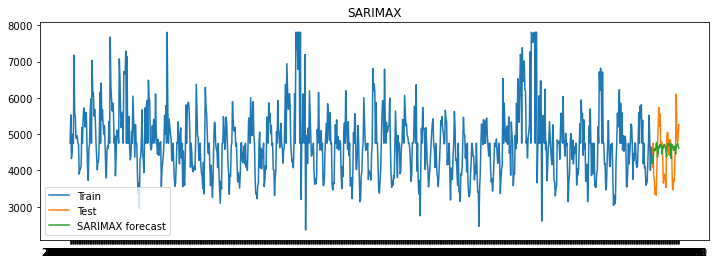

In [816]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(pred['Sales'][test.index.min():], label='SARIMAX forecast')
plt.legend(loc='best')
plt.title('SARIMAX')
plt.show()

In [817]:
rmse = np.sqrt(mean_squared_error(test['Sales'], pred['Sales'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-pred['Sales'])/test['Sales'])*100,2)
results = pd.DataFrame({'Method':['SARIMAX'], 'MAPE': [mape], 'RMSE': [rmse]})
results = results[['Method', 'RMSE', 'MAPE']]
results

Method      RMSE     MAPE
0  SARIMAX 720.23000 14.75000

## Cointegration Johnason test:

In [818]:
def joh_output(res):
    output = pd.DataFrame([res.lr2,res.lr1],
                          index=['max_eig_stat',"trace_stat"])
    print(output.T,'\n')
    print("Critical values(90%, 95%, 99%) of max_eig_stat\n",res.cvm,'\n')
    print("Critical values(90%, 95%, 99%) of trace_stat\n",res.cvt,'\n')

In [819]:
joh_model1 = coint_johansen(df[['Sales','Customers','CompetitionDistance_KM','Competition since years']],-1,1) # k_ar_diff +1 = K
joh_output(joh_model1)

   max_eig_stat    trace_stat
0 411,949.03587 870,043.68730
1 351,718.14305 458,094.65143
2 103,159.47970 106,376.50838
3   3,217.02868   3,217.02868 

Critical values(90%, 95%, 99%) of max_eig_stat
 [[21.837  24.1592 29.0609]
 [15.7175 17.7961 22.2519]
 [ 9.4748 11.2246 15.0923]
 [ 2.9762  4.1296  6.9406]] 

Critical values(90%, 95%, 99%) of trace_stat
 [[37.0339 40.1749 46.5716]
 [21.7781 24.2761 29.5147]
 [10.4741 12.3212 16.364 ]
 [ 2.9762  4.1296  6.9406]] 



## VARMAX-1:

In [820]:
train.head()

Store  DayOfWeek  is_weekend  Sales  Customers  Open StateHoliday  \
Date                                                                            
2013-01-01      1          2           0   4751        562     0            a   
2013-01-02      1          3           0   5530        668     1            0   
2013-01-03      1          4           0   4327        578     1            0   
2013-01-04      1          5           0   4486        619     1            0   
2013-01-05      1          6           1   4997        635     1            0   

            SchoolHoliday StoreType Assortment  CompetitionDistance_KM  \
Date                                                                     
2013-01-01              1         c          a                 0.30103   
2013-01-02              1         c          a                 0.30103   
2013-01-03              1         c          a                 0.30103   
2013-01-04              1         c          a                 0.30103   
2013-01-05              1         c          a                 0.30103   

            Competition since years  Promo2  
Date                                         
2013-01-01                  1.11394       0  
2013-01-02                  1.11394       0  
2013-01-03                  1.11394       0  
2013-01-04                  1.11394       0  
2013-01-05                  1.11394       0

In [821]:
train['Sales']=train['Sales'].astype('float64')
train['Customers']=train['Customers'].astype('float64')

In [822]:
exog = train['DayOfWeek']
mod = sm.tsa.VARMAX(train[['Sales', 'Customers']], order=(1,1), trend='n', exog=exog)
res = mod.fit(maxiter=1000, disp=False)
print(res.summary())

                             Statespace Model Results                             
Dep. Variable:     ['Sales', 'Customers']   No. Observations:                  900
Model:                        VARMAX(1,1)   Log Likelihood              -12134.543
Date:                    Mon, 31 May 2021   AIC                          24295.086
Time:                            20:07:57   BIC                          24357.517
Sample:                        01-01-2013   HQIC                         24318.935
                             - 06-19-2015                                         
Covariance Type:                      opg                                         
Ljung-Box (L1) (Q):             0.35, 3.17   Jarque-Bera (JB):        59.69, 156.37
Prob(Q):                        0.55, 0.07   Prob(JB):                   0.00, 0.00
Heteroskedasticity (H):         1.10, 0.92   Skew:                       0.59, 0.24
Prob(H) (two-sided):            0.41, 0.45   Kurtosis:                   3.42, 4.99


In [823]:
pred_var = test.copy()
pred_var['Sales'] = res.predict(test.index.min(), test.index.max(),exog=test['DayOfWeek'])

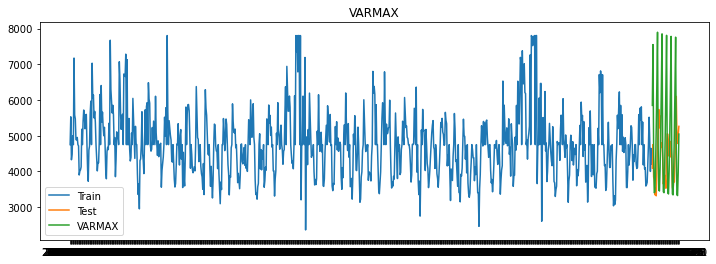

In [824]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(pred_var['Sales'][test.index.min():], label='VARMAX')
plt.legend(loc='best')
plt.title('VARMAX')
plt.show()

In [825]:
rmse = np.sqrt(mean_squared_error(test['Sales'], pred_var['Sales'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-pred_var['Sales'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['VARMAX'],'MAPE': [mape],'RMSE': [rmse]})
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

Method        RMSE     MAPE
0  SARIMAX   720.23000 14.75000
0   VARMAX 1,660.05000 29.30000

### VARMAX-2:

In [826]:
exog = train['Open']
mod = sm.tsa.VARMAX(train[['Sales', 'Customers']], order=(1,1), trend='n', exog=exog)
res = mod.fit(maxiter=1000, disp=False)
print(res.summary())

                             Statespace Model Results                             
Dep. Variable:     ['Sales', 'Customers']   No. Observations:                  900
Model:                        VARMAX(1,1)   Log Likelihood              -12114.724
Date:                    Mon, 31 May 2021   AIC                          24255.448
Time:                            20:09:28   BIC                          24317.879
Sample:                        01-01-2013   HQIC                         24279.297
                             - 06-19-2015                                         
Covariance Type:                      opg                                         
Ljung-Box (L1) (Q):            0.18, 14.55   Jarque-Bera (JB):       175.99, 185.90
Prob(Q):                        0.67, 0.00   Prob(JB):                   0.00, 0.00
Heteroskedasticity (H):         1.10, 1.00   Skew:                       1.03, 0.34
Prob(H) (two-sided):            0.39, 0.99   Kurtosis:                   3.68, 5.12


In [827]:
pred_var = test.copy()
pred_var['Sales'] = res.predict(test.index.min(), test.index.max(),exog=test['Open'])

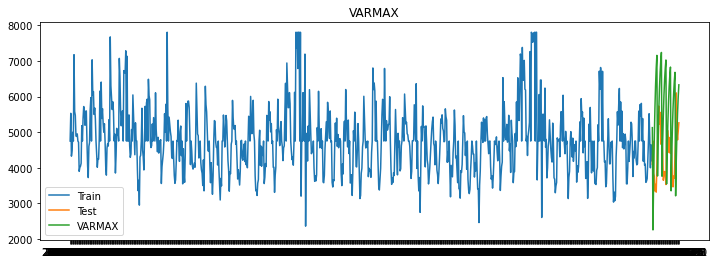

In [828]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(pred_var['Sales'][test.index.min():], label='VARMAX')
plt.legend(loc='best')
plt.title('VARMAX')
plt.show()

In [829]:
rmse = np.sqrt(mean_squared_error(test['Sales'], pred_var['Sales'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-pred_var['Sales'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['VARMAX2'],'MAPE': [mape],'RMSE': [rmse]})
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

Method        RMSE     MAPE
0  SARIMAX   720.23000 14.75000
0   VARMAX 1,660.05000 29.30000
0  VARMAX2 1,872.32000 38.97000

### VARMAX 3:

In [830]:
df.head()

Store  DayOfWeek  is_weekend  Sales  Customers  Open StateHoliday  \
Date                                                                            
2013-01-01   1115          2           0      0          0     0            a   
2013-01-01    746          2           0      0          0     0            a   
2013-01-01    171          2           0      0          0     0            a   
2013-01-01    694          2           0      0          0     0            a   
2013-01-01    396          2           0      0          0     0            a   

            SchoolHoliday StoreType Assortment  CompetitionDistance_KM  \
Date                                                                     
2013-01-01              1         d          c                 0.77815   
2013-01-01              1         d          c                 0.69897   
2013-01-01              1         a          a                 0.47712   
2013-01-01              1         a          c                 0.00000   
2013-01-01              1         a          c                 1.38021   

            Competition since years  Promo2  
Date                                         
2013-01-01                  0.90309       1  
2013-01-01                  1.00000       1  
2013-01-01                  0.90309       0  
2013-01-01                  0.95424       1  
2013-01-01                  0.90309       0

In [831]:
exog = train['Customers']
mod = sm.tsa.VARMAX(train[['Sales', 'Competition since years']], order=(1,1), trend='n', exog=exog)
res = mod.fit(maxiter=1000, disp=False)
print(res.summary())

                                    Statespace Model Results                                    
Dep. Variable:     ['Sales', 'Competition since years']   No. Observations:                  900
Model:                                      VARMAX(1,1)   Log Likelihood               -6136.690
Date:                                  Mon, 31 May 2021   AIC                          12299.380
Time:                                          20:09:46   BIC                          12361.811
Sample:                                      01-01-2013   HQIC                         12323.229
                                           - 06-19-2015                                         
Covariance Type:                                    opg                                         
Ljung-Box (L1) (Q):          36.92, 364.87   Jarque-Bera (JB):       179.83, 190.08
Prob(Q):                        0.00, 0.00   Prob(JB):                   0.00, 0.00
Heteroskedasticity (H):         1.17, 1.06   Skew:      

In [832]:
pred_var = test.copy()
pred_var['Sales'] = res.predict(test.index.min(), test.index.max(),exog=test['Customers'])

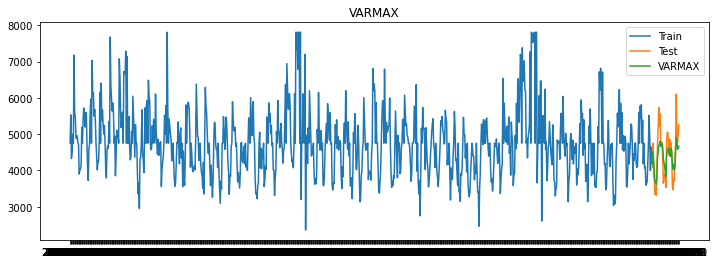

In [833]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(pred_var['Sales'][test.index.min():], label='VARMAX')
plt.legend(loc='best')
plt.title('VARMAX')
plt.show()

In [834]:
rmse = np.sqrt(mean_squared_error(test['Sales'], pred_var['Sales'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-pred_var['Sales'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['VARMAX3'],'MAPE': [mape],'RMSE': [rmse]})
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

Method        RMSE     MAPE
0  SARIMAX   720.23000 14.75000
0   VARMAX 1,660.05000 29.30000
0  VARMAX2 1,872.32000 38.97000
0  VARMAX3   437.55000  7.87000

### VARMAX 4:

In [835]:
exog = train['Customers']
mod = sm.tsa.VARMAX(train[['Sales', 'Competition since years']], order=(4,4), trend='n', exog=exog)
res = mod.fit(maxiter=1000, disp=False)
print(res.summary())

                                    Statespace Model Results                                    
Dep. Variable:     ['Sales', 'Competition since years']   No. Observations:                  900
Model:                                      VARMAX(4,4)   Log Likelihood               -6156.622
Date:                                  Mon, 31 May 2021   AIC                          12387.245
Time:                                          20:11:16   BIC                          12564.933
Sample:                                      01-01-2013   HQIC                         12455.123
                                           - 06-19-2015                                         
Covariance Type:                                    opg                                         
Ljung-Box (L1) (Q):           6.08, 344.59   Jarque-Bera (JB):        103.91, 30.22
Prob(Q):                        0.01, 0.00   Prob(JB):                   0.00, 0.00
Heteroskedasticity (H):         1.14, 0.99   Skew:      

In [836]:
pred_var = test.copy()
pred_var['Sales'] = res.predict(test.index.min(), test.index.max(),exog=test['Customers'])

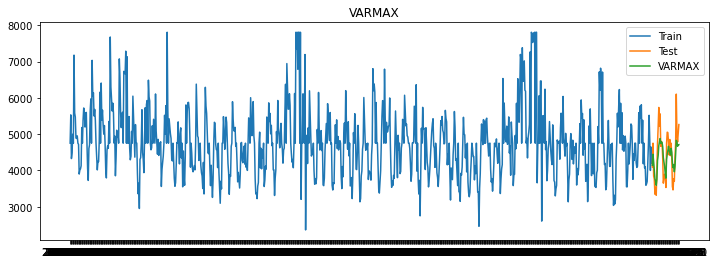

In [837]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(pred_var['Sales'][test.index.min():], label='VARMAX')
plt.legend(loc='best')
plt.title('VARMAX')
plt.show()

In [838]:
rmse = np.sqrt(mean_squared_error(test['Sales'], pred_var['Sales'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-pred_var['Sales'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['VARMAX4'],'MAPE': [mape],'RMSE': [rmse]})
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

Method        RMSE     MAPE
0  SARIMAX   720.23000 14.75000
0   VARMAX 1,660.05000 29.30000
0  VARMAX2 1,872.32000 38.97000
0  VARMAX3   437.55000  7.87000
0  VARMAX4   447.92000  7.98000

In [ ]:
# After comparing all the five models VARMAX 3 is the best model to forecast sales for Store 1. 

# Store 3

In [839]:
df_3=df[df['Store']==3]

In [840]:
df_3.head()

Store  DayOfWeek  is_weekend  Sales  Customers  Open StateHoliday  \
Date                                                                            
2013-01-01      3          2           0      0          0     0            a   
2013-01-02      3          3           0   6823        805     1            0   
2013-01-03      3          4           0   5902        721     1            0   
2013-01-04      3          5           0   6069        690     1            0   
2013-01-05      3          6           1   4523        525     1            0   

            SchoolHoliday StoreType Assortment  CompetitionDistance_KM  \
Date                                                                     
2013-01-01              1         a          a                 1.17609   
2013-01-02              1         a          a                 1.17609   
2013-01-03              1         a          a                 1.17609   
2013-01-04              1         a          a                 1.17609   
2013-01-05              0         a          a                 1.17609   

            Competition since years  Promo2  
Date                                         
2013-01-01                  1.17609       1  
2013-01-02                  1.17609       1  
2013-01-03                  1.17609       1  
2013-01-04                  1.17609       1  
2013-01-05                  1.17609       1

## Outlier Analysis:

In [841]:
#Here we perform outlier analysis for sales and customers variables.

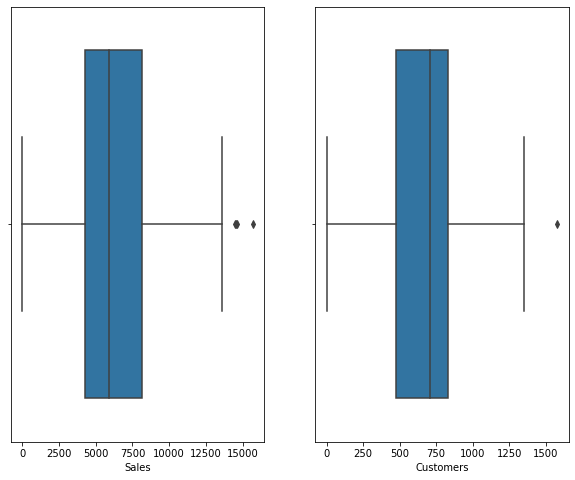

In [842]:
plt.figure(figsize=[10,8])
plt.subplot(1,2,1)
ax=sns.boxplot(df_3['Sales'])
plt.subplot(1,2,2)
ax=sns.boxplot(df_3['Customers'])

In [843]:
# We need to cap the outliers to their 99 percentile value.
df_3['Sales']=df_3['Sales'].clip(lower=df_3['Sales'].min(),upper=df_3['Sales'].quantile(0.99))
df_3['Customers']=df_3['Customers'].clip(lower=df_3['Customers'].min(),upper=df_3['Customers'].quantile(0.99))

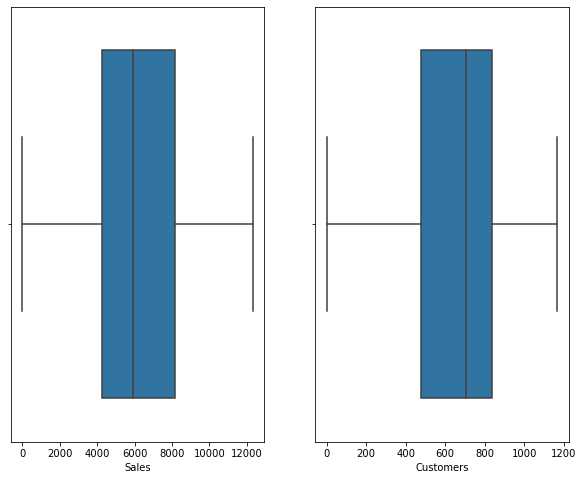

In [844]:
plt.figure(figsize=[10,8])
plt.subplot(1,2,1)
ax=sns.boxplot(df_3['Sales'])
plt.subplot(1,2,2)
ax=sns.boxplot(df_3['Customers'])

In [845]:
# We can see that outliers are minimized.

## Null value handling:

In [846]:
# If Sales/Customers value ==0 consider them as 0.
df_3['Sales']=df_3['Sales'].apply(lambda x:np.nan if x==0 else x)
df_3['Customers']=df_3['Customers'].apply(lambda x:np.nan if x==0 else x)

In [847]:
df_3[['Sales','Customers']].isnull().sum()

Sales        163
Customers    163
dtype: int64

In [848]:
# Since we have capped the outliers we can use mean for imputation.

### Mean imputation:

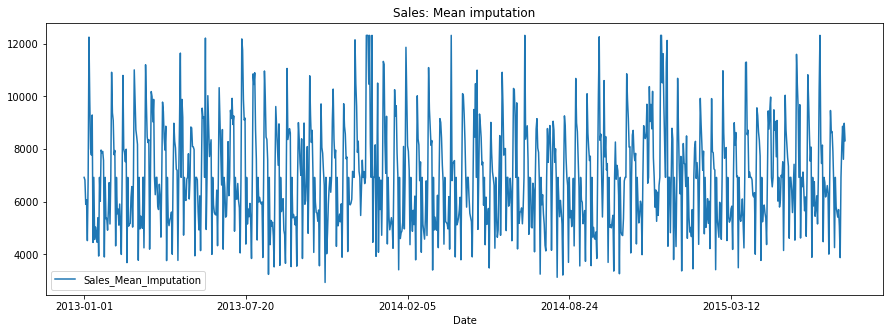

In [849]:
df_3.insert(4,'Sales_Mean_Imputation',df_3.Sales.fillna(df_3.Sales.mean()))
df_3[['Sales_Mean_Imputation']].plot(figsize=(15, 5))
plt.legend(loc='best')
plt.title('Sales: Mean imputation')
plt.show()

In [850]:
# since mean imputation is preferable we will drop sales and rename sales mean imputation as sales.
df_3.drop(['Sales'],axis=1,inplace=True)
df_3.rename(columns={'Sales_Mean_Imputation':'Sales'},inplace=True)

In [851]:
df_3.head()

Store  DayOfWeek  is_weekend       Sales  Customers  Open  \
Date                                                                    
2013-01-01      3          2           0 6,923.93171        nan     0   
2013-01-02      3          3           0 6,823.00000  805.00000     1   
2013-01-03      3          4           0 5,902.00000  721.00000     1   
2013-01-04      3          5           0 6,069.00000  690.00000     1   
2013-01-05      3          6           1 4,523.00000  525.00000     1   

           StateHoliday  SchoolHoliday StoreType Assortment  \
Date                                                          
2013-01-01            a              1         a          a   
2013-01-02            0              1         a          a   
2013-01-03            0              1         a          a   
2013-01-04            0              1         a          a   
2013-01-05            0              0         a          a   

            CompetitionDistance_KM  Competition since years  Promo2  
Date                                                                 
2013-01-01                 1.17609                  1.17609       1  
2013-01-02                 1.17609                  1.17609       1  
2013-01-03                 1.17609                  1.17609       1  
2013-01-04                 1.17609                  1.17609       1  
2013-01-05                 1.17609                  1.17609       1

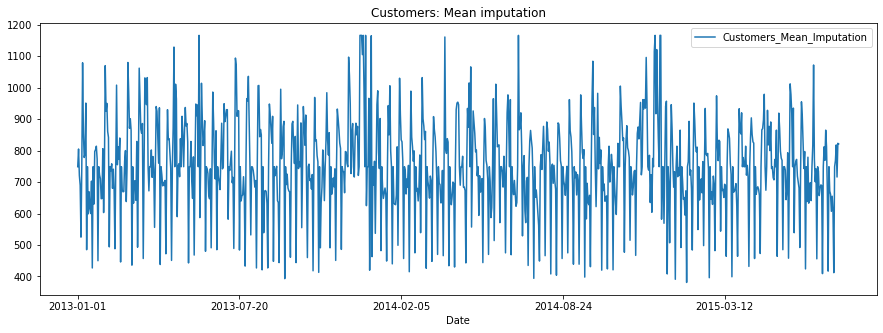

In [852]:
# Do the same mean imputation for Customers variable
df_3.insert(5,'Customers_Mean_Imputation',df_3.Customers.fillna(df_3.Customers.mean()))
df_3[['Customers_Mean_Imputation']].plot(figsize=(15, 5))
plt.legend(loc='best')
plt.title('Customers: Mean imputation')
plt.show()

In [853]:
df_3.drop(['Customers'],axis=1,inplace=True)
df_3.rename(columns={'Customers_Mean_Imputation':'Customers'},inplace=True)

In [854]:
df_3.head()

Store  DayOfWeek  is_weekend       Sales  Customers  Open  \
Date                                                                    
2013-01-01      3          2           0 6,923.93171  748.75071     0   
2013-01-02      3          3           0 6,823.00000  805.00000     1   
2013-01-03      3          4           0 5,902.00000  721.00000     1   
2013-01-04      3          5           0 6,069.00000  690.00000     1   
2013-01-05      3          6           1 4,523.00000  525.00000     1   

           StateHoliday  SchoolHoliday StoreType Assortment  \
Date                                                          
2013-01-01            a              1         a          a   
2013-01-02            0              1         a          a   
2013-01-03            0              1         a          a   
2013-01-04            0              1         a          a   
2013-01-05            0              0         a          a   

            CompetitionDistance_KM  Competition since years  Promo2  
Date                                                                 
2013-01-01                 1.17609                  1.17609       1  
2013-01-02                 1.17609                  1.17609       1  
2013-01-03                 1.17609                  1.17609       1  
2013-01-04                 1.17609                  1.17609       1  
2013-01-05                 1.17609                  1.17609       1

## Train-Test Split:

In [855]:
train_len=900
train=df_3[0:train_len]
test=df_3[train_len:]

In [856]:
print(train.shape)
print(test.shape)

(900, 13)
(42, 13)


## Stationarity Test (ADF Test):

In [857]:
for i in ['Sales','Customers']:
    print('\n\n' + i + ': ADF test results:')
    result = adfuller(train[i].dropna())
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        if key=='5%':
            print('\t%s: %.3f' % (key, value))



Sales: ADF test results:
ADF Statistic: -5.391640
p-value: 0.000004
Critical Values:
	5%: -2.865


Customers: ADF test results:
ADF Statistic: -5.170054
p-value: 0.000010
Critical Values:
	5%: -2.865


In [858]:
# since p-value for both variables is less than 0.05 they both are stationary.

## Model Building:

### Sarimax:

In [859]:
model = SARIMAX(train['Sales'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12),exog=train['Open']) 
model_fit = model.fit()
print(model_fit.params)

Open              36.33992
ar.L1              0.43070
ma.L1             -1.00000
ar.S.L12          -0.01706
ma.S.L12          -0.99974
sigma2     3,140,574.57457
dtype: float64


In [860]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Sales   No. Observations:                  900
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -7924.878
Date:                            Mon, 31 May 2021   AIC                          15861.757
Time:                                    20:11:38   BIC                          15890.484
Sample:                                01-01-2013   HQIC                         15872.738
                                     - 06-19-2015                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Open          36.3399    175.468      0.207      0.836    -307.571     380.251
ar.L1          0.4307      0.036     11.990      0.000       0.360       0.501
ma.L1         -1.0000      1.811     -0.552      0.581      -4.550       2.550
ar.S.L12      -0.0171      0.034     -0.495      0.621      -0.085       0.050
ma.S.L12      -0.9997      1.819     -0.549      0.583      -4.566       2.566
sigma2      3.141e+06      5e-06   6.28e+11      0.000    3.14e+06    3.14e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.82   Jarque-Bera (JB):                 4.85
Prob(Q):                              0.36   Prob(JB):                         0.09
Heteroskedasticity (H):               0.88   Skew:                             0.08
Prob(H) (two-sided):                  0.27   Kurtosis:                         3.32
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.33e+31. Standard errors may be unstable.
"""

In [861]:
pred = test.copy()
pred['Sales'] = model_fit.predict(test.index.min(), test.index.max(),exog=test['Open'])

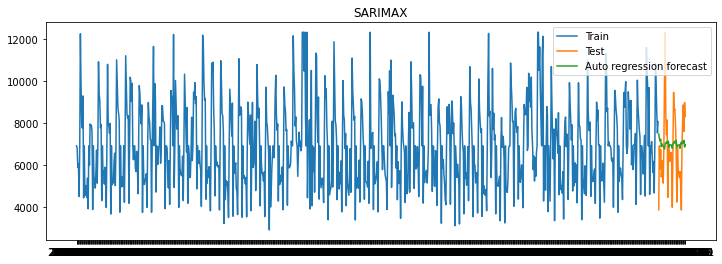

In [862]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(pred['Sales'][test.index.min():], label='Auto regression forecast')
plt.legend(loc='best')
plt.title('SARIMAX')
plt.show()

In [863]:
rmse = np.sqrt(mean_squared_error(test['Sales'], pred['Sales'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-pred['Sales'])/test['Sales'])*100,2)
results = pd.DataFrame({'Method':['SARIMAX'], 'MAPE': [mape], 'RMSE': [rmse]})
results = results[['Method', 'RMSE', 'MAPE']]
results

Method        RMSE     MAPE
0  SARIMAX 1,763.70000 22.25000

### VARMAX:

#### Cointegration - Johanson test:

In [864]:
def joh_output(res):
    output = pd.DataFrame([res.lr2,res.lr1],
                          index=['max_eig_stat',"trace_stat"])
    print(output.T,'\n')
    print("Critical values(90%, 95%, 99%) of max_eig_stat\n",res.cvm,'\n')
    print("Critical values(90%, 95%, 99%) of trace_stat\n",res.cvt,'\n')

In [865]:
joh_model1 = coint_johansen(df[['Sales','Customers','CompetitionDistance_KM','Competition since years']],-1,1) # k_ar_diff +1 = K
joh_output(joh_model1)

   max_eig_stat    trace_stat
0 411,949.03587 870,043.68730
1 351,718.14305 458,094.65143
2 103,159.47970 106,376.50838
3   3,217.02868   3,217.02868 

Critical values(90%, 95%, 99%) of max_eig_stat
 [[21.837  24.1592 29.0609]
 [15.7175 17.7961 22.2519]
 [ 9.4748 11.2246 15.0923]
 [ 2.9762  4.1296  6.9406]] 

Critical values(90%, 95%, 99%) of trace_stat
 [[37.0339 40.1749 46.5716]
 [21.7781 24.2761 29.5147]
 [10.4741 12.3212 16.364 ]
 [ 2.9762  4.1296  6.9406]] 



In [866]:
exog = train['DayOfWeek']
mod = sm.tsa.VARMAX(train[['Sales', 'Customers']], order=(1,1), trend='n',exog=exog)
res = mod.fit(maxiter=1000, disp=False)
print(res.summary())

                             Statespace Model Results                             
Dep. Variable:     ['Sales', 'Customers']   No. Observations:                  900
Model:                        VARMAX(1,1)   Log Likelihood              -13109.855
Date:                    Mon, 31 May 2021   AIC                          26245.709
Time:                            20:12:57   BIC                          26308.140
Sample:                        01-01-2013   HQIC                         26269.558
                             - 06-19-2015                                         
Covariance Type:                      opg                                         
Ljung-Box (L1) (Q):             1.83, 3.09   Jarque-Bera (JB):         48.87, 32.40
Prob(Q):                        0.18, 0.08   Prob(JB):                   0.00, 0.00
Heteroskedasticity (H):         0.93, 1.24   Skew:                      0.08, -0.37
Prob(H) (two-sided):            0.53, 0.07   Kurtosis:                   4.13, 3.56


In [867]:
pred_var = test.copy()
pred_var['Sales'] = res.predict(test.index.min(), test.index.max(),exog=test['DayOfWeek'])

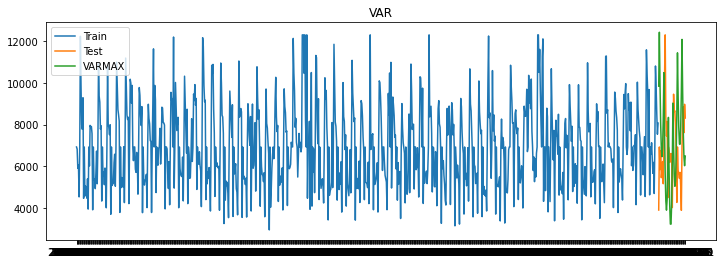

In [868]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(pred_var['Sales'][test.index.min():], label='VARMAX')
plt.legend(loc='best')
plt.title('VAR')
plt.show()

In [869]:
rmse = np.sqrt(mean_squared_error(test['Sales'], pred_var['Sales'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-pred_var['Sales'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['VARMAX'],'MAPE': [mape],'RMSE': [rmse]})
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

Method        RMSE     MAPE
0  SARIMAX 1,763.70000 22.25000
0   VARMAX 3,188.74000 44.24000

## VARMAX 2:

In [870]:
exog = train['Open']
mod = sm.tsa.VARMAX(train[['Sales', 'Customers']], order=(1,1), trend='n', exog=exog)
res = mod.fit(maxiter=1000, disp=False)
print(res.summary())

                             Statespace Model Results                             
Dep. Variable:     ['Sales', 'Customers']   No. Observations:                  900
Model:                        VARMAX(1,1)   Log Likelihood              -13317.429
Date:                    Mon, 31 May 2021   AIC                          26660.858
Time:                            20:14:19   BIC                          26723.289
Sample:                        01-01-2013   HQIC                         26684.707
                             - 06-19-2015                                         
Covariance Type:                      opg                                         
Ljung-Box (L1) (Q):           11.62, 21.17   Jarque-Bera (JB):          63.37, 5.50
Prob(Q):                        0.00, 0.00   Prob(JB):                   0.00, 0.06
Heteroskedasticity (H):         1.04, 0.96   Skew:                      0.56, -0.19
Prob(H) (two-sided):            0.74, 0.74   Kurtosis:                   2.33, 3.08


In [871]:
pred_var = test.copy()
pred_var['Sales'] = res.predict(test.index.min(), test.index.max(),exog=test['Open'])

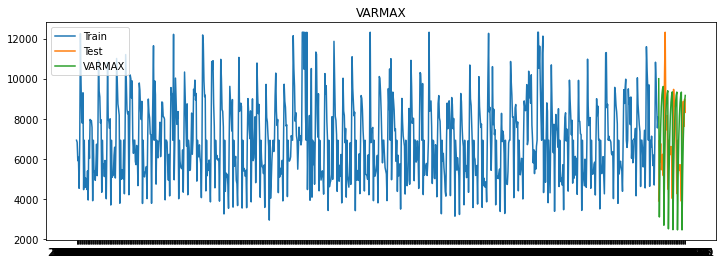

In [872]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(pred_var['Sales'][test.index.min():], label='VARMAX')
plt.legend(loc='best')
plt.title('VARMAX')
plt.show()

In [873]:
rmse = np.sqrt(mean_squared_error(test['Sales'], pred_var['Sales'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-pred_var['Sales'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['VARMAX2'],'MAPE': [mape],'RMSE': [rmse]})
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

Method        RMSE     MAPE
0  SARIMAX 1,763.70000 22.25000
0   VARMAX 3,188.74000 44.24000
0  VARMAX2 3,306.64000 47.15000

## VARMAX 3:

In [874]:
exog = train['Customers']
mod = sm.tsa.VARMAX(train[['Sales', 'Competition since years']], order=(1,1), trend='n', exog=exog)
res = mod.fit(maxiter=1000, disp=False)
print(res.summary())

                                    Statespace Model Results                                    
Dep. Variable:     ['Sales', 'Competition since years']   No. Observations:                  900
Model:                                      VARMAX(1,1)   Log Likelihood               -8211.332
Date:                                  Mon, 31 May 2021   AIC                          16448.664
Time:                                          20:14:55   BIC                          16511.095
Sample:                                      01-01-2013   HQIC                         16472.513
                                           - 06-19-2015                                         
Covariance Type:                                    opg                                         
Ljung-Box (L1) (Q):            8.88, 94.17   Jarque-Bera (JB):         39.53, 26.23
Prob(Q):                        0.00, 0.00   Prob(JB):                   0.00, 0.00
Heteroskedasticity (H):         0.91, 1.19   Skew:      

In [875]:
pred_var = test.copy()
pred_var['Sales'] = res.predict(test.index.min(), test.index.max(),exog=test['Customers'])

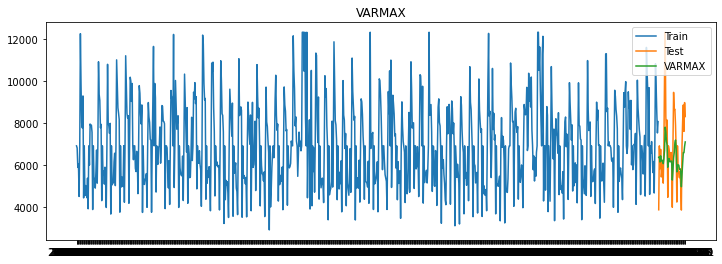

In [876]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(pred_var['Sales'][test.index.min():], label='VARMAX')
plt.legend(loc='best')
plt.title('VARMAX')
plt.show()

In [877]:
rmse = np.sqrt(mean_squared_error(test['Sales'], pred_var['Sales'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-pred_var['Sales'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['VARMAX3'],'MAPE': [mape],'RMSE': [rmse]})
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

Method        RMSE     MAPE
0  SARIMAX 1,763.70000 22.25000
0   VARMAX 3,188.74000 44.24000
0  VARMAX2 3,306.64000 47.15000
0  VARMAX3 1,456.24000 15.57000

## VARMAX 4:

In [878]:
exog = train['Customers']
mod = sm.tsa.VARMAX(train[['Sales', 'Competition since years']], order=(4,4), trend='n', exog=exog)
res = mod.fit(maxiter=1000, disp=False)
print(res.summary())

                                    Statespace Model Results                                    
Dep. Variable:     ['Sales', 'Competition since years']   No. Observations:                  900
Model:                                      VARMAX(4,4)   Log Likelihood               -8733.296
Date:                                  Mon, 31 May 2021   AIC                          17540.592
Time:                                          20:16:15   BIC                          17718.280
Sample:                                      01-01-2013   HQIC                         17608.470
                                           - 06-19-2015                                         
Covariance Type:                                    opg                                         
Ljung-Box (L1) (Q):             0.89, 0.00   Jarque-Bera (JB):         55.66, 65.30
Prob(Q):                        0.35, 0.96   Prob(JB):                   0.00, 0.00
Heteroskedasticity (H):         0.94, 1.03   Skew:      

In [879]:
pred_var = test.copy()
pred_var['Sales'] = res.predict(test.index.min(), test.index.max(),exog=test['Customers'])

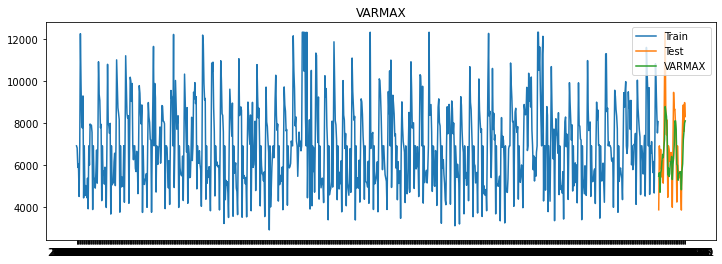

In [880]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(pred_var['Sales'][test.index.min():], label='VARMAX')
plt.legend(loc='best')
plt.title('VARMAX')
plt.show()

In [881]:
rmse = np.sqrt(mean_squared_error(test['Sales'], pred_var['Sales'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-pred_var['Sales'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['VARMAX4'],'MAPE': [mape],'RMSE': [rmse]})
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

Method        RMSE     MAPE
0  SARIMAX 1,763.70000 22.25000
0   VARMAX 3,188.74000 44.24000
0  VARMAX2 3,306.64000 47.15000
0  VARMAX3 1,456.24000 15.57000
0  VARMAX4 1,261.69000 14.22000

In [ ]:
# After comparing all the five models VARMAX 4 is the best model to forecast sales for Store 3. 

# Store - 8 :

In [882]:
df_8=df[df['Store']==8]
df_8.head()

Store  DayOfWeek  is_weekend  Sales  Customers  Open StateHoliday  \
Date                                                                            
2013-01-01      8          2           0      0          0     0            a   
2013-01-02      8          3           0   5419        698     1            0   
2013-01-03      8          4           0   4842        662     1            0   
2013-01-04      8          5           0   4059        517     1            0   
2013-01-05      8          6           1   2337        312     1            0   

            SchoolHoliday StoreType Assortment  CompetitionDistance_KM  \
Date                                                                     
2013-01-01              1         a          a                 0.90309   
2013-01-02              1         a          a                 0.90309   
2013-01-03              1         a          a                 0.90309   
2013-01-04              1         a          a                 0.90309   
2013-01-05              0         a          a                 0.90309   

            Competition since years  Promo2  
Date                                         
2013-01-01                  0.84510       0  
2013-01-02                  0.84510       0  
2013-01-03                  0.84510       0  
2013-01-04                  0.84510       0  
2013-01-05                  0.84510       0

In [883]:
df_8.shape

(942, 13)

## Outlier Analysis:

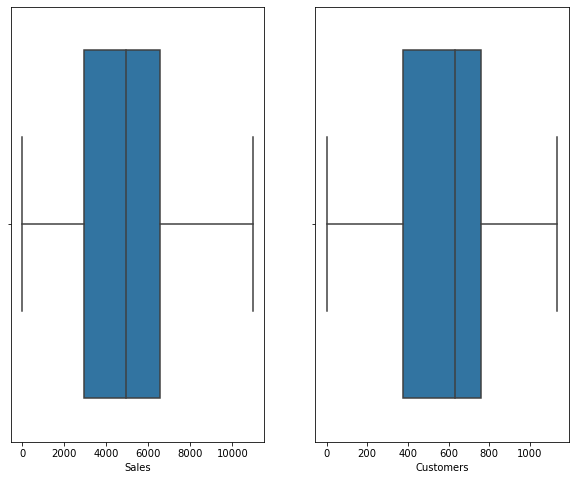

In [884]:
#Here we perform outlier analysis for sales and customers variables.
plt.figure(figsize=[10,8])
plt.subplot(1,2,1)
ax=sns.boxplot(df_8['Sales'])
plt.subplot(1,2,2)
ax=sns.boxplot(df_8['Customers'])

In [885]:
# We need to cap the outliers to their 99 percentile value.
df_8['Sales']=df_8['Sales'].clip(lower=df_8['Sales'].min(),upper=df_8['Sales'].quantile(0.99))
df_8['Customers']=df_8['Customers'].clip(lower=df_8['Customers'].min(),upper=df_8['Customers'].quantile(0.99))

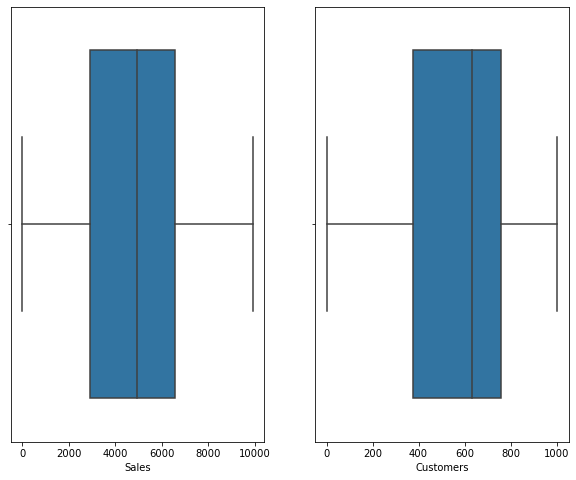

In [886]:
plt.figure(figsize=[10,8])
plt.subplot(1,2,1)
ax=sns.boxplot(df_8['Sales'])
plt.subplot(1,2,2)
ax=sns.boxplot(df_8['Customers'])

In [887]:
# We can see that outliers are minimized.

## Null values handling:

In [888]:
# If Sales/Customers value ==0 consider them as null.
df_8['Sales']=df_8['Sales'].apply(lambda x:np.nan if x==0 else x)
df_8['Customers']=df_8['Customers'].apply(lambda x:np.nan if x==0 else x)

In [889]:
df_8[['Sales','Customers']].isnull().sum()

Sales        158
Customers    158
dtype: int64

In [890]:
# Since we have capped the outliers we can use mean for imputation.

## Mean imputation:

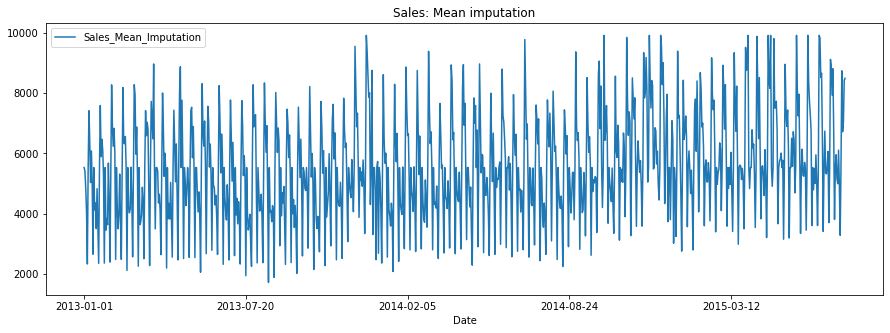

In [891]:
df_8.insert(4,'Sales_Mean_Imputation',df_8.Sales.fillna(df_8.Sales.mean()))
df_8[['Sales_Mean_Imputation']].plot(figsize=(15, 5))
plt.legend(loc='best')
plt.title('Sales: Mean imputation')
plt.show()

In [892]:
df_8.drop(['Sales'],axis=1,inplace=True)
df_8.rename(columns={'Sales_Mean_Imputation':'Sales'},inplace=True)

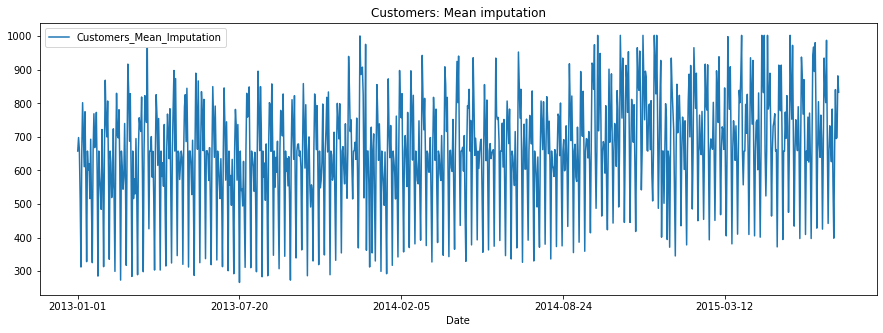

In [893]:
# Do the same mean imputation for Customers variable
df_8.insert(5,'Customers_Mean_Imputation',df_8.Customers.fillna(df_8.Customers.mean()))
df_8[['Customers_Mean_Imputation']].plot(figsize=(15, 5))
plt.legend(loc='best')
plt.title('Customers: Mean imputation')
plt.show()

In [894]:
df_8.drop(['Customers'],axis=1,inplace=True)
df_8.rename(columns={'Customers_Mean_Imputation':'Customers'},inplace=True)

In [895]:
# convert both sales and customers to int
df_8['Sales']=df_8['Sales'].astype('int64')
df_8['Customers']=df_8['Customers'].astype('int64')
df_8.head()

Store  DayOfWeek  is_weekend  Sales  Customers  Open StateHoliday  \
Date                                                                            
2013-01-01      8          2           0   5532        657     0            a   
2013-01-02      8          3           0   5419        698     1            0   
2013-01-03      8          4           0   4842        662     1            0   
2013-01-04      8          5           0   4059        517     1            0   
2013-01-05      8          6           1   2337        312     1            0   

            SchoolHoliday StoreType Assortment  CompetitionDistance_KM  \
Date                                                                     
2013-01-01              1         a          a                 0.90309   
2013-01-02              1         a          a                 0.90309   
2013-01-03              1         a          a                 0.90309   
2013-01-04              1         a          a                 0.90309   
2013-01-05              0         a          a                 0.90309   

            Competition since years  Promo2  
Date                                         
2013-01-01                  0.84510       0  
2013-01-02                  0.84510       0  
2013-01-03                  0.84510       0  
2013-01-04                  0.84510       0  
2013-01-05                  0.84510       0

## Train-Test Split:

In [897]:
train=df_8[0:train_len]
test=df_8[train_len:]

In [898]:
train.shape

(900, 13)

In [899]:
test.shape

(42, 13)

## Stationarity test(ADF test):

In [900]:
for i in ['Sales','Customers']:
    print('\n\n' + i + ': ADF test results:')
    result = adfuller(train[i].dropna())
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        if key=='5%':
            print('\t%s: %.3f' % (key, value))



Sales: ADF test results:
ADF Statistic: -3.239006
p-value: 0.017835
Critical Values:
	5%: -2.865


Customers: ADF test results:
ADF Statistic: -2.929589
p-value: 0.042014
Critical Values:
	5%: -2.865


## Model Building:

### SARIMAX:

In [901]:
model = SARIMAX(train['Sales'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12),exog=train['Customers']) 
model_fit = model.fit()
print(model_fit.params)

Customers         9.27351
ar.L1             0.47640
ma.L1            -1.00000
ar.S.L12          0.10828
ma.S.L12         -0.99935
sigma2      240,159.52479
dtype: float64


In [902]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Sales   No. Observations:                  900
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -6781.096
Date:                            Mon, 31 May 2021   AIC                          13574.191
Time:                                    20:17:45   BIC                          13602.918
Sample:                                01-01-2013   HQIC                         13585.173
                                     - 06-19-2015                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Customers      9.2735      0.101     91.991      0.000       9.076       9.471
ar.L1          0.4764      0.035     13.581      0.000       0.408       0.545
ma.L1         -1.0000      0.730     -1.369      0.171      -2.432       0.432
ar.S.L12       0.1083      0.048      2.268      0.023       0.015       0.202
ma.S.L12      -0.9993      0.733     -1.363      0.173      -2.436       0.438
sigma2      2.402e+05   3.06e-06   7.85e+10      0.000     2.4e+05     2.4e+05
===================================================================================
Ljung-Box (L1) (Q):                   1.54   Jarque-Bera (JB):                44.69
Prob(Q):                              0.22   Prob(JB):                         0.00
Heteroskedasticity (H):               1.30   Skew:                             0.32
Prob(H) (two-sided):                  0.02   Kurtosis:                         3.90
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 9.89e+26. Standard errors may be unstable.
"""

In [903]:
pred = test.copy()
pred['Sales'] = model_fit.predict(test.index.min(), test.index.max(),exog=test['Customers'])

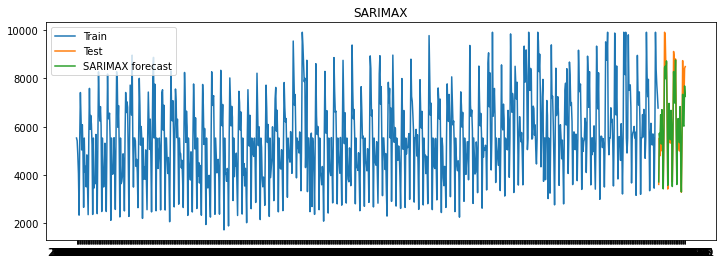

In [904]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(pred['Sales'][test.index.min():], label='SARIMAX forecast')
plt.legend(loc='best')
plt.title('SARIMAX')
plt.show()

In [905]:
rmse = np.sqrt(mean_squared_error(test['Sales'], pred['Sales'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-pred['Sales'])/test['Sales'])*100,2)
results = pd.DataFrame({'Method':['SARIMAX'], 'MAPE': [mape], 'RMSE': [rmse]})
results = results[['Method', 'RMSE', 'MAPE']]
results

Method      RMSE    MAPE
0  SARIMAX 678.92000 7.74000

## VARMAX 1:

In [906]:
train.head()

Store  DayOfWeek  is_weekend  Sales  Customers  Open StateHoliday  \
Date                                                                            
2013-01-01      8          2           0   5532        657     0            a   
2013-01-02      8          3           0   5419        698     1            0   
2013-01-03      8          4           0   4842        662     1            0   
2013-01-04      8          5           0   4059        517     1            0   
2013-01-05      8          6           1   2337        312     1            0   

            SchoolHoliday StoreType Assortment  CompetitionDistance_KM  \
Date                                                                     
2013-01-01              1         a          a                 0.90309   
2013-01-02              1         a          a                 0.90309   
2013-01-03              1         a          a                 0.90309   
2013-01-04              1         a          a                 0.90309   
2013-01-05              0         a          a                 0.90309   

            Competition since years  Promo2  
Date                                         
2013-01-01                  0.84510       0  
2013-01-02                  0.84510       0  
2013-01-03                  0.84510       0  
2013-01-04                  0.84510       0  
2013-01-05                  0.84510       0

In [907]:
train['Sales']=train['Sales'].astype('float64')
train['Customers']=train['Customers'].astype('float64')

In [908]:
exog = train['DayOfWeek']
mod = sm.tsa.VARMAX(train[['Sales', 'Customers']], order=(1,1), trend='n', exog=exog)
res = mod.fit(maxiter=1000, disp=False)
print(res.summary())

                             Statespace Model Results                             
Dep. Variable:     ['Sales', 'Customers']   No. Observations:                  900
Model:                        VARMAX(1,1)   Log Likelihood              -12762.704
Date:                    Mon, 31 May 2021   AIC                          25551.407
Time:                            20:22:03   BIC                          25613.839
Sample:                        01-01-2013   HQIC                         25575.257
                             - 06-19-2015                                         
Covariance Type:                      opg                                         
Ljung-Box (L1) (Q):           161.19, 7.12   Jarque-Bera (JB):          22.09, 4.49
Prob(Q):                        0.00, 0.01   Prob(JB):                   0.00, 0.11
Heteroskedasticity (H):         0.96, 1.29   Skew:                       0.28, 0.00
Prob(H) (two-sided):            0.75, 0.03   Kurtosis:                   2.46, 3.35


In [909]:
pred_var = test.copy()
pred_var['Sales'] = res.predict(test.index.min(), test.index.max(),exog=test['DayOfWeek'])

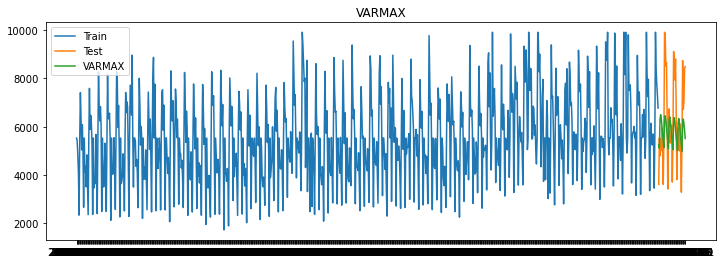

In [910]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(pred_var['Sales'][test.index.min():], label='VARMAX')
plt.legend(loc='best')
plt.title('VARMAX')
plt.show()

In [911]:
rmse = np.sqrt(mean_squared_error(test['Sales'], pred_var['Sales'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-pred_var['Sales'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['VARMAX'],'MAPE': [mape],'RMSE': [rmse]})
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

Method        RMSE     MAPE
0  SARIMAX   678.92000  7.74000
0   VARMAX 1,684.52000 22.52000

## VARMAX 2:

In [912]:
exog = train['Open']
mod = sm.tsa.VARMAX(train[['Sales', 'Customers']], order=(1,1), trend='n', exog=exog)
res = mod.fit(maxiter=1000, disp=False)
print(res.summary())

                             Statespace Model Results                             
Dep. Variable:     ['Sales', 'Customers']   No. Observations:                  900
Model:                        VARMAX(1,1)   Log Likelihood              -13228.683
Date:                    Mon, 31 May 2021   AIC                          26483.367
Time:                            20:22:49   BIC                          26545.798
Sample:                        01-01-2013   HQIC                         26507.216
                             - 06-19-2015                                         
Covariance Type:                      opg                                         
Ljung-Box (L1) (Q):             0.32, 0.16   Jarque-Bera (JB):         33.47, 37.48
Prob(Q):                        0.57, 0.69   Prob(JB):                   0.00, 0.00
Heteroskedasticity (H):         0.94, 1.39   Skew:                      0.37, -0.19
Prob(H) (two-sided):            0.62, 0.00   Kurtosis:                   2.41, 3.92


In [913]:
pred_var = test.copy()
pred_var['Sales'] = res.predict(test.index.min(), test.index.max(),exog=test['Open'])

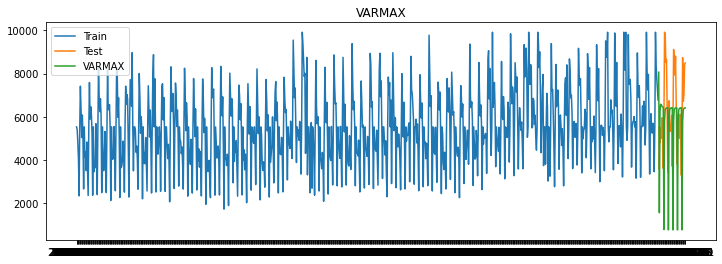

In [914]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(pred_var['Sales'][test.index.min():], label='VARMAX')
plt.legend(loc='best')
plt.title('VARMAX')
plt.show()

In [915]:
rmse = np.sqrt(mean_squared_error(test['Sales'], pred_var['Sales'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-pred_var['Sales'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['VARMAX2'],'MAPE': [mape],'RMSE': [rmse]})
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

Method        RMSE     MAPE
0  SARIMAX   678.92000  7.74000
0   VARMAX 1,684.52000 22.52000
0  VARMAX2 2,624.23000 39.28000

### VARMAX 3:

In [916]:
exog = train['Customers']
mod = sm.tsa.VARMAX(train[['Sales', 'Competition since years']], order=(1,1), trend='n', exog=exog)
res = mod.fit(maxiter=1000, disp=False)
print(res.summary())

                                    Statespace Model Results                                    
Dep. Variable:     ['Sales', 'Competition since years']   No. Observations:                  900
Model:                                      VARMAX(1,1)   Log Likelihood               -8290.366
Date:                                  Mon, 31 May 2021   AIC                          16606.732
Time:                                          20:23:12   BIC                          16669.163
Sample:                                      01-01-2013   HQIC                         16630.581
                                           - 06-19-2015                                         
Covariance Type:                                    opg                                         
Ljung-Box (L1) (Q):             2.86, 0.31   Jarque-Bera (JB):         68.46, 73.46
Prob(Q):                        0.09, 0.58   Prob(JB):                   0.00, 0.00
Heteroskedasticity (H):         1.05, 0.84   Skew:      

In [917]:
pred_var = test.copy()
pred_var['Sales'] = res.predict(test.index.min(), test.index.max(),exog=test['Customers'])

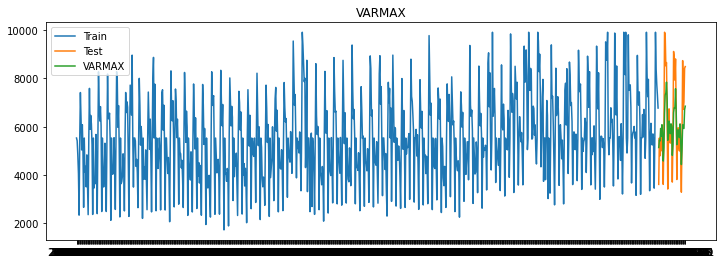

In [918]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(pred_var['Sales'][test.index.min():], label='VARMAX')
plt.legend(loc='best')
plt.title('VARMAX')
plt.show()

In [919]:
rmse = np.sqrt(mean_squared_error(test['Sales'], pred_var['Sales'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-pred_var['Sales'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['VARMAX3'],'MAPE': [mape],'RMSE': [rmse]})
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

Method        RMSE     MAPE
0  SARIMAX   678.92000  7.74000
0   VARMAX 1,684.52000 22.52000
0  VARMAX2 2,624.23000 39.28000
0  VARMAX3 1,232.71000 15.34000

### VARMAX 4:

In [920]:
exog = train['Customers']
mod = sm.tsa.VARMAX(train[['Sales', 'Competition since years']], order=(6,6), trend='n', exog=exog)
res = mod.fit(maxiter=1000, disp=False)
print(res.summary())

                                    Statespace Model Results                                    
Dep. Variable:     ['Sales', 'Competition since years']   No. Observations:                  900
Model:                                      VARMAX(6,6)   Log Likelihood               -8081.630
Date:                                  Mon, 31 May 2021   AIC                          16269.261
Time:                                          20:25:58   BIC                          16523.787
Sample:                                      01-01-2013   HQIC                         16366.492
                                           - 06-19-2015                                         
Covariance Type:                                    opg                                         
Ljung-Box (L1) (Q):            93.28, 0.47   Jarque-Bera (JB):          28.96, 0.98
Prob(Q):                        0.00, 0.49   Prob(JB):                   0.00, 0.61
Heteroskedasticity (H):         1.08, 1.13   Skew:      

In [921]:
pred_var = test.copy()
pred_var['Sales'] = res.predict(test.index.min(), test.index.max(),exog=test['Customers'])

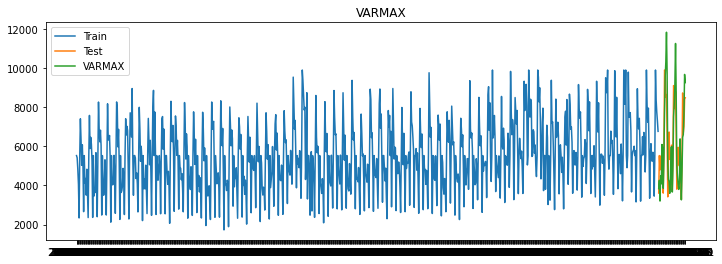

In [922]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(pred_var['Sales'][test.index.min():], label='VARMAX')
plt.legend(loc='best')
plt.title('VARMAX')
plt.show()

In [923]:
rmse = np.sqrt(mean_squared_error(test['Sales'], pred_var['Sales'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-pred_var['Sales'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['VARMAX4'],'MAPE': [mape],'RMSE': [rmse]})
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

Method        RMSE     MAPE
0  SARIMAX   678.92000  7.74000
0   VARMAX 1,684.52000 22.52000
0  VARMAX2 2,624.23000 39.28000
0  VARMAX3 1,232.71000 15.34000
0  VARMAX4 1,408.30000 17.88000

In [ ]:
# After comparing all the five models SARIMAX is the best model to forecast sales for Store 8. 

# Store 9:

In [992]:
df_9=df[df['Store']==9]
df_9.head()

Store  DayOfWeek  is_weekend  Sales  Customers  Open StateHoliday  \
Date                                                                            
2013-01-01      9          2           0      0          0     0            a   
2013-01-02      9          3           0   4903        481     1            0   
2013-01-03      9          4           0   4602        453     1            0   
2013-01-04      9          5           0   4798        497     1            0   
2013-01-05      9          6           1   4254        450     1            0   

            SchoolHoliday StoreType Assortment  CompetitionDistance_KM  \
Date                                                                     
2013-01-01              1         a          c                 0.47712   
2013-01-02              1         a          c                 0.47712   
2013-01-03              1         a          c                 0.47712   
2013-01-04              1         a          c                 0.47712   
2013-01-05              0         a          c                 0.47712   

            Competition since years  Promo2  
Date                                         
2013-01-01                  1.32222       0  
2013-01-02                  1.32222       0  
2013-01-03                  1.32222       0  
2013-01-04                  1.32222       0  
2013-01-05                  1.32222       0

In [993]:
df_9.shape

(942, 13)

## Outliers Analysis:

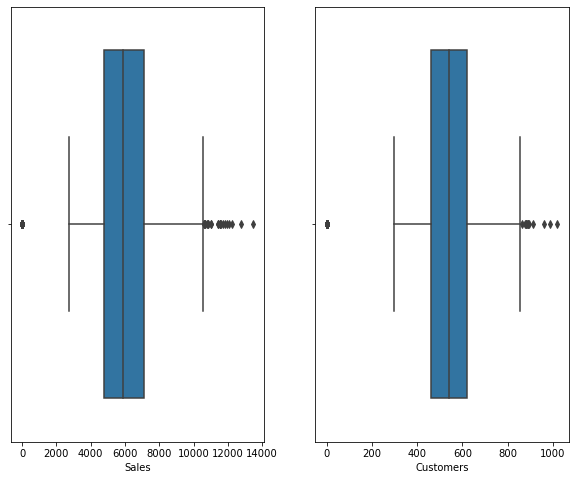

In [994]:
#Here we perform outlier analysis for sales and customers variables.
plt.figure(figsize=[10,8])
plt.subplot(1,2,1)
ax=sns.boxplot(df_9['Sales'])
plt.subplot(1,2,2)
ax=sns.boxplot(df_9['Customers'])

In [995]:
# We need to cap the outliers to their 99 percentile value.
df_9['Sales']=df_9['Sales'].clip(lower=df_9['Sales'].min(),upper=df_9['Sales'].quantile(0.99))
df_9['Customers']=df_9['Customers'].clip(lower=df_9['Customers'].min(),upper=df_9['Customers'].quantile(0.99))

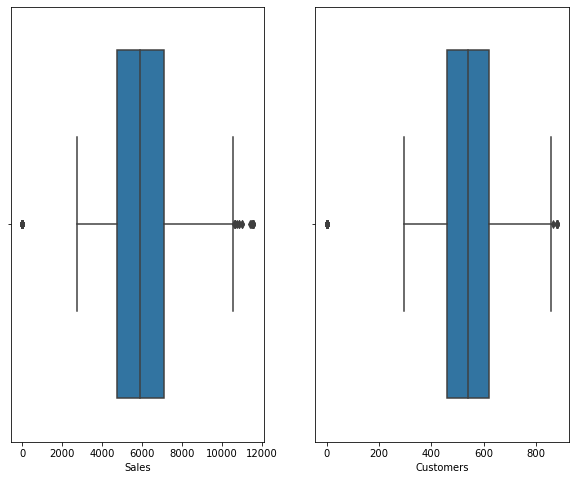

In [996]:
#Here we perform outlier analysis for sales and customers variables.
plt.figure(figsize=[10,8])
plt.subplot(1,2,1)
ax=sns.boxplot(df_9['Sales'])
plt.subplot(1,2,2)
ax=sns.boxplot(df_9['Customers'])

In [997]:
# We can see that outliers are minimized.

## Handling null values:

In [998]:
# If Sales/Customers value ==0 consider them as null.
df_9['Sales']=df_9['Sales'].apply(lambda x:np.nan if x==0 else x)
df_9['Customers']=df_9['Customers'].apply(lambda x:np.nan if x==0 else x)

In [999]:
df_9[['Sales','Customers']].isnull().sum()

Sales        163
Customers    163
dtype: int64

## Mean imputation:

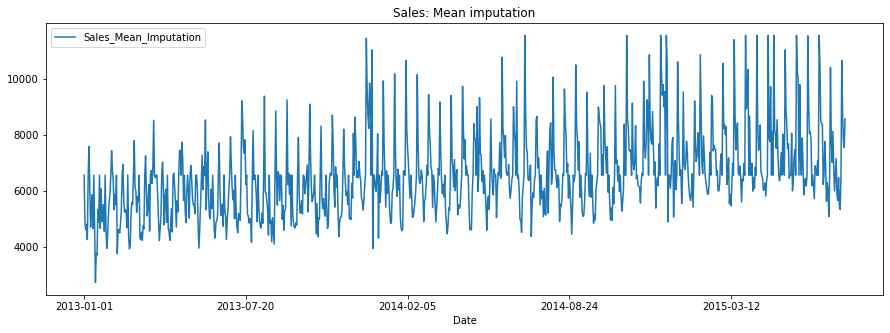

In [1000]:
df_9.insert(4,'Sales_Mean_Imputation',df_9.Sales.fillna(df_9.Sales.mean()))
df_9[['Sales_Mean_Imputation']].plot(figsize=(15, 5))
plt.legend(loc='best')
plt.title('Sales: Mean imputation')
plt.show()

In [1001]:
df_9.drop(['Sales'],axis=1,inplace=True)
df_9.rename(columns={'Sales_Mean_Imputation':'Sales'},inplace=True)

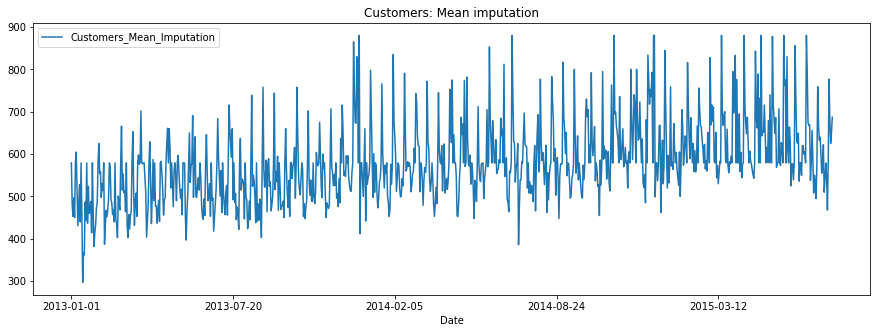

In [1002]:
# Do the same mean imputation for Customers variable
df_9.insert(5,'Customers_Mean_Imputation',df_9.Customers.fillna(df_9.Customers.mean()))
df_9[['Customers_Mean_Imputation']].plot(figsize=(15, 5))
plt.legend(loc='best')
plt.title('Customers: Mean imputation')
plt.show()

In [1003]:
df_9.drop(['Customers'],axis=1,inplace=True)
df_9.rename(columns={'Customers_Mean_Imputation':'Customers'},inplace=True)

## Train-Test Split:

In [1004]:
train=df_9[0:train_len]
test=df_9[train_len:]

In [1005]:
train.shape

(900, 13)

In [1006]:
test.shape

(42, 13)

## Stationarity test (ADF test):

In [1007]:
for i in ['Sales','Customers']:
    print('\n\n' + i + ': ADF test results:')
    result = adfuller(train[i].dropna())
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        if key=='5%':
            print('\t%s: %.3f' % (key, value))



Sales: ADF test results:
ADF Statistic: -2.726271
p-value: 0.069601
Critical Values:
	5%: -2.865


Customers: ADF test results:
ADF Statistic: -2.758790
p-value: 0.064406
Critical Values:
	5%: -2.865


In [1008]:
# since p-value for both variables is less than 0.05 they both are stationary.

## Model Building:

### SARIMAX:

In [1009]:
model = SARIMAX(train['Sales'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12),exog=train['Promo2']) 
model_fit = model.fit()
print(model_fit.params)

Promo2             0.00000
ar.L1              0.40647
ma.L1             -1.00000
ar.S.L12          -0.02157
ma.S.L12          -0.99941
sigma2     1,434,607.52408
dtype: float64


In [1010]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Sales   No. Observations:                  900
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -7577.040
Date:                            Mon, 31 May 2021   AIC                          15166.080
Time:                                    20:47:50   BIC                          15194.807
Sample:                                01-01-2013   HQIC                         15177.061
                                     - 06-19-2015                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Promo2              0   3.27e+05          0      1.000   -6.42e+05    6.42e+05
ar.L1          0.4065      0.034     11.837      0.000       0.339       0.474
ma.L1         -1.0000      0.743     -1.346      0.178      -2.456       0.456
ar.S.L12      -0.0216      0.043     -0.498      0.619      -0.107       0.063
ma.S.L12      -0.9994      0.746     -1.340      0.180      -2.461       0.463
sigma2      1.435e+06      1.659   8.65e+05      0.000    1.43e+06    1.43e+06
===================================================================================
Ljung-Box (L1) (Q):                   1.48   Jarque-Bera (JB):               689.82
Prob(Q):                              0.22   Prob(JB):                         0.00
Heteroskedasticity (H):               1.98   Skew:                             1.41
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.28
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.65e+26. Standard errors may be unstable.
"""

In [1011]:
pred = test.copy()
pred['Sales'] = model_fit.predict(test.index.min(), test.index.max(),exog=test['Promo2'])

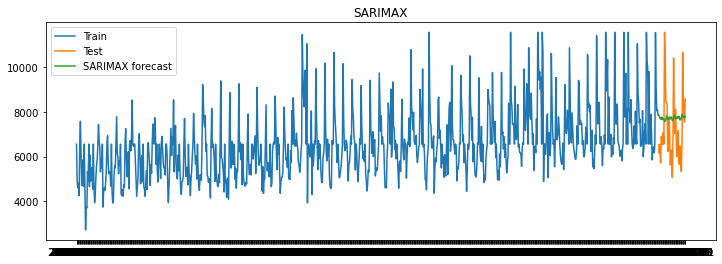

In [1012]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(pred['Sales'][test.index.min():], label='SARIMAX forecast')
plt.legend(loc='best')
plt.title('SARIMAX')
plt.show()

In [1013]:
rmse = np.sqrt(mean_squared_error(test['Sales'], pred['Sales'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-pred['Sales'])/test['Sales'])*100,2)
results = pd.DataFrame({'Method':['SARIMAX'], 'MAPE': [mape], 'RMSE': [rmse]})
results = results[['Method', 'RMSE', 'MAPE']]
results

Method        RMSE     MAPE
0  SARIMAX 1,597.49000 19.64000

### VARMAX 1:

In [1014]:
train['Sales']=train['Sales'].astype('float64')
train['Customers']=train['Customers'].astype('float64')

In [1015]:
exog = train['DayOfWeek']
mod = sm.tsa.VARMAX(train[['Sales', 'Customers']], order=(1,1), trend='n', exog=exog)
res = mod.fit(maxiter=1000, disp=False)
print(res.summary())

                             Statespace Model Results                             
Dep. Variable:     ['Sales', 'Customers']   No. Observations:                  900
Model:                        VARMAX(1,1)   Log Likelihood              -12360.489
Date:                    Mon, 31 May 2021   AIC                          24746.979
Time:                            20:49:08   BIC                          24809.410
Sample:                        01-01-2013   HQIC                         24770.828
                             - 06-19-2015                                         
Covariance Type:                      opg                                         
Ljung-Box (L1) (Q):             0.34, 2.28   Jarque-Bera (JB):       122.51, 126.18
Prob(Q):                        0.56, 0.13   Prob(JB):                   0.00, 0.00
Heteroskedasticity (H):         2.04, 1.53   Skew:                       0.74, 0.08
Prob(H) (two-sided):            0.00, 0.00   Kurtosis:                   4.05, 4.83


In [1016]:
pred_var = test.copy()
pred_var['Sales'] = res.predict(test.index.min(), test.index.max(),exog=test['DayOfWeek'])

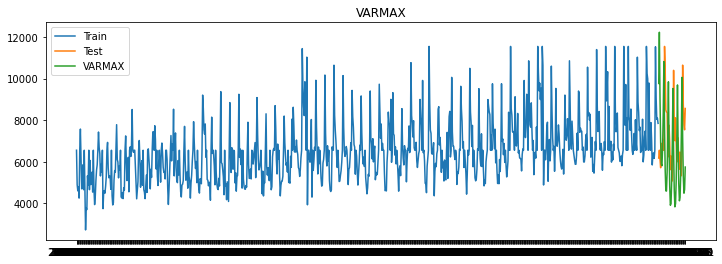

In [1017]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(pred_var['Sales'][test.index.min():], label='VARMAX')
plt.legend(loc='best')
plt.title('VARMAX')
plt.show()

In [1018]:
rmse = np.sqrt(mean_squared_error(test['Sales'], pred_var['Sales'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-pred_var['Sales'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['VARMAX'],'MAPE': [mape],'RMSE': [rmse]})
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

Method        RMSE     MAPE
0  SARIMAX 1,597.49000 19.64000
0   VARMAX 2,817.40000 34.06000

## VARMAX 2:

In [1019]:
exog = train['Open']
mod = sm.tsa.VARMAX(train[['Sales', 'Customers']], order=(1,1), trend='n', exog=exog)
res = mod.fit(maxiter=1000, disp=False)
print(res.summary())

                             Statespace Model Results                             
Dep. Variable:     ['Sales', 'Customers']   No. Observations:                  900
Model:                        VARMAX(1,1)   Log Likelihood              -12398.641
Date:                    Mon, 31 May 2021   AIC                          24823.283
Time:                            20:51:04   BIC                          24885.714
Sample:                        01-01-2013   HQIC                         24847.132
                             - 06-19-2015                                         
Covariance Type:                      opg                                         
Ljung-Box (L1) (Q):             1.93, 0.23   Jarque-Bera (JB):        165.57, 56.15
Prob(Q):                        0.16, 0.63   Prob(JB):                   0.00, 0.00
Heteroskedasticity (H):         0.77, 1.38   Skew:                       1.05, 0.13
Prob(H) (two-sided):            0.02, 0.01   Kurtosis:                   2.89, 4.19


In [1020]:
pred_var = test.copy()
pred_var['Sales'] = res.predict(test.index.min(), test.index.max(),exog=test['Open'])

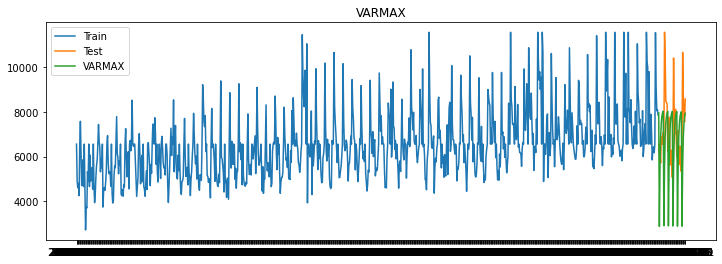

In [1021]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(pred_var['Sales'][test.index.min():], label='VARMAX')
plt.legend(loc='best')
plt.title('VARMAX')
plt.show()

In [1022]:
rmse = np.sqrt(mean_squared_error(test['Sales'], pred_var['Sales'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-pred_var['Sales'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['VARMAX2'],'MAPE': [mape],'RMSE': [rmse]})
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

Method        RMSE     MAPE
0  SARIMAX 1,597.49000 19.64000
0   VARMAX 2,817.40000 34.06000
0  VARMAX2 2,430.99000 27.63000

### VARMAX 3:

In [1023]:
exog = train['Customers']
mod = sm.tsa.VARMAX(train[['Sales', 'Competition since years']], order=(1,1), trend='n', exog=exog)
res = mod.fit(maxiter=1000, disp=False)
print(res.summary())

                                    Statespace Model Results                                    
Dep. Variable:     ['Sales', 'Competition since years']   No. Observations:                  900
Model:                                      VARMAX(1,1)   Log Likelihood               -6894.375
Date:                                  Mon, 31 May 2021   AIC                          13814.750
Time:                                          20:51:23   BIC                          13877.181
Sample:                                      01-01-2013   HQIC                         13838.599
                                           - 06-19-2015                                         
Covariance Type:                                    opg                                         
Ljung-Box (L1) (Q):           28.78, 83.47   Jarque-Bera (JB):        829.66, 70.85
Prob(Q):                        0.00, 0.00   Prob(JB):                   0.00, 0.00
Heteroskedasticity (H):         2.29, 0.84   Skew:      

In [1024]:
pred_var = test.copy()
pred_var['Sales'] = res.predict(test.index.min(), test.index.max(),exog=test['Customers'])

In [1025]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(pred_var['Sales'][test.index.min():], label='VARMAX')
plt.legend(loc='best')
plt.title('VARMAX')
plt.show()

In [1026]:
rmse = np.sqrt(mean_squared_error(test['Sales'], pred_var['Sales'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-pred_var['Sales'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['VARMAX3'],'MAPE': [mape],'RMSE': [rmse]})
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

Method        RMSE     MAPE
0  SARIMAX 1,597.49000 19.64000
0   VARMAX 2,817.40000 34.06000
0  VARMAX2 2,430.99000 27.63000
0  VARMAX3   895.45000  7.54000

### VARMAX 4:

In [1027]:
exog = train['Customers']
mod = sm.tsa.VARMAX(train[['Sales', 'Competition since years']], order=(6,6), trend='n', exog=exog)
res = mod.fit(maxiter=1000, disp=False)
print(res.summary())

                                    Statespace Model Results                                    
Dep. Variable:     ['Sales', 'Competition since years']   No. Observations:                  900
Model:                                      VARMAX(6,6)   Log Likelihood               -6405.445
Date:                                  Mon, 31 May 2021   AIC                          12916.891
Time:                                          20:56:08   BIC                          13171.418
Sample:                                      01-01-2013   HQIC                         13014.122
                                           - 06-19-2015                                         
Covariance Type:                                    opg                                         
Ljung-Box (L1) (Q):           0.00, 279.98   Jarque-Bera (JB):          69.78, 2.19
Prob(Q):                        0.97, 0.00   Prob(JB):                   0.00, 0.33
Heteroskedasticity (H):         1.98, 0.80   Skew:      

In [1028]:
pred_var = test.copy()
pred_var['Sales'] = res.predict(test.index.min(), test.index.max(),exog=test['Customers'])

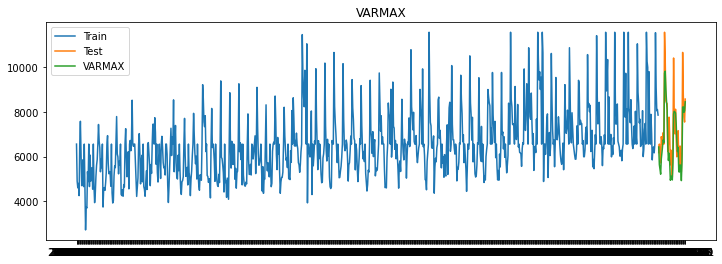

In [1029]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(pred_var['Sales'][test.index.min():], label='VARMAX')
plt.legend(loc='best')
plt.title('VARMAX')
plt.show()

In [1030]:
rmse = np.sqrt(mean_squared_error(test['Sales'], pred_var['Sales'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-pred_var['Sales'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['VARMAX4'],'MAPE': [mape],'RMSE': [rmse]})
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

Method        RMSE     MAPE
0  SARIMAX 1,597.49000 19.64000
0   VARMAX 2,817.40000 34.06000
0  VARMAX2 2,430.99000 27.63000
0  VARMAX3   895.45000  7.54000
0  VARMAX4   878.52000  9.12000

In [ ]:
# After comparing all the five models VARMAX 3 is the best model to forecast sales for Store 9. 

# Store 13:

In [1125]:
df_13=df[df['Store']==13]

In [1127]:
df_13.head()

Store  DayOfWeek  is_weekend  Sales  Customers  Open StateHoliday  \
Date                                                                            
2013-01-01     13          2           0      0          0     0            a   
2013-01-02     13          3           0   3737        317     1            0   
2013-01-03     13          4           0   3674        292     1            0   
2013-01-04     13          5           0   3848        340     1            0   
2013-01-05     13          6           1   4285        344     1            0   

            SchoolHoliday StoreType Assortment  CompetitionDistance_KM  \
Date                                                                     
2013-01-01              1         d          a                 0.00000   
2013-01-02              1         d          a                 0.00000   
2013-01-03              1         d          a                 0.00000   
2013-01-04              1         d          a                 0.00000   
2013-01-05              0         d          a                 0.00000   

            Competition since years  Promo2  
Date                                         
2013-01-01                  0.90309       1  
2013-01-02                  0.90309       1  
2013-01-03                  0.90309       1  
2013-01-04                  0.90309       1  
2013-01-05                  0.90309       1

In [1128]:
df_13.shape

(758, 13)

## Outlier Analysis:

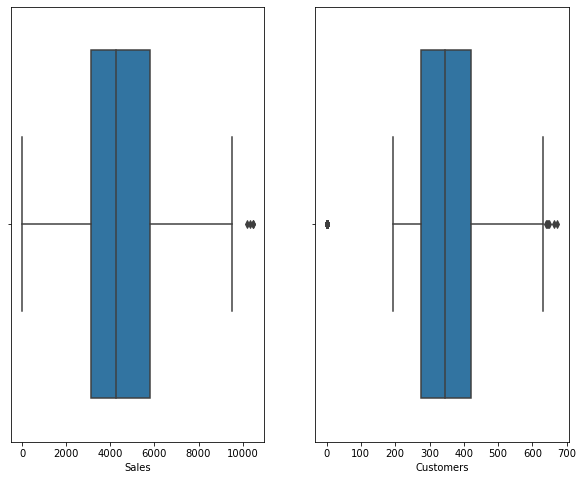

In [1129]:
#Here we perform outlier analysis for sales and customers variables.
plt.figure(figsize=[10,8])
plt.subplot(1,2,1)
ax=sns.boxplot(df_13['Sales'])
plt.subplot(1,2,2)
ax=sns.boxplot(df_13['Customers'])

In [1130]:
# We need to cap the outliers to their 99 percentile value.
df_13['Sales']=df_13['Sales'].clip(lower=df_13['Sales'].min(),upper=df_13['Sales'].quantile(0.99))
df_13['Customers']=df_13['Customers'].clip(lower=df_13['Customers'].min(),upper=df_13['Customers'].quantile(0.99))

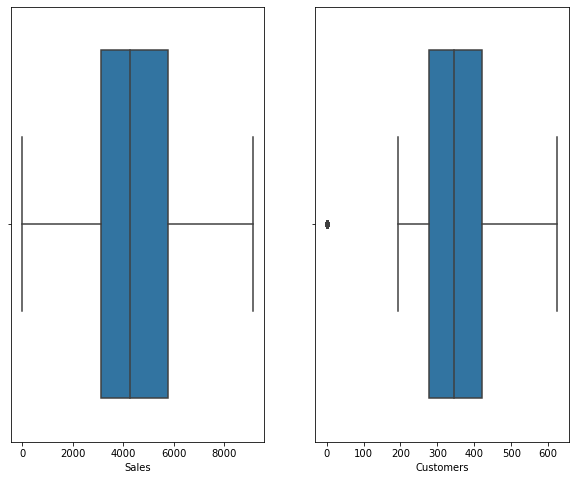

In [1131]:
plt.figure(figsize=[10,8])
plt.subplot(1,2,1)
ax=sns.boxplot(df_13['Sales'])
plt.subplot(1,2,2)
ax=sns.boxplot(df_13['Customers'])

In [1132]:
# We can see that outliers are minimized.

## Null Value Handling:

In [1133]:
# If Sales/Customers value ==0 consider them as null.
df_13['Sales']=df_13['Sales'].apply(lambda x:np.nan if x==0 else x)
df_13['Customers']=df_13['Customers'].apply(lambda x:np.nan if x==0 else x)

In [1134]:
df_13[['Sales','Customers']].isnull().sum()

Sales        137
Customers    137
dtype: int64

In [1135]:
# Since we have capped the outliers we can use mean for imputation.

## Mean imputation:

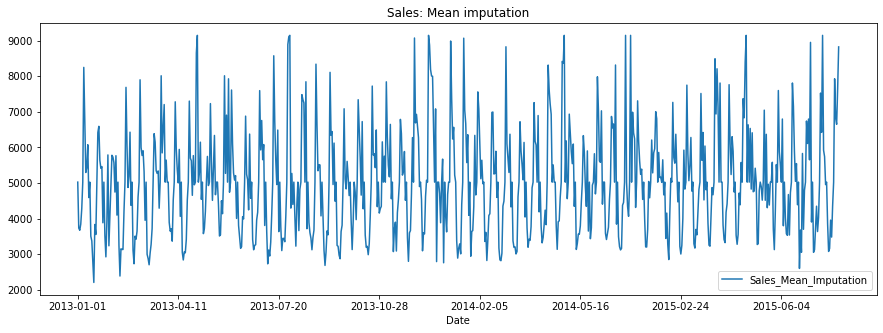

In [1136]:
df_13.insert(4,'Sales_Mean_Imputation',df_13.Sales.fillna(df_13.Sales.mean()))
df_13[['Sales_Mean_Imputation']].plot(figsize=(15, 5))
plt.legend(loc='best')
plt.title('Sales: Mean imputation')
plt.show()

In [1137]:
df_13.drop(['Sales'],axis=1,inplace=True)
df_13.rename(columns={'Sales_Mean_Imputation':'Sales'},inplace=True)

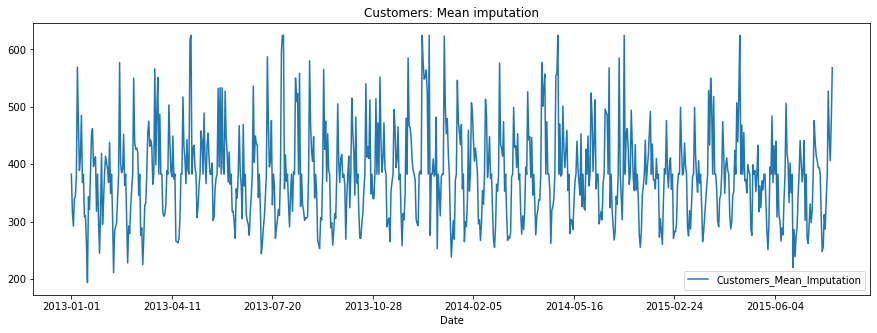

In [1138]:
# Do the same mean imputation for Customers variable
df_13.insert(5,'Customers_Mean_Imputation',df_13.Customers.fillna(df_13.Customers.mean()))
df_13[['Customers_Mean_Imputation']].plot(figsize=(15, 5))
plt.legend(loc='best')
plt.title('Customers: Mean imputation')
plt.show()

In [1139]:
df_13.drop(['Customers'],axis=1,inplace=True)
df_13.rename(columns={'Customers_Mean_Imputation':'Customers'},inplace=True)

## Train-Test Split:

In [1262]:
train=df_1[0:train_len]
test=df_1[train_len:]

In [1263]:
train.shape

(900, 13)

In [1264]:
test.shape

(42, 13)

In [1265]:
train.tail(2)

Store  DayOfWeek  is_weekend  Sales  Customers  Open StateHoliday  \
Date                                                                            
2015-06-18      1          4           0   4645        498     1            0   
2015-06-19      1          5           0   4202        487     1            0   

            SchoolHoliday StoreType Assortment  CompetitionDistance_KM  \
Date                                                                     
2015-06-18              0         c          a                 0.30103   
2015-06-19              0         c          a                 0.30103   

            Competition since years  Promo2  
Date                                         
2015-06-18                  1.11394       0  
2015-06-19                  1.11394       0

## Stationarity test:

In [1266]:
for i in ['Sales','Customers']:
    print('\n\n' + i + ': ADF test results:')
    result = adfuller(train[i].dropna())
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        if key=='5%':
            print('\t%s: %.3f' % (key, value))



Sales: ADF test results:
ADF Statistic: -5.355618
p-value: 0.000004
Critical Values:
	5%: -2.865


Customers: ADF test results:
ADF Statistic: -3.808792
p-value: 0.002819
Critical Values:
	5%: -2.865


In [1267]:
# since p-value for both variables is less than 0.05 they both are stationary.

## Modelling:

### SARIMAX:

In [1268]:
model = SARIMAX(train['Sales'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12),exog=train['Customers']) 
model_fit = model.fit()
print(model_fit.params)

Customers       10.19141
ar.L1            0.39403
ma.L1           -0.99999
ar.S.L12         0.07755
ma.S.L12        -0.99967
sigma2      81,710.79405
dtype: float64


In [1269]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Sales   No. Observations:                  900
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -6303.987
Date:                            Mon, 31 May 2021   AIC                          12619.975
Time:                                    22:44:12   BIC                          12648.702
Sample:                                01-01-2013   HQIC                         12630.956
                                     - 06-19-2015                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Customers     10.1914      0.127     80.366      0.000       9.943      10.440
ar.L1          0.3940      0.033     11.920      0.000       0.329       0.459
ma.L1         -1.0000      1.815     -0.551      0.582      -4.558       2.558
ar.S.L12       0.0775      0.037      2.070      0.038       0.004       0.151
ma.S.L12      -0.9997      1.404     -0.712      0.477      -3.752       1.753
sigma2      8.171e+04    1.7e+05      0.481      0.630   -2.51e+05    4.14e+05
===================================================================================
Ljung-Box (L1) (Q):                   2.30   Jarque-Bera (JB):                13.99
Prob(Q):                              0.13   Prob(JB):                         0.00
Heteroskedasticity (H):               0.88   Skew:                             0.03
Prob(H) (two-sided):                  0.29   Kurtosis:                         3.61
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [1270]:
pred = test.copy()
pred['Sales'] = model_fit.predict(test.index.min(), test.index.max(),exog=test['Customers'])

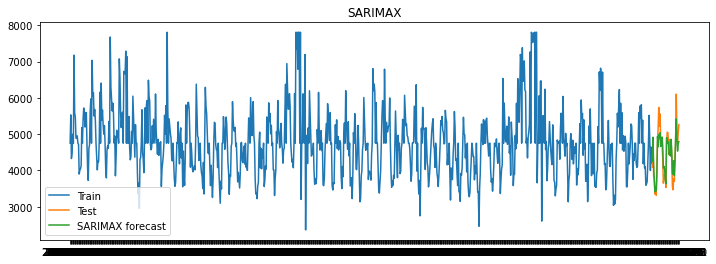

In [1271]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(pred['Sales'][test.index.min():], label='SARIMAX forecast')
plt.legend(loc='best')
plt.title('SARIMAX')
plt.show()

In [1272]:
rmse = np.sqrt(mean_squared_error(test['Sales'], pred['Sales'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-pred['Sales'])/test['Sales'])*100,2)
results = pd.DataFrame({'Method':['SARIMAX'], 'MAPE': [mape], 'RMSE': [rmse]})
results = results[['Method', 'RMSE', 'MAPE']]
results

Method      RMSE    MAPE
0  SARIMAX 297.14000 5.13000

### VARMAX 1:

In [1273]:
train['Sales']=train['Sales'].astype('float64')
train['Customers']=train['Customers'].astype('float64')

In [1274]:
exog = train['DayOfWeek']
mod = sm.tsa.VARMAX(train[['Sales', 'Customers']], order=(1,1), trend='n', exog=exog)
res = mod.fit(maxiter=1000, disp=False)
print(res.summary())

                             Statespace Model Results                             
Dep. Variable:     ['Sales', 'Customers']   No. Observations:                  900
Model:                        VARMAX(1,1)   Log Likelihood              -12134.543
Date:                    Mon, 31 May 2021   AIC                          24295.086
Time:                            22:46:29   BIC                          24357.517
Sample:                        01-01-2013   HQIC                         24318.935
                             - 06-19-2015                                         
Covariance Type:                      opg                                         
Ljung-Box (L1) (Q):             0.35, 3.17   Jarque-Bera (JB):        59.69, 156.37
Prob(Q):                        0.55, 0.07   Prob(JB):                   0.00, 0.00
Heteroskedasticity (H):         1.10, 0.92   Skew:                       0.59, 0.24
Prob(H) (two-sided):            0.41, 0.45   Kurtosis:                   3.42, 4.99


In [1275]:
pred_var = test.copy()
pred_var['Sales'] = res.predict(test.index.min(), test.index.max(),exog=test['DayOfWeek'])

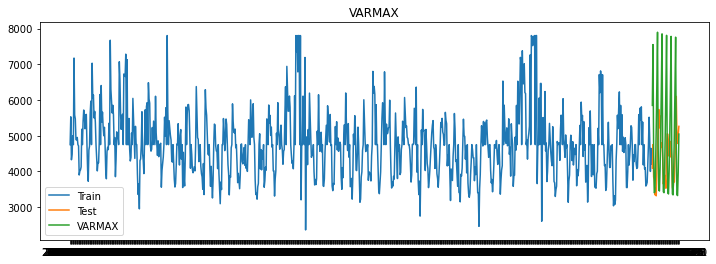

In [1276]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(pred_var['Sales'][test.index.min():], label='VARMAX')
plt.legend(loc='best')
plt.title('VARMAX')
plt.show()

In [1277]:
rmse = np.sqrt(mean_squared_error(test['Sales'], pred_var['Sales'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-pred_var['Sales'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['VARMAX'],'MAPE': [mape],'RMSE': [rmse]})
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

Method        RMSE     MAPE
0  SARIMAX   297.14000  5.13000
0   VARMAX 1,660.05000 29.30000

## VARMAX 2:

In [1278]:
exog = train['Open']
mod = sm.tsa.VARMAX(train[['Sales', 'Customers']], order=(1,1), trend='n', exog=exog)
res = mod.fit(maxiter=1000, disp=False)
print(res.summary())

                             Statespace Model Results                             
Dep. Variable:     ['Sales', 'Customers']   No. Observations:                  900
Model:                        VARMAX(1,1)   Log Likelihood              -12114.724
Date:                    Mon, 31 May 2021   AIC                          24255.448
Time:                            22:47:55   BIC                          24317.879
Sample:                        01-01-2013   HQIC                         24279.297
                             - 06-19-2015                                         
Covariance Type:                      opg                                         
Ljung-Box (L1) (Q):            0.18, 14.55   Jarque-Bera (JB):       175.99, 185.90
Prob(Q):                        0.67, 0.00   Prob(JB):                   0.00, 0.00
Heteroskedasticity (H):         1.10, 1.00   Skew:                       1.03, 0.34
Prob(H) (two-sided):            0.39, 0.99   Kurtosis:                   3.68, 5.12


In [1279]:
pred_var = test.copy()
pred_var['Sales'] = res.predict(test.index.min(), test.index.max(),exog=test['Open'])

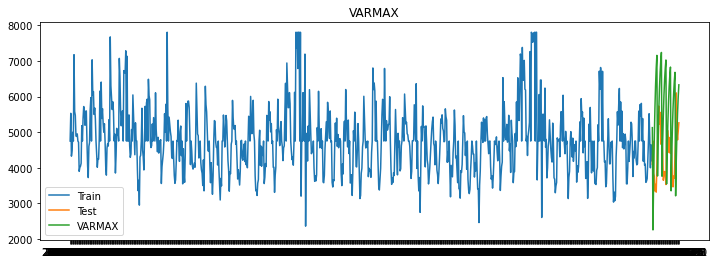

In [1280]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(pred_var['Sales'][test.index.min():], label='VARMAX')
plt.legend(loc='best')
plt.title('VARMAX')
plt.show()

In [1281]:
rmse = np.sqrt(mean_squared_error(test['Sales'], pred_var['Sales'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-pred_var['Sales'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['VARMAX2'],'MAPE': [mape],'RMSE': [rmse]})
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

Method        RMSE     MAPE
0  SARIMAX   297.14000  5.13000
0   VARMAX 1,660.05000 29.30000
0  VARMAX2 1,872.32000 38.97000

## VARMAX 3:

In [1282]:
exog = train['Customers']
mod = sm.tsa.VARMAX(train[['Sales', 'Competition since years']], order=(1,1), trend='n', exog=exog)
res = mod.fit(maxiter=1000, disp=False)
print(res.summary())

                                    Statespace Model Results                                    
Dep. Variable:     ['Sales', 'Competition since years']   No. Observations:                  900
Model:                                      VARMAX(1,1)   Log Likelihood               -6136.690
Date:                                  Mon, 31 May 2021   AIC                          12299.380
Time:                                          22:48:13   BIC                          12361.811
Sample:                                      01-01-2013   HQIC                         12323.229
                                           - 06-19-2015                                         
Covariance Type:                                    opg                                         
Ljung-Box (L1) (Q):          36.92, 364.87   Jarque-Bera (JB):       179.83, 190.08
Prob(Q):                        0.00, 0.00   Prob(JB):                   0.00, 0.00
Heteroskedasticity (H):         1.17, 1.06   Skew:      

In [1283]:
pred_var = test.copy()
pred_var['Sales'] = res.predict(test.index.min(), test.index.max(),exog=test['Customers'])

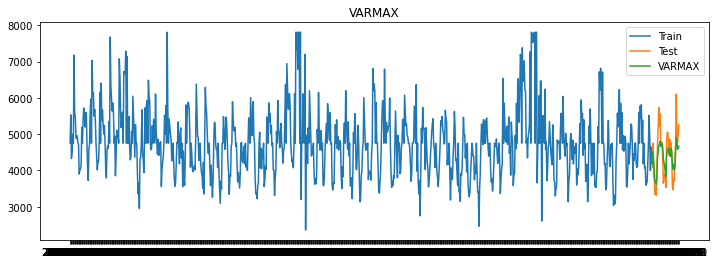

In [1284]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(pred_var['Sales'][test.index.min():], label='VARMAX')
plt.legend(loc='best')
plt.title('VARMAX')
plt.show()

In [1285]:
rmse = np.sqrt(mean_squared_error(test['Sales'], pred_var['Sales'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-pred_var['Sales'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['VARMAX3'],'MAPE': [mape],'RMSE': [rmse]})
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

Method        RMSE     MAPE
0  SARIMAX   297.14000  5.13000
0   VARMAX 1,660.05000 29.30000
0  VARMAX2 1,872.32000 38.97000
0  VARMAX3   437.55000  7.87000

## VARMAX 4:

In [1287]:
exog = train['Customers']
mod = sm.tsa.VARMAX(train[['Sales', 'Competition since years']], order=(6,6), trend='n', exog=exog)
res = mod.fit(maxiter=1000, disp=False)
print(res.summary())

                                    Statespace Model Results                                    
Dep. Variable:     ['Sales', 'Competition since years']   No. Observations:                  900
Model:                                      VARMAX(6,6)   Log Likelihood               -6266.546
Date:                                  Mon, 31 May 2021   AIC                          12639.092
Time:                                          22:50:01   BIC                          12893.619
Sample:                                      01-01-2013   HQIC                         12736.323
                                           - 06-19-2015                                         
Covariance Type:                                    opg                                         
Ljung-Box (L1) (Q):           6.97, 358.84   Jarque-Bera (JB):          90.53, 3.03
Prob(Q):                        0.01, 0.00   Prob(JB):                   0.00, 0.22
Heteroskedasticity (H):         1.15, 1.07   Skew:      

In [1288]:
pred_var = test.copy()
pred_var['Sales'] = res.predict(test.index.min(), test.index.max(),exog=test['Customers'])

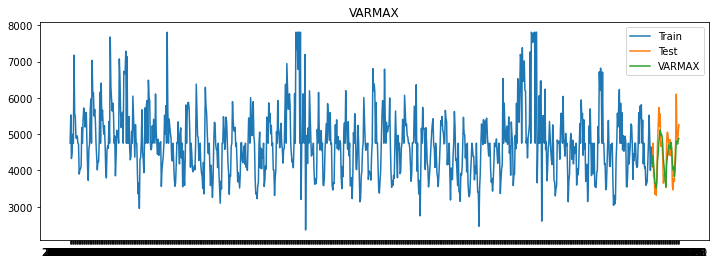

In [1289]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(pred_var['Sales'][test.index.min():], label='VARMAX')
plt.legend(loc='best')
plt.title('VARMAX')
plt.show()

In [1290]:
rmse = np.sqrt(mean_squared_error(test['Sales'], pred_var['Sales'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-pred_var['Sales'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['VARMAX4'],'MAPE': [mape],'RMSE': [rmse]})
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

Method        RMSE     MAPE
0  SARIMAX   297.14000  5.13000
0   VARMAX 1,660.05000 29.30000
0  VARMAX2 1,872.32000 38.97000
0  VARMAX3   437.55000  7.87000
0  VARMAX4   430.13000  7.47000

In [ ]:
# After comparing all the five models SARIMAX  is the best model to forecast sales for Store 13. 

# Store 25:

In [1184]:
df_25=df[df['Store']==25]
df_25.head()

Store  DayOfWeek  is_weekend  Sales  Customers  Open StateHoliday  \
Date                                                                            
2013-01-01     25          2           0      0          0     0            a   
2013-01-02     25          3           0  11944       1698     1            0   
2013-01-03     25          4           0  10409       1587     1            0   
2013-01-04     25          5           0   9729       1520     1            0   
2013-01-05     25          6           1   8987       1381     1            0   

            SchoolHoliday StoreType Assortment  CompetitionDistance_KM  \
Date                                                                     
2013-01-01              1         c          a                 0.00000   
2013-01-02              1         c          a                 0.00000   
2013-01-03              1         c          a                 0.00000   
2013-01-04              1         c          a                 0.00000   
2013-01-05              0         c          a                 0.00000   

            Competition since years  Promo2  
Date                                         
2013-01-01                  1.25527       0  
2013-01-02                  1.25527       0  
2013-01-03                  1.25527       0  
2013-01-04                  1.25527       0  
2013-01-05                  1.25527       0

In [1185]:
df_25.shape

(942, 13)

## Outlier Analysis:

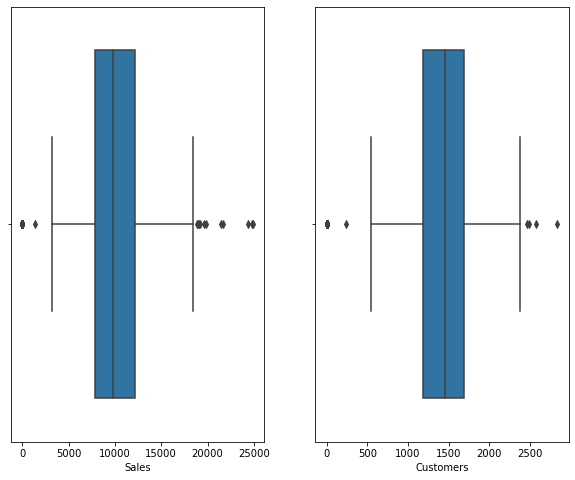

In [1186]:
#Here we perform outlier analysis for sales and customers variables.
plt.figure(figsize=[10,8])
plt.subplot(1,2,1)
ax=sns.boxplot(df_25['Sales'])
plt.subplot(1,2,2)
ax=sns.boxplot(df_25['Customers'])

In [1187]:
# We need to cap the outliers to their 99 percentile value.
df_25['Sales']=df_25['Sales'].clip(lower=df_25['Sales'].min(),upper=df_25['Sales'].quantile(0.99))
df_25['Customers']=df_25['Customers'].clip(lower=df_25['Customers'].min(),upper=df_25['Customers'].quantile(0.99))

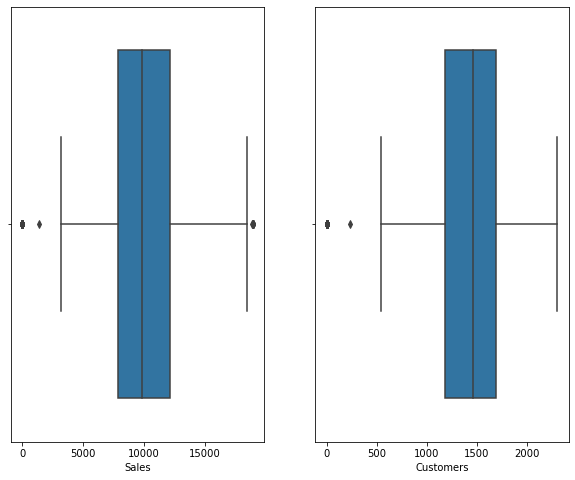

In [1188]:
plt.figure(figsize=[10,8])
plt.subplot(1,2,1)
ax=sns.boxplot(df_25['Sales'])
plt.subplot(1,2,2)
ax=sns.boxplot(df_25['Customers'])

In [ ]:
# We can see that outliers are minimized.

## Handling Null values:

In [1189]:
# If Sales/Customers value ==0 consider them as null.
df_25['Sales']=df_25['Sales'].apply(lambda x:np.nan if x==0 else x)
df_25['Customers']=df_25['Customers'].apply(lambda x:np.nan if x==0 else x)

In [1190]:
df_25[['Sales','Customers']].isnull().sum()

Sales        192
Customers    192
dtype: int64

## Mean imputation:

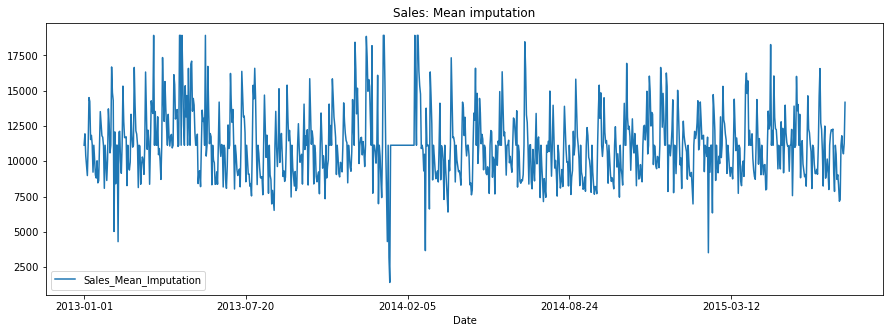

In [1191]:
df_25.insert(4,'Sales_Mean_Imputation',df_25.Sales.fillna(df_25.Sales.mean()))
df_25[['Sales_Mean_Imputation']].plot(figsize=(15, 5))
plt.legend(loc='best')
plt.title('Sales: Mean imputation')
plt.show()

In [1192]:
df_25.drop(['Sales'],axis=1,inplace=True)
df_25.rename(columns={'Sales_Mean_Imputation':'Sales'},inplace=True)

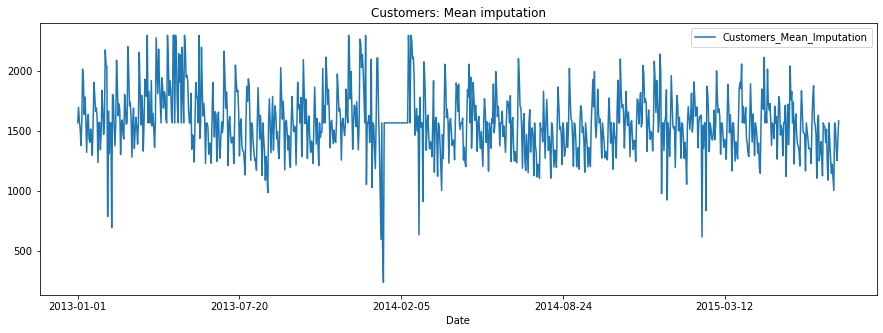

In [1193]:
# Do the same mean imputation for Customers variable
df_25.insert(5,'Customers_Mean_Imputation',df_25.Customers.fillna(df_25.Customers.mean()))
df_25[['Customers_Mean_Imputation']].plot(figsize=(15, 5))
plt.legend(loc='best')
plt.title('Customers: Mean imputation')
plt.show()

In [1194]:
df_25.drop(['Customers'],axis=1,inplace=True)
df_25.rename(columns={'Customers_Mean_Imputation':'Customers'},inplace=True)

## Train-Test Split:

In [1195]:
train_len=900

In [1228]:
train=df_25[0:train_len]
test=df_25[train_len:]

In [1229]:
train.shape

(900, 13)

In [1230]:
test.shape

(42, 13)

## Stationarity test (ADF):

In [1231]:
for i in ['Sales','Customers']:
    print('\n\n' + i + ': ADF test results:')
    result = adfuller(train[i].dropna())
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        if key=='5%':
            print('\t%s: %.3f' % (key, value))



Sales: ADF test results:
ADF Statistic: -5.145776
p-value: 0.000011
Critical Values:
	5%: -2.865


Customers: ADF test results:
ADF Statistic: -4.289301
p-value: 0.000464
Critical Values:
	5%: -2.865


In [1232]:
# since p-value for both variables is less than 0.05 they both are stationary.

## Model Building:

## SARIMAX:

In [1233]:
model = SARIMAX(train['Sales'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12),exog=train['Customers']) 
model_fit = model.fit()
print(model_fit.params)

Customers         8.62550
ar.L1             0.45315
ma.L1            -1.00000
ar.S.L12          0.02232
ma.S.L12         -0.99926
sigma2      344,122.96995
dtype: float64


In [1234]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Sales   No. Observations:                  900
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -6941.710
Date:                            Mon, 31 May 2021   AIC                          13895.420
Time:                                    22:35:59   BIC                          13924.147
Sample:                                01-01-2013   HQIC                         13906.401
                                     - 06-19-2015                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Customers      8.6255      0.060    143.178      0.000       8.507       8.744
ar.L1          0.4532      0.025     18.453      0.000       0.405       0.501
ma.L1         -1.0000      0.455     -2.199      0.028      -1.891      -0.109
ar.S.L12       0.0223      0.038      0.581      0.561      -0.053       0.098
ma.S.L12      -0.9993      0.461     -2.167      0.030      -1.903      -0.096
sigma2      3.441e+05    1.3e-06   2.64e+11      0.000    3.44e+05    3.44e+05
===================================================================================
Ljung-Box (L1) (Q):                   1.42   Jarque-Bera (JB):               245.50
Prob(Q):                              0.23   Prob(JB):                         0.00
Heteroskedasticity (H):               1.08   Skew:                             0.61
Prob(H) (two-sided):                  0.52   Kurtosis:                         5.27
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.69e+27. Standard errors may be unstable.
"""

In [1235]:
pred = test.copy()
pred['Sales'] = model_fit.predict(test.index.min(), test.index.max(),exog=test['Customers'])

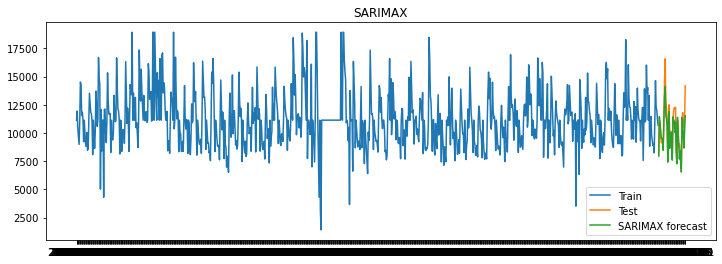

In [1236]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(pred['Sales'][test.index.min():], label='SARIMAX forecast')
plt.legend(loc='best')
plt.title('SARIMAX')
plt.show()

In [1237]:
rmse = np.sqrt(mean_squared_error(test['Sales'], pred['Sales'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-pred['Sales'])/test['Sales'])*100,2)
results = pd.DataFrame({'Method':['SARIMAX'], 'MAPE': [mape], 'RMSE': [rmse]})
results = results[['Method', 'RMSE', 'MAPE']]
results

Method      RMSE    MAPE
0  SARIMAX 963.38000 6.41000

## VARMAX 1:

In [1238]:
train['Sales']=train['Sales'].astype('float64')
train['Customers']=train['Customers'].astype('float64')

In [1239]:
exog = train['DayOfWeek']
mod = sm.tsa.VARMAX(train[['Sales', 'Customers']], order=(1,1), trend='n', exog=exog)
res = mod.fit(maxiter=1000, disp=False)
print(res.summary())

                             Statespace Model Results                             
Dep. Variable:     ['Sales', 'Customers']   No. Observations:                  900
Model:                        VARMAX(1,1)   Log Likelihood              -14068.281
Date:                    Mon, 31 May 2021   AIC                          28162.563
Time:                            22:36:26   BIC                          28224.994
Sample:                        01-01-2013   HQIC                         28186.412
                             - 06-19-2015                                         
Covariance Type:                      opg                                         
Ljung-Box (L1) (Q):             1.54, 0.01   Jarque-Bera (JB):       175.01, 631.11
Prob(Q):                        0.21, 0.92   Prob(JB):                   0.00, 0.00
Heteroskedasticity (H):         0.84, 0.99   Skew:                      0.93, -1.00
Prob(H) (two-sided):            0.14, 0.90   Kurtosis:                   4.11, 6.58


In [1240]:
pred_var = test.copy()
pred_var['Sales'] = res.predict(test.index.min(), test.index.max(),exog=test['DayOfWeek'])

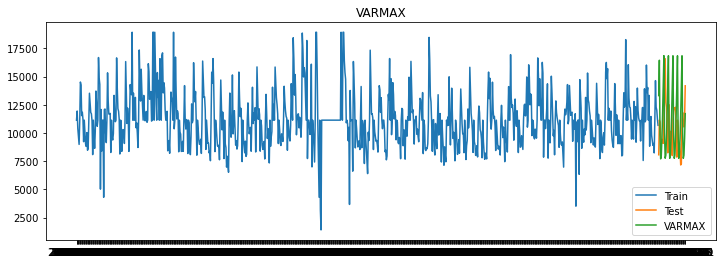

In [1241]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(pred_var['Sales'][test.index.min():], label='VARMAX')
plt.legend(loc='best')
plt.title('VARMAX')
plt.show()

In [1242]:
rmse = np.sqrt(mean_squared_error(test['Sales'], pred_var['Sales'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-pred_var['Sales'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['VARMAX'],'MAPE': [mape],'RMSE': [rmse]})
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

Method        RMSE     MAPE
0  SARIMAX   963.38000  6.41000
0   VARMAX 4,000.96000 33.33000

## VARMAX 2:

In [1243]:
exog = train['Open']
mod = sm.tsa.VARMAX(train[['Sales', 'Customers']], order=(1,1), trend='n', exog=exog)
res = mod.fit(maxiter=1000, disp=False)
print(res.summary())

                             Statespace Model Results                             
Dep. Variable:     ['Sales', 'Customers']   No. Observations:                  900
Model:                        VARMAX(1,1)   Log Likelihood              -13977.123
Date:                    Mon, 31 May 2021   AIC                          27980.247
Time:                            22:38:04   BIC                          28042.678
Sample:                        01-01-2013   HQIC                         28004.096
                             - 06-19-2015                                         
Covariance Type:                      opg                                         
Ljung-Box (L1) (Q):          23.80, 104.91   Jarque-Bera (JB):        93.76, 251.12
Prob(Q):                        0.00, 0.00   Prob(JB):                   0.00, 0.00
Heteroskedasticity (H):         0.93, 0.90   Skew:                      0.70, -0.60
Prob(H) (two-sided):            0.54, 0.35   Kurtosis:                   2.26, 5.29


In [1244]:
pred_var = test.copy()
pred_var['Sales'] = res.predict(test.index.min(), test.index.max(),exog=test['Open'])

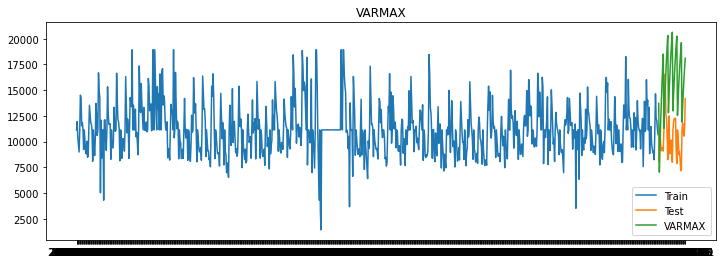

In [1245]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(pred_var['Sales'][test.index.min():], label='VARMAX')
plt.legend(loc='best')
plt.title('VARMAX')
plt.show()

In [1246]:
rmse = np.sqrt(mean_squared_error(test['Sales'], pred_var['Sales'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-pred_var['Sales'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['VARMAX2'],'MAPE': [mape],'RMSE': [rmse]})
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

Method        RMSE     MAPE
0  SARIMAX   963.38000  6.41000
0   VARMAX 4,000.96000 33.33000
0  VARMAX2 6,812.76000 62.00000

## VARMAX 3:

In [1247]:
exog = train['Customers']
mod = sm.tsa.VARMAX(train[['Sales', 'Competition since years']], order=(1,1), trend='n', exog=exog)
res = mod.fit(maxiter=1000, disp=False)
print(res.summary())

                                    Statespace Model Results                                    
Dep. Variable:     ['Sales', 'Competition since years']   No. Observations:                  900
Model:                                      VARMAX(1,1)   Log Likelihood               -8690.356
Date:                                  Mon, 31 May 2021   AIC                          17406.712
Time:                                          22:38:23   BIC                          17469.144
Sample:                                      01-01-2013   HQIC                         17430.562
                                           - 06-19-2015                                         
Covariance Type:                                    opg                                         
Ljung-Box (L1) (Q):          39.15, 133.58   Jarque-Bera (JB):        248.52, 59.66
Prob(Q):                        0.00, 0.00   Prob(JB):                   0.00, 0.00
Heteroskedasticity (H):         0.75, 0.70   Skew:      

In [1248]:
pred_var = test.copy()
pred_var['Sales'] = res.predict(test.index.min(), test.index.max(),exog=test['Customers'])

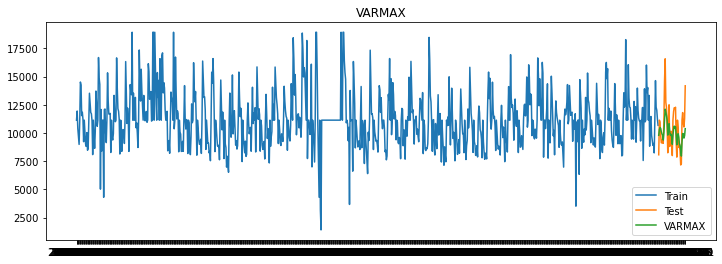

In [1249]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(pred_var['Sales'][test.index.min():], label='VARMAX')
plt.legend(loc='best')
plt.title('VARMAX')
plt.show()

In [1250]:
rmse = np.sqrt(mean_squared_error(test['Sales'], pred_var['Sales'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-pred_var['Sales'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['VARMAX3'],'MAPE': [mape],'RMSE': [rmse]})
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

Method        RMSE     MAPE
0  SARIMAX   963.38000  6.41000
0   VARMAX 4,000.96000 33.33000
0  VARMAX2 6,812.76000 62.00000
0  VARMAX3 1,511.04000 11.07000

## VARMAX 4:

In [1254]:
exog = train['Customers']
mod = sm.tsa.VARMAX(train[['Sales', 'Competition since years']], order=(6,6), trend='n', exog=exog)
res = mod.fit(maxiter=1000, disp=False)
print(res.summary())

                                    Statespace Model Results                                    
Dep. Variable:     ['Sales', 'Competition since years']   No. Observations:                  900
Model:                                      VARMAX(6,6)   Log Likelihood               -9063.920
Date:                                  Mon, 31 May 2021   AIC                          18233.839
Time:                                          22:42:14   BIC                          18488.366
Sample:                                      01-01-2013   HQIC                         18331.071
                                           - 06-19-2015                                         
Covariance Type:                                    opg                                         
Ljung-Box (L1) (Q):           14.63, 76.13   Jarque-Bera (JB):       184.70, 111.27
Prob(Q):                        0.00, 0.00   Prob(JB):                   0.00, 0.00
Heteroskedasticity (H):         0.73, 0.79   Skew:      

In [1255]:
pred_var = test.copy()
pred_var['Sales'] = res.predict(test.index.min(), test.index.max(),exog=test['Customers'])

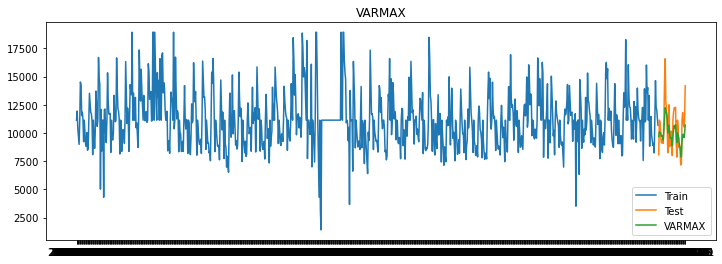

In [1256]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(pred_var['Sales'][test.index.min():], label='VARMAX')
plt.legend(loc='best')
plt.title('VARMAX')
plt.show()

In [1257]:
rmse = np.sqrt(mean_squared_error(test['Sales'], pred_var['Sales'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-pred_var['Sales'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['VARMAX4'],'MAPE': [mape],'RMSE': [rmse]})
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

Method        RMSE     MAPE
0  SARIMAX   963.38000  6.41000
0   VARMAX 4,000.96000 33.33000
0  VARMAX2 6,812.76000 62.00000
0  VARMAX3 1,511.04000 11.07000
0  VARMAX4 1,458.56000 10.61000

In [ ]:
# After comparing all the five models SARIMAX is the best model to forecast sales for Store 25. 

# Store 29:

In [1252]:
df_29=df[df['Store']==29]
df_29.head()

Store  DayOfWeek  is_weekend  Sales  Customers  Open StateHoliday  \
Date                                                                            
2013-01-01     29          2           0      0          0     0            a   
2013-01-02     29          3           0   5269        550     1            0   
2013-01-03     29          4           0   4554        456     1            0   
2013-01-04     29          5           0   5411        505     1            0   
2013-01-05     29          6           1   5564        537     1            0   

            SchoolHoliday StoreType Assortment  CompetitionDistance_KM  \
Date                                                                     
2013-01-01              1         d          c                 0.47712   
2013-01-02              1         d          c                 0.47712   
2013-01-03              1         d          c                 0.47712   
2013-01-04              1         d          c                 0.47712   
2013-01-05              0         d          c                 0.47712   

            Competition since years  Promo2  
Date                                         
2013-01-01                  0.90309       0  
2013-01-02                  0.90309       0  
2013-01-03                  0.90309       0  
2013-01-04                  0.90309       0  
2013-01-05                  0.90309       0

In [1253]:
df_29.shape

(942, 13)

## Outlier detection:

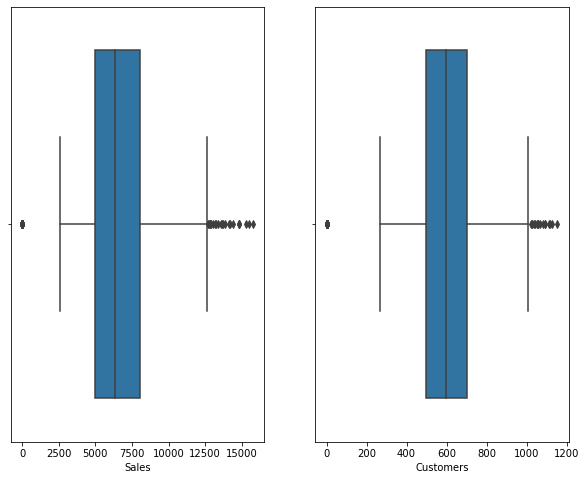

In [1259]:
#Here we perform outlier analysis for sales and customers variables.
plt.figure(figsize=[10,8])
plt.subplot(1,2,1)
ax=sns.boxplot(df_29['Sales'])
plt.subplot(1,2,2)
ax=sns.boxplot(df_29['Customers'])

In [1260]:
# We need to cap the outliers to their 99 percentile value.
df_29['Sales']=df_29['Sales'].clip(lower=df_29['Sales'].min(),upper=df_29['Sales'].quantile(0.99))
df_29['Customers']=df_29['Customers'].clip(lower=df_29['Customers'].min(),upper=df_29['Customers'].quantile(0.99))

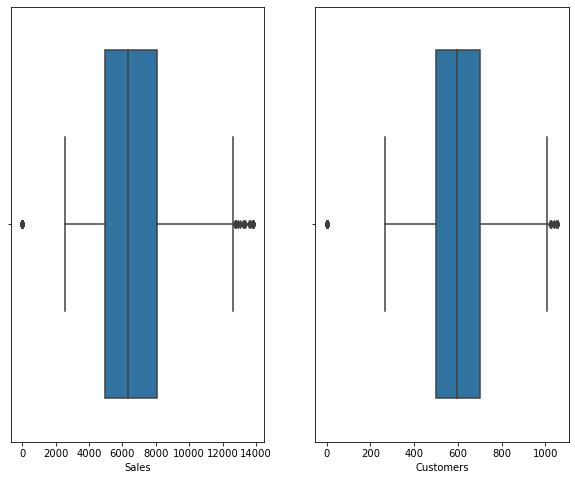

In [1261]:
#Here we perform outlier analysis for sales and customers variables.
plt.figure(figsize=[10,8])
plt.subplot(1,2,1)
ax=sns.boxplot(df_29['Sales'])
plt.subplot(1,2,2)
ax=sns.boxplot(df_29['Customers'])

## Null Values Handling:

In [1291]:
# If Sales/Customers value ==0 consider them as null.
df_29['Sales']=df_29['Sales'].apply(lambda x:np.nan if x==0 else x)
df_29['Customers']=df_29['Customers'].apply(lambda x:np.nan if x==0 else x)

In [1292]:
df_29[['Sales','Customers']].isnull().sum()

Sales        163
Customers    163
dtype: int64

## Mean imputation:

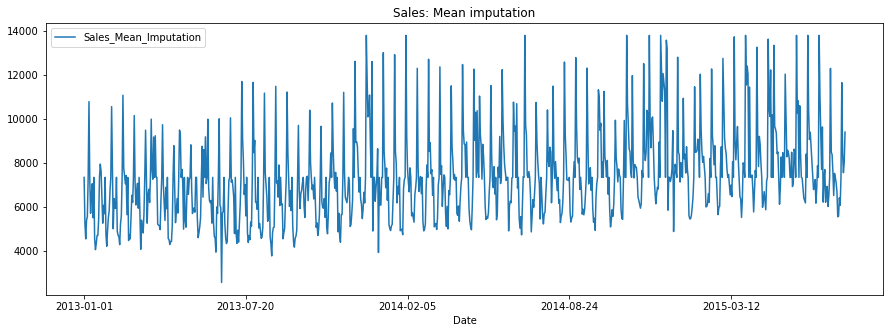

In [1293]:
df_29.insert(4,'Sales_Mean_Imputation',df_29.Sales.fillna(df_29.Sales.mean()))
df_29[['Sales_Mean_Imputation']].plot(figsize=(15, 5))
plt.legend(loc='best')
plt.title('Sales: Mean imputation')
plt.show()

In [1294]:
df_29.drop(['Sales'],axis=1,inplace=True)
df_29.rename(columns={'Sales_Mean_Imputation':'Sales'},inplace=True)

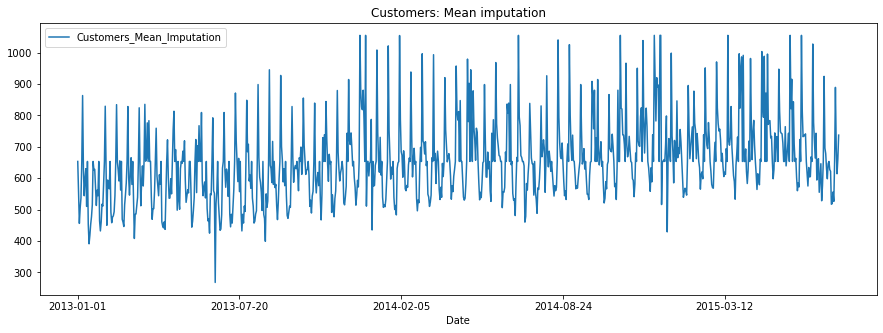

In [1295]:
# Do the same mean imputation for Customers variable
df_29.insert(5,'Customers_Mean_Imputation',df_29.Customers.fillna(df_29.Customers.mean()))
df_29[['Customers_Mean_Imputation']].plot(figsize=(15, 5))
plt.legend(loc='best')
plt.title('Customers: Mean imputation')
plt.show()

In [1296]:
df_29.drop(['Customers'],axis=1,inplace=True)
df_29.rename(columns={'Customers_Mean_Imputation':'Customers'},inplace=True)

## Train-Test Split:

In [1297]:
train=df_29[0:train_len]
test=df_29[train_len:]

In [1298]:
train.shape

(900, 13)

In [1299]:
test.shape

(42, 13)

## Stationary test (ADF):

In [1300]:
for i in ['Sales','Customers']:
    print('\n\n' + i + ': ADF test results:')
    result = adfuller(train[i].dropna())
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        if key=='5%':
            print('\t%s: %.3f' % (key, value))



Sales: ADF test results:
ADF Statistic: -3.118870
p-value: 0.025188
Critical Values:
	5%: -2.865


Customers: ADF test results:
ADF Statistic: -3.014891
p-value: 0.033527
Critical Values:
	5%: -2.865


In [1301]:
# since p-value for both variables is less than 0.05 they both are stationary.

## Model Building:

## SARIMAX:

In [1308]:
model = SARIMAX(train['Sales'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12),exog=train['is_weekend']) 
model_fit = model.fit()
print(model_fit.params)

is_weekend        -922.22440
ar.L1                0.49543
ma.L1               -1.00000
ar.S.L12             0.05799
ma.S.L12            -0.99765
sigma2       2,669,950.46270
dtype: float64


In [1309]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Sales   No. Observations:                  900
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -7850.203
Date:                            Mon, 31 May 2021   AIC                          15712.406
Time:                                    22:51:23   BIC                          15741.133
Sample:                                01-01-2013   HQIC                         15723.388
                                     - 06-19-2015                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
is_weekend  -922.2244    135.353     -6.813      0.000   -1187.511    -656.937
ar.L1          0.4954      0.033     14.834      0.000       0.430       0.561
ma.L1         -1.0000      0.194     -5.160      0.000      -1.380      -0.620
ar.S.L12       0.0580      0.044      1.310      0.190      -0.029       0.145
ma.S.L12      -0.9976      0.195     -5.126      0.000      -1.379      -0.616
sigma2       2.67e+06   2.18e-07   1.22e+13      0.000    2.67e+06    2.67e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.50   Jarque-Bera (JB):               288.53
Prob(Q):                              0.48   Prob(JB):                         0.00
Heteroskedasticity (H):               1.45   Skew:                             1.02
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.90
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.84e+34. Standard errors may be unstable.
"""

In [1311]:
pred = test.copy()
pred['Sales'] = model_fit.predict(test.index.min(), test.index.max(),exog=test['is_weekend'])

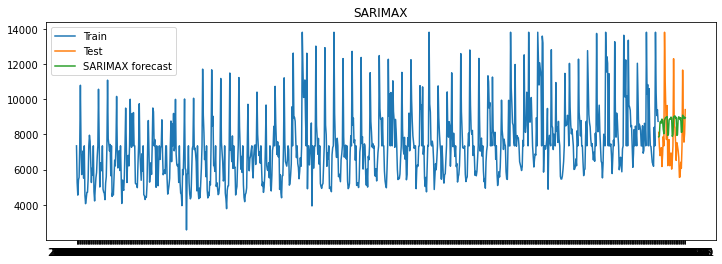

In [1312]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(pred['Sales'][test.index.min():], label='SARIMAX forecast')
plt.legend(loc='best')
plt.title('SARIMAX')
plt.show()

In [1313]:
rmse = np.sqrt(mean_squared_error(test['Sales'], pred['Sales'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-pred['Sales'])/test['Sales'])*100,2)
results = pd.DataFrame({'Method':['SARIMAX'], 'MAPE': [mape], 'RMSE': [rmse]})
results = results[['Method', 'RMSE', 'MAPE']]
results

Method        RMSE     MAPE
0  SARIMAX 1,921.95000 21.92000

## VARMAX 1:

In [1314]:
train['Sales']=train['Sales'].astype('float64')
train['Customers']=train['Customers'].astype('float64')

In [1315]:
exog = train['DayOfWeek']
mod = sm.tsa.VARMAX(train[['Sales', 'Customers']], order=(1,1), trend='n', exog=exog)
res = mod.fit(maxiter=1000, disp=False)
print(res.summary())

                             Statespace Model Results                             
Dep. Variable:     ['Sales', 'Customers']   No. Observations:                  900
Model:                        VARMAX(1,1)   Log Likelihood              -12693.430
Date:                    Mon, 31 May 2021   AIC                          25412.860
Time:                            22:54:11   BIC                          25475.291
Sample:                        01-01-2013   HQIC                         25436.709
                             - 06-19-2015                                         
Covariance Type:                      opg                                         
Ljung-Box (L1) (Q):           27.77, 23.30   Jarque-Bera (JB):         11.31, 32.99
Prob(Q):                        0.00, 0.00   Prob(JB):                   0.00, 0.00
Heteroskedasticity (H):         1.60, 1.71   Skew:                      0.27, -0.15
Prob(H) (two-sided):            0.00, 0.00   Kurtosis:                   3.07, 3.89


In [1316]:
pred_var = test.copy()
pred_var['Sales'] = res.predict(test.index.min(), test.index.max(),exog=test['DayOfWeek'])

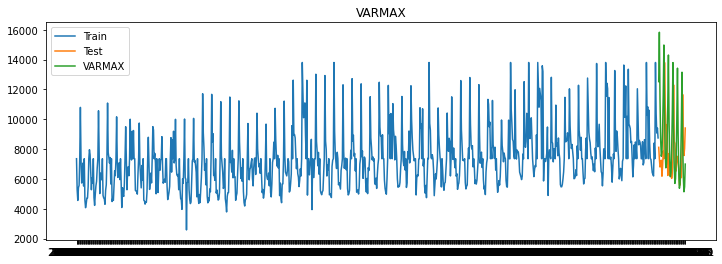

In [1317]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(pred_var['Sales'][test.index.min():], label='VARMAX')
plt.legend(loc='best')
plt.title('VARMAX')
plt.show()

In [1318]:
rmse = np.sqrt(mean_squared_error(test['Sales'], pred_var['Sales'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-pred_var['Sales'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['VARMAX'],'MAPE': [mape],'RMSE': [rmse]})
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

Method        RMSE     MAPE
0  SARIMAX 1,921.95000 21.92000
0   VARMAX 3,490.67000 36.84000

## VARMAX 2:

In [1319]:
exog = train['Open']
mod = sm.tsa.VARMAX(train[['Sales', 'Customers']], order=(1,1), trend='n', exog=exog)
res = mod.fit(maxiter=1000, disp=False)
print(res.summary())

                             Statespace Model Results                             
Dep. Variable:     ['Sales', 'Customers']   No. Observations:                  900
Model:                        VARMAX(1,1)   Log Likelihood              -12599.840
Date:                    Mon, 31 May 2021   AIC                          25225.680
Time:                            22:55:27   BIC                          25288.111
Sample:                        01-01-2013   HQIC                         25249.529
                             - 06-19-2015                                         
Covariance Type:                      opg                                         
Ljung-Box (L1) (Q):            0.26, 10.94   Jarque-Bera (JB):         58.94, 13.65
Prob(Q):                        0.61, 0.00   Prob(JB):                   0.00, 0.00
Heteroskedasticity (H):         0.86, 1.60   Skew:                      0.60, -0.02
Prob(H) (two-sided):            0.20, 0.00   Kurtosis:                   2.66, 3.60


In [1320]:
pred_var = test.copy()
pred_var['Sales'] = res.predict(test.index.min(), test.index.max(),exog=test['Open'])

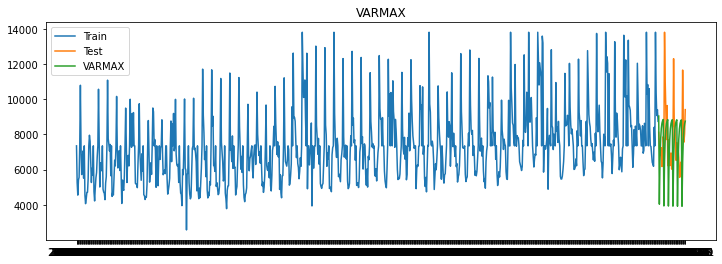

In [1321]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(pred_var['Sales'][test.index.min():], label='VARMAX')
plt.legend(loc='best')
plt.title('VARMAX')
plt.show()

In [1322]:
rmse = np.sqrt(mean_squared_error(test['Sales'], pred_var['Sales'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-pred_var['Sales'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['VARMAX2'],'MAPE': [mape],'RMSE': [rmse]})
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

Method        RMSE     MAPE
0  SARIMAX 1,921.95000 21.92000
0   VARMAX 3,490.67000 36.84000
0  VARMAX2 2,591.52000 27.02000

### VARMAX 3:

In [1323]:
exog = train['Customers']
mod = sm.tsa.VARMAX(train[['Sales', 'Competition since years']], order=(1,1), trend='n', exog=exog)
res = mod.fit(maxiter=1000, disp=False)
print(res.summary())

                                    Statespace Model Results                                    
Dep. Variable:     ['Sales', 'Competition since years']   No. Observations:                  900
Model:                                      VARMAX(1,1)   Log Likelihood               -6945.144
Date:                                  Mon, 31 May 2021   AIC                          13916.288
Time:                                          22:55:49   BIC                          13978.719
Sample:                                      01-01-2013   HQIC                         13940.137
                                           - 06-19-2015                                         
Covariance Type:                                    opg                                         
Ljung-Box (L1) (Q):          40.55, 166.68   Jarque-Bera (JB):        671.42, 38.04
Prob(Q):                        0.00, 0.00   Prob(JB):                   0.00, 0.00
Heteroskedasticity (H):         1.80, 0.99   Skew:      

In [1324]:
pred_var = test.copy()
pred_var['Sales'] = res.predict(test.index.min(), test.index.max(),exog=test['Customers'])

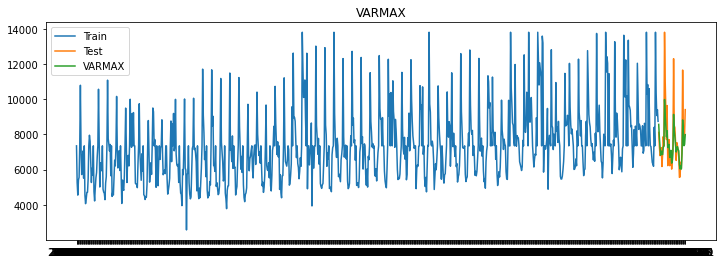

In [1325]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(pred_var['Sales'][test.index.min():], label='VARMAX')
plt.legend(loc='best')
plt.title('VARMAX')
plt.show()

In [1326]:
rmse = np.sqrt(mean_squared_error(test['Sales'], pred_var['Sales'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-pred_var['Sales'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['VARMAX3'],'MAPE': [mape],'RMSE': [rmse]})
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

Method        RMSE     MAPE
0  SARIMAX 1,921.95000 21.92000
0   VARMAX 3,490.67000 36.84000
0  VARMAX2 2,591.52000 27.02000
0  VARMAX3 1,057.18000  7.10000

## VARMAX 4:

In [1331]:
exog = train['Customers']
mod = sm.tsa.VARMAX(train[['Sales', 'Competition since years']], order=(6,6), trend='n', exog=exog)
res = mod.fit(maxiter=1000, disp=False)
print(res.summary())

                                    Statespace Model Results                                    
Dep. Variable:     ['Sales', 'Competition since years']   No. Observations:                  900
Model:                                      VARMAX(6,6)   Log Likelihood               -7454.554
Date:                                  Mon, 31 May 2021   AIC                          15015.109
Time:                                          23:02:57   BIC                          15269.636
Sample:                                      01-01-2013   HQIC                         15112.340
                                           - 06-19-2015                                         
Covariance Type:                                    opg                                         
Ljung-Box (L1) (Q):           9.40, 316.39   Jarque-Bera (JB):         703.92, 9.12
Prob(Q):                        0.00, 0.00   Prob(JB):                   0.00, 0.01
Heteroskedasticity (H):         1.73, 0.69   Skew:      

In [1332]:
pred_var = test.copy()
pred_var['Sales'] = res.predict(test.index.min(), test.index.max(),exog=test['Customers'])

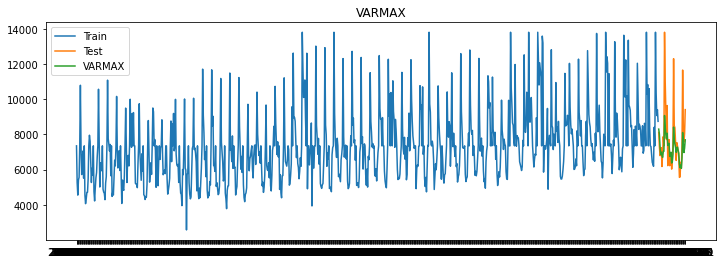

In [1333]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(pred_var['Sales'][test.index.min():], label='VARMAX')
plt.legend(loc='best')
plt.title('VARMAX')
plt.show()

In [1334]:
rmse = np.sqrt(mean_squared_error(test['Sales'], pred_var['Sales'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-pred_var['Sales'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['VARMAX4'],'MAPE': [mape],'RMSE': [rmse]})
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

Method        RMSE     MAPE
0  SARIMAX 1,921.95000 21.92000
0   VARMAX 3,490.67000 36.84000
0  VARMAX2 2,591.52000 27.02000
0  VARMAX3 1,057.18000  7.10000
0  VARMAX4 1,323.54000  8.85000

In [ ]:
# After comparing all the five models VARMAX 3 is the best model to forecast sales for Store 29. 

# Store 31:

In [1350]:
df_31=df[df['Store']==31]
df_31.head()

Store  DayOfWeek  is_weekend  Sales  Customers  Open StateHoliday  \
Date                                                                            
2013-01-01     31          2           0      0          0     0            a   
2013-01-02     31          3           0   5122        567     1            0   
2013-01-03     31          4           0   5623        578     1            0   
2013-01-04     31          5           0   6140        633     1            0   
2013-01-05     31          6           1   5607        624     1            0   

            SchoolHoliday StoreType Assortment  CompetitionDistance_KM  \
Date                                                                     
2013-01-01              1         d          c                 1.00000   
2013-01-02              1         d          c                 1.00000   
2013-01-03              1         d          c                 1.00000   
2013-01-04              1         d          c                 1.00000   
2013-01-05              0         d          c                 1.00000   

            Competition since years  Promo2  
Date                                         
2013-01-01                  0.95424       0  
2013-01-02                  0.95424       0  
2013-01-03                  0.95424       0  
2013-01-04                  0.95424       0  
2013-01-05                  0.95424       0

In [1351]:
df_31.shape

(942, 13)

## Outlier Analysis:

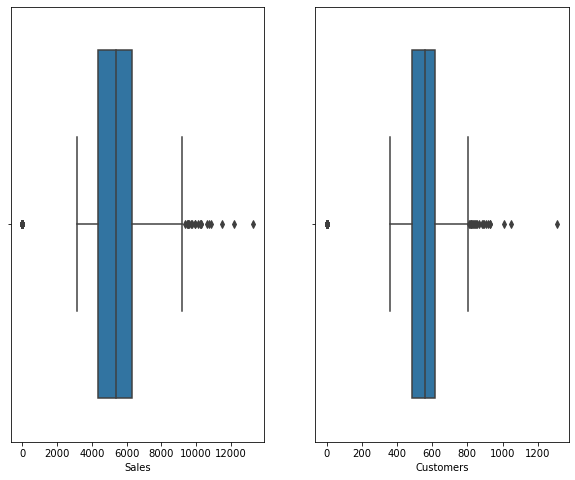

In [1352]:
#Here we perform outlier analysis for sales and customers variables.
plt.figure(figsize=[10,8])
plt.subplot(1,2,1)
ax=sns.boxplot(df_31['Sales'])
plt.subplot(1,2,2)
ax=sns.boxplot(df_31['Customers'])

In [1353]:
# We need to cap the outliers to their 99 percentile value.
df_31['Sales']=df_31['Sales'].clip(lower=df_31['Sales'].min(),upper=df_31['Sales'].quantile(0.99))
df_31['Customers']=df_31['Customers'].clip(lower=df_31['Customers'].min(),upper=df_31['Customers'].quantile(0.99))

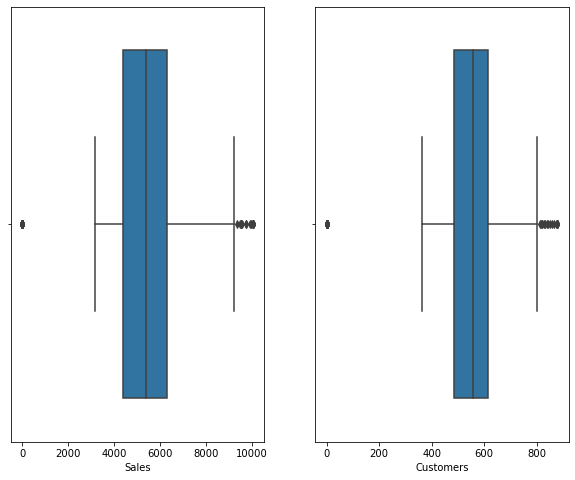

In [1354]:
#Here we perform outlier analysis for sales and customers variables.
plt.figure(figsize=[10,8])
plt.subplot(1,2,1)
ax=sns.boxplot(df_31['Sales'])
plt.subplot(1,2,2)
ax=sns.boxplot(df_31['Customers'])

In [1355]:
# We can see that outliers are minimized.

## Null value handling:

In [1356]:
# If Sales/Customers value ==0 consider them as null.
df_31['Sales']=df_31['Sales'].apply(lambda x:np.nan if x==0 else x)
df_31['Customers']=df_31['Customers'].apply(lambda x:np.nan if x==0 else x)

In [1357]:
df_31[['Sales','Customers']].isnull().sum()

Sales        158
Customers    158
dtype: int64

## Mean imputation:

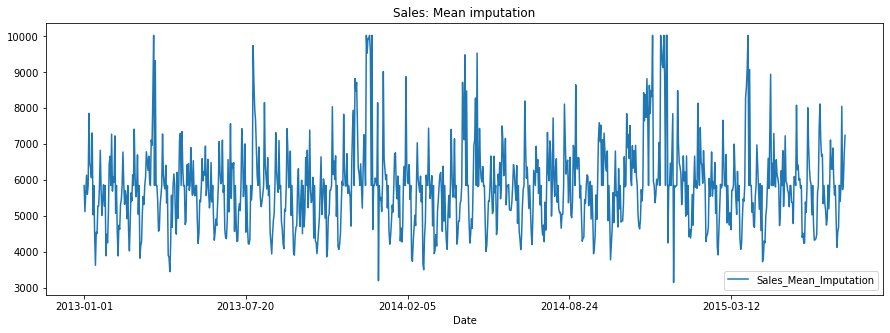

In [1358]:
df_31.insert(4,'Sales_Mean_Imputation',df_31.Sales.fillna(df_31.Sales.mean()))
df_31[['Sales_Mean_Imputation']].plot(figsize=(15, 5))
plt.legend(loc='best')
plt.title('Sales: Mean imputation')
plt.show()

In [1359]:
df_31.drop(['Sales'],axis=1,inplace=True)
df_31.rename(columns={'Sales_Mean_Imputation':'Sales'},inplace=True)

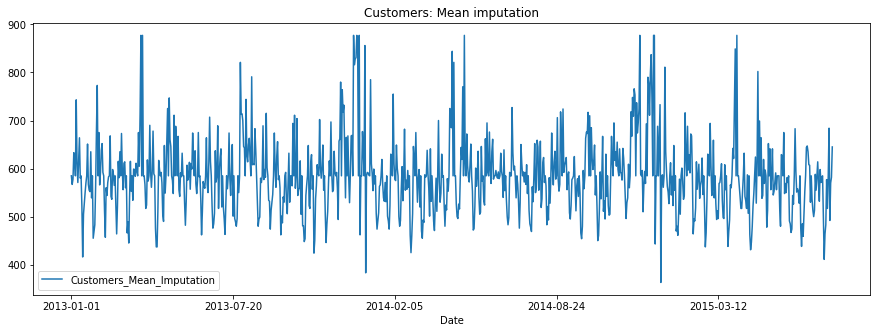

In [1360]:
# Do the same mean imputation for Customers variable
df_31.insert(5,'Customers_Mean_Imputation',df_31.Customers.fillna(df_31.Customers.mean()))
df_31[['Customers_Mean_Imputation']].plot(figsize=(15, 5))
plt.legend(loc='best')
plt.title('Customers: Mean imputation')
plt.show()

In [1361]:
df_31.drop(['Customers'],axis=1,inplace=True)
df_31.rename(columns={'Customers_Mean_Imputation':'Customers'},inplace=True)

## Train-Test Split:

In [1362]:
train=df_31[0:train_len]
test=df_31[train_len:]

In [1363]:
train.shape

(900, 13)

In [1364]:
test.shape

(42, 13)

## Stationary test (ADF):

In [1365]:
for i in ['Sales','Customers']:
    print('\n\n' + i + ': ADF test results:')
    result = adfuller(train[i].dropna())
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        if key=='5%':
            print('\t%s: %.3f' % (key, value))



Sales: ADF test results:
ADF Statistic: -5.128312
p-value: 0.000012
Critical Values:
	5%: -2.865


Customers: ADF test results:
ADF Statistic: -6.366742
p-value: 0.000000
Critical Values:
	5%: -2.865


In [ ]:
# since p-value for both variables is less than 0.05 they both are stationary.

## Model Building:

## SARIMAX:

In [1366]:
model = SARIMAX(train['Sales'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12),exog=train['Customers']) 
model_fit = model.fit()
print(model_fit.params)

Customers        12.93149
ar.L1             0.47350
ma.L1            -0.99999
ar.S.L12          0.06978
ma.S.L12         -0.99995
sigma2      149,041.34823
dtype: float64


In [1367]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Sales   No. Observations:                  900
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -6570.002
Date:                            Mon, 31 May 2021   AIC                          13152.004
Time:                                    23:04:06   BIC                          13180.731
Sample:                                01-01-2013   HQIC                         13162.985
                                     - 06-19-2015                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Customers     12.9315      0.154     84.085      0.000      12.630      13.233
ar.L1          0.4735      0.028     16.851      0.000       0.418       0.529
ma.L1         -1.0000      5.442     -0.184      0.854     -11.665       9.665
ar.S.L12       0.0698      0.036      1.914      0.056      -0.002       0.141
ma.S.L12      -1.0000      5.437     -0.184      0.854     -11.656       9.656
sigma2       1.49e+05   1.85e-05   8.05e+09      0.000    1.49e+05    1.49e+05
===================================================================================
Ljung-Box (L1) (Q):                   1.24   Jarque-Bera (JB):                21.50
Prob(Q):                              0.26   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                             0.15
Prob(H) (two-sided):                  0.18   Kurtosis:                         3.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.82e+27. Standard errors may be unstable.
"""

In [1368]:
pred = test.copy()
pred['Sales'] = model_fit.predict(test.index.min(), test.index.max(),exog=test['Customers'])

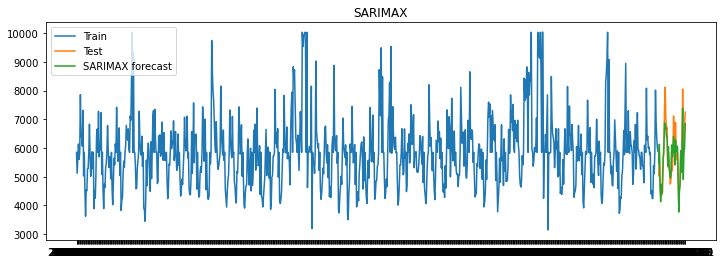

In [1369]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(pred['Sales'][test.index.min():], label='SARIMAX forecast')
plt.legend(loc='best')
plt.title('SARIMAX')
plt.show()

In [1370]:
rmse = np.sqrt(mean_squared_error(test['Sales'], pred['Sales'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-pred['Sales'])/test['Sales'])*100,2)
results = pd.DataFrame({'Method':['SARIMAX'], 'MAPE': [mape], 'RMSE': [rmse]})
results = results[['Method', 'RMSE', 'MAPE']]
results

Method      RMSE    MAPE
0  SARIMAX 430.15000 5.47000

# VARMAX 1:

In [1371]:
train['Sales']=train['Sales'].astype('float64')
train['Customers']=train['Customers'].astype('float64')

In [1372]:
exog = train['DayOfWeek']
mod = sm.tsa.VARMAX(train[['Sales', 'Customers']], order=(1,1), trend='n', exog=exog)
res = mod.fit(maxiter=1000, disp=False)
print(res.summary())

                             Statespace Model Results                             
Dep. Variable:     ['Sales', 'Customers']   No. Observations:                  900
Model:                        VARMAX(1,1)   Log Likelihood              -12412.405
Date:                    Mon, 31 May 2021   AIC                          24850.809
Time:                            23:06:36   BIC                          24913.240
Sample:                        01-01-2013   HQIC                         24874.658
                             - 06-19-2015                                         
Covariance Type:                      opg                                         
Ljung-Box (L1) (Q):            1.66, 10.74   Jarque-Bera (JB):        126.39, 40.85
Prob(Q):                        0.20, 0.00   Prob(JB):                   0.00, 0.00
Heteroskedasticity (H):         1.39, 0.79   Skew:                       0.78, 0.39
Prob(H) (two-sided):            0.00, 0.05   Kurtosis:                   3.96, 3.70


In [1373]:
pred_var = test.copy()
pred_var['Sales'] = res.predict(test.index.min(), test.index.max(),exog=test['DayOfWeek'])

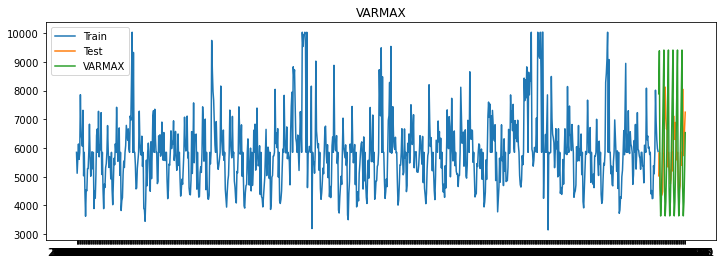

In [1374]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(pred_var['Sales'][test.index.min():], label='VARMAX')
plt.legend(loc='best')
plt.title('VARMAX')
plt.show()

In [1375]:
rmse = np.sqrt(mean_squared_error(test['Sales'], pred_var['Sales'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-pred_var['Sales'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['VARMAX'],'MAPE': [mape],'RMSE': [rmse]})
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

Method        RMSE     MAPE
0  SARIMAX   430.15000  5.47000
0   VARMAX 2,225.91000 31.19000

## VARMAX 2:

In [1379]:
exog = train['Open']
mod = sm.tsa.VARMAX(train[['Sales', 'Customers']], order=(1,1), trend='n', exog=exog)
res = mod.fit(maxiter=1000, disp=False)
print(res.summary())

                             Statespace Model Results                             
Dep. Variable:     ['Sales', 'Customers']   No. Observations:                  900
Model:                        VARMAX(1,1)   Log Likelihood              -12426.610
Date:                    Mon, 31 May 2021   AIC                          24879.219
Time:                            23:11:35   BIC                          24941.651
Sample:                        01-01-2013   HQIC                         24903.069
                             - 06-19-2015                                         
Covariance Type:                      opg                                         
Ljung-Box (L1) (Q):            9.71, 48.92   Jarque-Bera (JB):        68.29, 117.74
Prob(Q):                        0.00, 0.00   Prob(JB):                   0.00, 0.00
Heteroskedasticity (H):         1.06, 0.95   Skew:                       0.66, 0.40
Prob(H) (two-sided):            0.60, 0.64   Kurtosis:                   2.68, 4.58


In [1380]:
pred_var = test.copy()
pred_var['Sales'] = res.predict(test.index.min(), test.index.max(),exog=test['Open'])

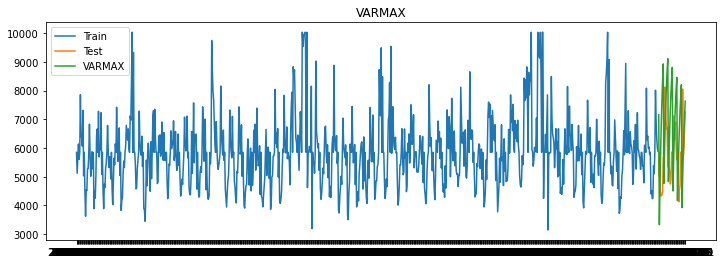

In [1381]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(pred_var['Sales'][test.index.min():], label='VARMAX')
plt.legend(loc='best')
plt.title('VARMAX')
plt.show()

In [1382]:
rmse = np.sqrt(mean_squared_error(test['Sales'], pred_var['Sales'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-pred_var['Sales'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['VARMAX2'],'MAPE': [mape],'RMSE': [rmse]})
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

Method        RMSE     MAPE
0  SARIMAX   430.15000  5.47000
0   VARMAX 2,225.91000 31.19000
0  VARMAX2 2,091.08000 33.05000

## VARMAX 3:

In [1383]:
exog = train['Customers']
mod = sm.tsa.VARMAX(train[['Sales', 'Competition since years']], order=(1,1), trend='n', exog=exog)
res = mod.fit(maxiter=1000, disp=False)
print(res.summary())

                                    Statespace Model Results                                    
Dep. Variable:     ['Sales', 'Competition since years']   No. Observations:                  900
Model:                                      VARMAX(1,1)   Log Likelihood               -6501.011
Date:                                  Mon, 31 May 2021   AIC                          13028.023
Time:                                          23:11:53   BIC                          13090.454
Sample:                                      01-01-2013   HQIC                         13051.872
                                           - 06-19-2015                                         
Covariance Type:                                    opg                                         
Ljung-Box (L1) (Q):          53.03, 152.15   Jarque-Bera (JB):        225.27, 99.75
Prob(Q):                        0.00, 0.00   Prob(JB):                   0.00, 0.00
Heteroskedasticity (H):         1.38, 1.09   Skew:      

In [1384]:
pred_var = test.copy()
pred_var['Sales'] = res.predict(test.index.min(), test.index.max(),exog=test['Customers'])

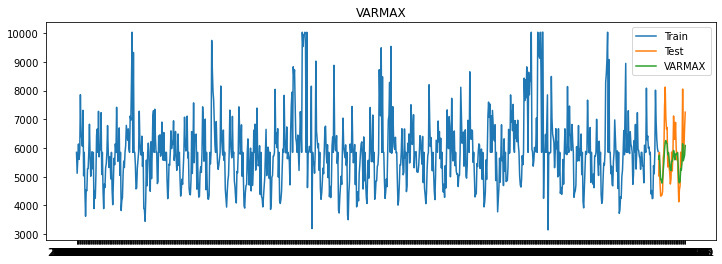

In [1385]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(pred_var['Sales'][test.index.min():], label='VARMAX')
plt.legend(loc='best')
plt.title('VARMAX')
plt.show()

In [1386]:
rmse = np.sqrt(mean_squared_error(test['Sales'], pred_var['Sales'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-pred_var['Sales'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['VARMAX3'],'MAPE': [mape],'RMSE': [rmse]})
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

Method        RMSE     MAPE
0  SARIMAX   430.15000  5.47000
0   VARMAX 2,225.91000 31.19000
0  VARMAX2 2,091.08000 33.05000
0  VARMAX3   705.30000  9.10000

## VARMAX 4:

In [1387]:
exog = train['Customers']
mod = sm.tsa.VARMAX(train[['Sales', 'Competition since years']], order=(8,8), trend='n', exog=exog)
res = mod.fit(maxiter=1000, disp=False)
print(res.summary())

                                    Statespace Model Results                                    
Dep. Variable:     ['Sales', 'Competition since years']   No. Observations:                  900
Model:                                      VARMAX(8,8)   Log Likelihood               -6616.210
Date:                                  Mon, 31 May 2021   AIC                          13370.419
Time:                                          23:14:59   BIC                          13701.784
Sample:                                      01-01-2013   HQIC                         13497.003
                                           - 06-19-2015                                         
Covariance Type:                                    opg                                         
Ljung-Box (L1) (Q):          32.60, 176.13   Jarque-Bera (JB):         282.71, 7.52
Prob(Q):                        0.00, 0.00   Prob(JB):                   0.00, 0.02
Heteroskedasticity (H):         1.43, 1.24   Skew:      

In [1388]:
pred_var = test.copy()
pred_var['Sales'] = res.predict(test.index.min(), test.index.max(),exog=test['Customers'])

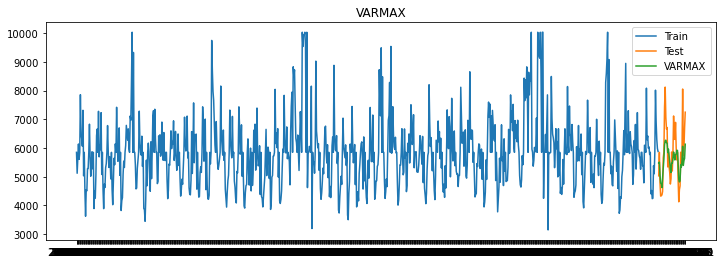

In [1389]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(pred_var['Sales'][test.index.min():], label='VARMAX')
plt.legend(loc='best')
plt.title('VARMAX')
plt.show()

In [1390]:
rmse = np.sqrt(mean_squared_error(test['Sales'], pred_var['Sales'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-pred_var['Sales'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['VARMAX4'],'MAPE': [mape],'RMSE': [rmse]})
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

Method        RMSE     MAPE
0  SARIMAX   430.15000  5.47000
0   VARMAX 2,225.91000 31.19000
0  VARMAX2 2,091.08000 33.05000
0  VARMAX3   705.30000  9.10000
0  VARMAX4   699.66000  9.03000

In [ ]:
# After comparing all the five models SARIMAX is the best model to forecast sales for Store 31. 

# Store 46

In [1377]:
df_46=df[df['Store']==46]
df_46.head()

Store  DayOfWeek  is_weekend  Sales  Customers  Open StateHoliday  \
Date                                                                            
2013-01-01     46          2           0      0          0     0            a   
2013-01-02     46          3           0   4016        582     1            0   
2013-01-03     46          4           0   4177        553     1            0   
2013-01-04     46          5           0   4125        569     1            0   
2013-01-05     46          6           1   4848        651     1            0   

            SchoolHoliday StoreType Assortment  CompetitionDistance_KM  \
Date                                                                     
2013-01-01              1         c          a                 0.30103   
2013-01-02              1         c          a                 0.30103   
2013-01-03              1         c          a                 0.30103   
2013-01-04              1         c          a                 0.30103   
2013-01-05              0         c          a                 0.30103   

            Competition since years  Promo2  
Date                                         
2013-01-01                  1.20412       1  
2013-01-02                  1.20412       1  
2013-01-03                  1.20412       1  
2013-01-04                  1.20412       1  
2013-01-05                  1.20412       1

In [1378]:
df_46.shape

(758, 13)

## Outlier Analysis:

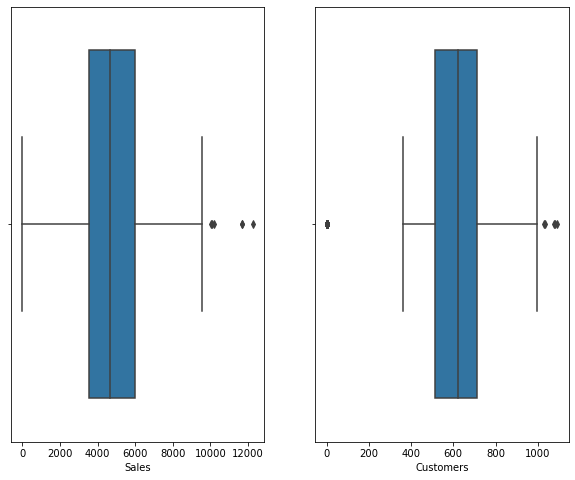

In [1391]:
#Here we perform outlier analysis for sales and customers variables.
plt.figure(figsize=[10,8])
plt.subplot(1,2,1)
ax=sns.boxplot(df_46['Sales'])
plt.subplot(1,2,2)
ax=sns.boxplot(df_46['Customers'])

In [1392]:
# We need to cap the outliers to their 99 percentile value.
df_46['Sales']=df_46['Sales'].clip(lower=df_46['Sales'].min(),upper=df_46['Sales'].quantile(0.99))
df_46['Customers']=df_46['Customers'].clip(lower=df_46['Customers'].min(),upper=df_46['Customers'].quantile(0.99))

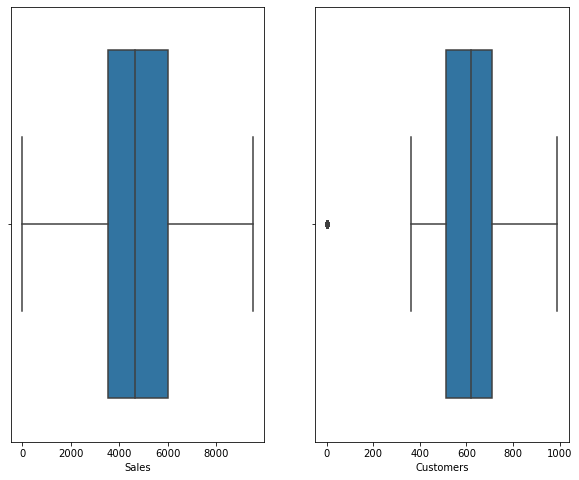

In [1393]:
#Here we perform outlier analysis for sales and customers variables.
plt.figure(figsize=[10,8])
plt.subplot(1,2,1)
ax=sns.boxplot(df_46['Sales'])
plt.subplot(1,2,2)
ax=sns.boxplot(df_46['Customers'])

## Null value handling:

In [1394]:
# If Sales/Customers value ==0 consider them as null.
df_46['Sales']=df_46['Sales'].apply(lambda x:np.nan if x==0 else x)
df_46['Customers']=df_46['Customers'].apply(lambda x:np.nan if x==0 else x)

In [1395]:
df_46[['Sales','Customers']].isnull().sum()

Sales        136
Customers    136
dtype: int64

## Mean imputation:

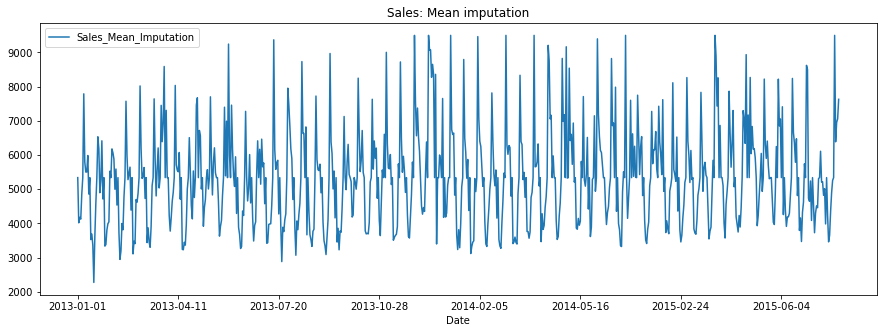

In [1396]:
df_46.insert(4,'Sales_Mean_Imputation',df_46.Sales.fillna(df_46.Sales.mean()))
df_46[['Sales_Mean_Imputation']].plot(figsize=(15, 5))
plt.legend(loc='best')
plt.title('Sales: Mean imputation')
plt.show()

In [1397]:
df_46.drop(['Sales'],axis=1,inplace=True)
df_46.rename(columns={'Sales_Mean_Imputation':'Sales'},inplace=True)

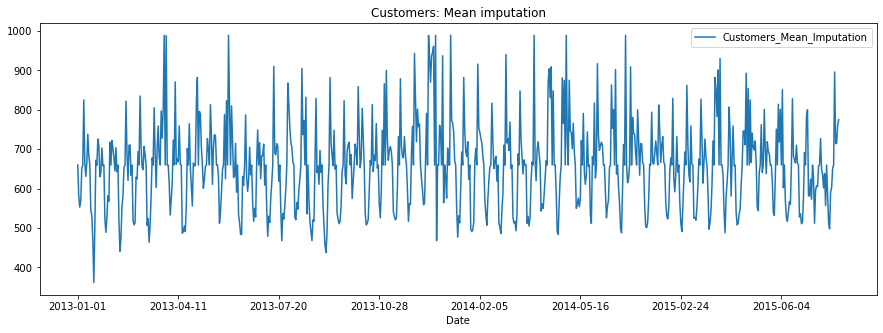

In [1398]:
# Do the same mean imputation for Customers variable
df_46.insert(5,'Customers_Mean_Imputation',df_46.Customers.fillna(df_46.Customers.mean()))
df_46[['Customers_Mean_Imputation']].plot(figsize=(15, 5))
plt.legend(loc='best')
plt.title('Customers: Mean imputation')
plt.show()

In [1399]:
df_46.drop(['Customers'],axis=1,inplace=True)
df_46.rename(columns={'Customers_Mean_Imputation':'Customers'},inplace=True)

## Train-Test split:

In [1416]:
train=df_31[0:train_len]
test=df_31[train_len:]

In [1417]:
train.shape

(900, 13)

In [1418]:
test.shape

(42, 13)

## Stationarity test:

In [1419]:
for i in ['Sales','Customers']:
    print('\n\n' + i + ': ADF test results:')
    result = adfuller(df_46[i].dropna())
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        if key=='5%':
            print('\t%s: %.3f' % (key, value))



Sales: ADF test results:
ADF Statistic: -6.349723
p-value: 0.000000
Critical Values:
	5%: -2.865


Customers: ADF test results:
ADF Statistic: -5.575477
p-value: 0.000001
Critical Values:
	5%: -2.865


In [ ]:
# since p-value for both variables is less than 0.05 they both are stationary.

## Model Building:

## SARIMAX:

In [1420]:
train.head()

Store  DayOfWeek  is_weekend       Sales  Customers  Open  \
Date                                                                    
2013-01-01     31          2           0 5,850.04656  584.86620     0   
2013-01-02     31          3           0 5,122.00000  567.00000     1   
2013-01-03     31          4           0 5,623.00000  578.00000     1   
2013-01-04     31          5           0 6,140.00000  633.00000     1   
2013-01-05     31          6           1 5,607.00000  624.00000     1   

           StateHoliday  SchoolHoliday StoreType Assortment  \
Date                                                          
2013-01-01            a              1         d          c   
2013-01-02            0              1         d          c   
2013-01-03            0              1         d          c   
2013-01-04            0              1         d          c   
2013-01-05            0              0         d          c   

            CompetitionDistance_KM  Competition since years  Promo2  
Date                                                                 
2013-01-01                 1.00000                  0.95424       0  
2013-01-02                 1.00000                  0.95424       0  
2013-01-03                 1.00000                  0.95424       0  
2013-01-04                 1.00000                  0.95424       0  
2013-01-05                 1.00000                  0.95424       0

In [1421]:
model = SARIMAX(train['Sales'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12),exog=train['Customers']) 
model_fit = model.fit()
print(model_fit.params)

Customers        12.93149
ar.L1             0.47350
ma.L1            -0.99999
ar.S.L12          0.06978
ma.S.L12         -0.99995
sigma2      149,041.34823
dtype: float64


In [1422]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Sales   No. Observations:                  900
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -6570.002
Date:                            Mon, 31 May 2021   AIC                          13152.004
Time:                                    23:19:14   BIC                          13180.731
Sample:                                01-01-2013   HQIC                         13162.985
                                     - 06-19-2015                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Customers     12.9315      0.154     84.085      0.000      12.630      13.233
ar.L1          0.4735      0.028     16.851      0.000       0.418       0.529
ma.L1         -1.0000      5.442     -0.184      0.854     -11.665       9.665
ar.S.L12       0.0698      0.036      1.914      0.056      -0.002       0.141
ma.S.L12      -1.0000      5.437     -0.184      0.854     -11.656       9.656
sigma2       1.49e+05   1.85e-05   8.05e+09      0.000    1.49e+05    1.49e+05
===================================================================================
Ljung-Box (L1) (Q):                   1.24   Jarque-Bera (JB):                21.50
Prob(Q):                              0.26   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                             0.15
Prob(H) (two-sided):                  0.18   Kurtosis:                         3.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.82e+27. Standard errors may be unstable.
"""

In [1423]:
pred = test.copy()
pred['Sales'] = model_fit.predict(test.index.min(), test.index.max(),exog=test['Customers'])

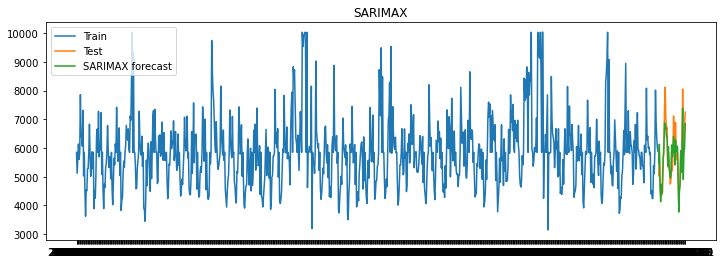

In [1424]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(pred['Sales'][test.index.min():], label='SARIMAX forecast')
plt.legend(loc='best')
plt.title('SARIMAX')
plt.show()

In [1425]:
rmse = np.sqrt(mean_squared_error(test['Sales'], pred['Sales'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-pred['Sales'])/test['Sales'])*100,2)
results = pd.DataFrame({'Method':['SARIMAX'], 'MAPE': [mape], 'RMSE': [rmse]})
results = results[['Method', 'RMSE', 'MAPE']]
results

Method      RMSE    MAPE
0  SARIMAX 430.15000 5.47000

## VARMAX 1:

In [1426]:
train['Sales']=train['Sales'].astype('float64')
train['Customers']=train['Customers'].astype('float64')

In [1427]:
exog = train['DayOfWeek']
mod = sm.tsa.VARMAX(train[['Sales', 'Customers']], order=(1,1), trend='n', exog=exog)
res = mod.fit(maxiter=1000, disp=False)
print(res.summary())

                             Statespace Model Results                             
Dep. Variable:     ['Sales', 'Customers']   No. Observations:                  900
Model:                        VARMAX(1,1)   Log Likelihood              -12412.405
Date:                    Mon, 31 May 2021   AIC                          24850.809
Time:                            23:21:52   BIC                          24913.240
Sample:                        01-01-2013   HQIC                         24874.658
                             - 06-19-2015                                         
Covariance Type:                      opg                                         
Ljung-Box (L1) (Q):            1.66, 10.74   Jarque-Bera (JB):        126.39, 40.85
Prob(Q):                        0.20, 0.00   Prob(JB):                   0.00, 0.00
Heteroskedasticity (H):         1.39, 0.79   Skew:                       0.78, 0.39
Prob(H) (two-sided):            0.00, 0.05   Kurtosis:                   3.96, 3.70


In [1429]:
pred_var = test.copy()
pred_var['Sales'] = res.predict(test.index.min(), test.index.max(),exog=test['DayOfWeek'])

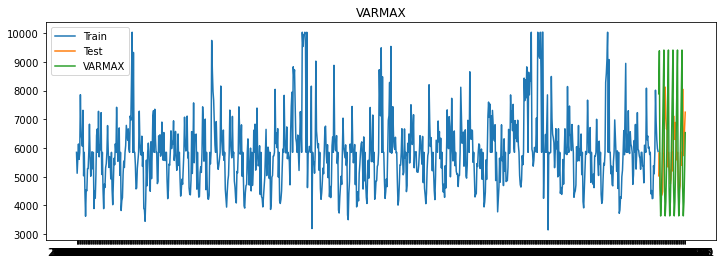

In [1430]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(pred_var['Sales'][test.index.min():], label='VARMAX')
plt.legend(loc='best')
plt.title('VARMAX')
plt.show()

In [1431]:
rmse = np.sqrt(mean_squared_error(test['Sales'], pred_var['Sales'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-pred_var['Sales'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['VARMAX'],'MAPE': [mape],'RMSE': [rmse]})
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

Method        RMSE     MAPE
0  SARIMAX   430.15000  5.47000
0   VARMAX 2,225.91000 31.19000

## VARMAX 2:

In [1432]:
exog = train['Open']
mod = sm.tsa.VARMAX(train[['Sales', 'Customers']], order=(1,1), trend='n', exog=exog)
res = mod.fit(maxiter=1000, disp=False)
print(res.summary())

                             Statespace Model Results                             
Dep. Variable:     ['Sales', 'Customers']   No. Observations:                  900
Model:                        VARMAX(1,1)   Log Likelihood              -12426.610
Date:                    Mon, 31 May 2021   AIC                          24879.219
Time:                            23:25:04   BIC                          24941.651
Sample:                        01-01-2013   HQIC                         24903.069
                             - 06-19-2015                                         
Covariance Type:                      opg                                         
Ljung-Box (L1) (Q):            9.71, 48.92   Jarque-Bera (JB):        68.29, 117.74
Prob(Q):                        0.00, 0.00   Prob(JB):                   0.00, 0.00
Heteroskedasticity (H):         1.06, 0.95   Skew:                       0.66, 0.40
Prob(H) (two-sided):            0.60, 0.64   Kurtosis:                   2.68, 4.58


In [1433]:
pred_var = test.copy()
pred_var['Sales'] = res.predict(test.index.min(), test.index.max(),exog=test['Open'])

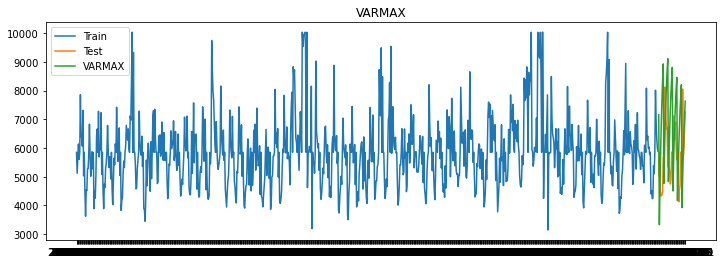

In [1434]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(pred_var['Sales'][test.index.min():], label='VARMAX')
plt.legend(loc='best')
plt.title('VARMAX')
plt.show()

In [1435]:
rmse = np.sqrt(mean_squared_error(test['Sales'], pred_var['Sales'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-pred_var['Sales'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['VARMAX2'],'MAPE': [mape],'RMSE': [rmse]})
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

Method        RMSE     MAPE
0  SARIMAX   430.15000  5.47000
0   VARMAX 2,225.91000 31.19000
0  VARMAX2 2,091.08000 33.05000

## VARMAX 3:

In [1436]:
exog = train['Customers']
mod = sm.tsa.VARMAX(train[['Sales', 'Competition since years']], order=(1,1), trend='n', exog=exog)
res = mod.fit(maxiter=1000, disp=False)
print(res.summary())

                                    Statespace Model Results                                    
Dep. Variable:     ['Sales', 'Competition since years']   No. Observations:                  900
Model:                                      VARMAX(1,1)   Log Likelihood               -6501.011
Date:                                  Mon, 31 May 2021   AIC                          13028.023
Time:                                          23:25:22   BIC                          13090.454
Sample:                                      01-01-2013   HQIC                         13051.872
                                           - 06-19-2015                                         
Covariance Type:                                    opg                                         
Ljung-Box (L1) (Q):          53.03, 152.15   Jarque-Bera (JB):        225.27, 99.75
Prob(Q):                        0.00, 0.00   Prob(JB):                   0.00, 0.00
Heteroskedasticity (H):         1.38, 1.09   Skew:      

In [1437]:
pred_var = test.copy()
pred_var['Sales'] = res.predict(test.index.min(), test.index.max(),exog=test['Customers'])

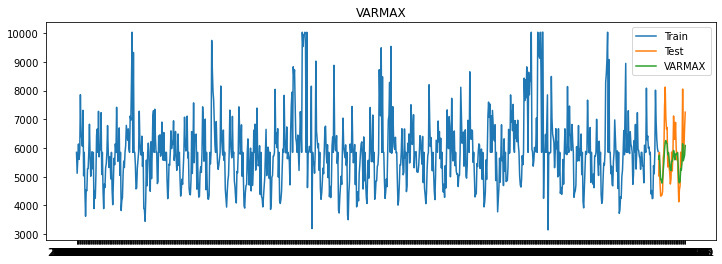

In [1438]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(pred_var['Sales'][test.index.min():], label='VARMAX')
plt.legend(loc='best')
plt.title('VARMAX')
plt.show()

In [1439]:
rmse = np.sqrt(mean_squared_error(test['Sales'], pred_var['Sales'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-pred_var['Sales'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['VARMAX3'],'MAPE': [mape],'RMSE': [rmse]})
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

Method        RMSE     MAPE
0  SARIMAX   430.15000  5.47000
0   VARMAX 2,225.91000 31.19000
0  VARMAX2 2,091.08000 33.05000
0  VARMAX3   705.30000  9.10000

## VARMAX 4:

In [1442]:
exog = train['Customers']
mod = sm.tsa.VARMAX(train[['Sales', 'Competition since years']], order=(4,4), trend='n', exog=exog)
res = mod.fit(maxiter=1000, disp=False)
print(res.summary())

                                    Statespace Model Results                                    
Dep. Variable:     ['Sales', 'Competition since years']   No. Observations:                  900
Model:                                      VARMAX(4,4)   Log Likelihood               -6301.967
Date:                                  Mon, 31 May 2021   AIC                          12677.934
Time:                                          23:43:30   BIC                          12855.623
Sample:                                      01-01-2013   HQIC                         12745.813
                                           - 06-19-2015                                         
Covariance Type:                                    opg                                         
Ljung-Box (L1) (Q):          40.90, 100.48   Jarque-Bera (JB):        211.18, 46.61
Prob(Q):                        0.00, 0.00   Prob(JB):                   0.00, 0.00
Heteroskedasticity (H):         1.39, 1.10   Skew:      

In [1443]:
pred_var = test.copy()
pred_var['Sales'] = res.predict(test.index.min(), test.index.max(),exog=test['Customers'])

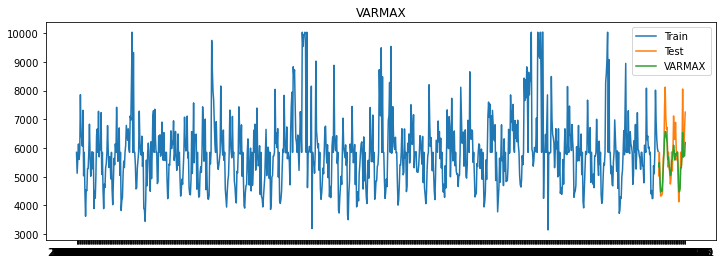

In [1444]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(pred_var['Sales'][test.index.min():], label='VARMAX')
plt.legend(loc='best')
plt.title('VARMAX')
plt.show()

In [1445]:
rmse = np.sqrt(mean_squared_error(test['Sales'], pred_var['Sales'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-pred_var['Sales'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['VARMAX4'],'MAPE': [mape],'RMSE': [rmse]})
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

Method        RMSE     MAPE
0  SARIMAX   430.15000  5.47000
0   VARMAX 2,225.91000 31.19000
0  VARMAX2 2,091.08000 33.05000
0  VARMAX3   705.30000  9.10000
0  VARMAX4   566.42000  6.49000

In [1447]:
# After comparing all the five models SARIMAX is the best model to forecast sales for Store 46. 